
# 基于 pyqcat-monster 的单比特门表征流程

在本教程中，我们将演示如何使用 pyqcat-monster 进行单比特表征流程测试。在这里你可以了解到：

- 基于 monster 的单比特表征流程测试；
- 基于 montser 的相关 API 使用方式；

在此基础上，我们还提供了 [monster]() 的 API 文档，期待您的阅读。当您发现有错误或者需要优化的地方，欢迎您通过 [pyqcat社区](https://document.qpanda.cn/space/9030MdOBwNfe5oqw) 向我们反馈，您的意见是我们不断进步的动力！

## 创建实验环境

- 若您未安装 pyqcat 包（monster），通过本地源码测试，需要执行下面操作，将 monster 项目环境加载到 jupyter 中；
- 若安装了 pyqcat 包（monster），跳过此步骤

In [1]:
# import sys

# package_root = "../../pyqcat-monster"
# sys.path.insert(0, package_root)

### 导入依赖包

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pyQCat.qubit import Qubit
from pyQCat.tools import qarange
from pyQCat.context import ExperimentContext
from pyQCat.invoker import Invoker, DataCenter
from pyQCat.parameters import get_parameters
from pyQCat.types import Quality
from pyQCat.log import pyqlog
from pyQCat.experiments import *
from pyQCat.analysis.fit.fit_models import freq2amp_formula, amp2freq_formula

%matplotlib notebook
pd.set_option('max_colwidth', None)

### 用户信息配置

In [2]:
conf_file = r'F:\\Monster_QC\\0.1.0\\project\\conf\\config.conf'

username = "wangpeng"
password = "8013"


# Invoker.verify_account(username=username, password=password)
Invoker.load_account()

{'code': 200,
 'data': {'username': 'wangpeng',
  'groups': 'normal',
  'email': 'pwang0110@mail.ustc.edu.cn',
  'phone_num': None,
  'is_super': False,
  'is_admin': False,
  'status': 0,
  'create_time': '2023-01-25 22:51:24',
  'last_login_time': '2023-01-26 03:01:46',
  'id': '63d141ec82169cbc05089f79'},
 'msg': 'success'}

### 检索系统配置信息

In [3]:
pd.DataFrame(context.config_table())

NameError: name 'context' is not defined

### 实验参数配置

In [3]:
def single_qubit_cali_context(
    qubit_name: str,
    env_bit: list,
    bit_dc = list,
    use_dcm: bool = False,
    ac_switch: bool = True
):
    """ 应用场景：
        - 单比特表征所有流程
    """
    context = ExperimentContext(conf_file)
    context.configure_inst()
    context.configure_qubits(qubit_name)


    new_env_bit = []
    for bit in env_bit:
        base_bit = context.get_base_qubit(bit)
        if bit in bit_dc:
            if base_bit.name == qubit_name:
                base_bit.dc = base_bit.dc_max 
            elif isinstance(base_bit, Qubit):
                base_bit.dc = base_bit.dc_min
            else:
                base_bit.dc = base_bit.dc_max
#             base_bit.ac = None
        else:
            if base_bit.name == qubit_name:
                base_bit.ac = base_bit.dc_max 
            elif isinstance(base_bit, Qubit):
                base_bit.ac = base_bit.dc_min
            else:
                base_bit.ac = base_bit.dc_max
        new_env_bit.append(base_bit)

    if ac_switch:
        context.maximize_compensate()
    else:
        context.minimize_compensate()
    context.configure_environment(new_env_bit)
    context.configure_crosstalk_dict()

    if use_dcm:
        context.configure_dcm(qubit_name)

    return context

In [4]:
q_name = "q7"
ENV_BIT = ["q1", "q2", "q7", "q8", "q9", "q13", "q14", "c12", "c17", "c28", "c78", "c89", "c713", "c814"]
BIT_DC = ["q13", "q14", "c713", "c814"]
context = single_qubit_cali_context(q_name, ENV_BIT, BIT_DC,use_dcm=False, ac_switch=True)
qubit = context.qubit
BASEBAND = [1200]
READOUT_CH = 2
qubit.Mwave.baseband_freq = BASEBAND[0]
qubit.save_data()

2023-01-27 21:20:49 |   INFO   | Monster Log save in F:\wangpeng\data\20230125\logger\monster-2023-01-27.log
2023-01-27 21:20:49 |   INFO   | 
|=============================================================|
|                       Invoker Environ                       |
|=============================================================|
|    invoker_addr    |         tcp://192.168.2.5:8088         |
|    point_label     |               sweetspot                |
|       sample       |    221018-72bit_300pin_V8.2-Base-1#    |
|      env_name      |                 D4_QC                  |
|      version       |                 0.1.0                  |
|=============================================================|

2023-01-27 21:20:49 | WARNING  | Qubit(bit=7) is already exist in current environment.
2023-01-27 21:20:49 |  UPDATE  | Save q7 to data service success.


{'code': 200, 'data': {}, 'msg': 'success'}

In [21]:
q_name = "q68"
# ENV_BIT = ["q61", "q62", "q63", "q64", "q65","q66", "q67", "q68",  "q69", "q70", "q71", "q72", 
#            "c6167", "c6268", "c6369", "c6470", "c6571", "c6672", "c6768", "c6869", "c6970", "c7071", "c7172"]
ENV_BIT = [ "q61", "q63", "q67", "q68", "q69",
          "c6167", "c6268", "c6369", "c6768", "c6869", "c6970"]
context = single_qubit_cali_context(q_name, ENV_BIT, use_dcm=False, ac_switch=True)
qubit = context.qubit

2022-12-21 17:40:30 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |              sweet point               |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|

2022-12-21 17:40:30 | WARNING  | Qubit(bit=68) is already exist in current environment.


In [117]:
def ENV_BIT_set(q_name):
    ENV_BIT = []
    q_num = int(q_name[1:])
    ENV_BIT.append(q_name)
    if q_num >= 7:
        q_base = f"q{q_num - 6}"
        c_base = f"c{q_num - 6}{q_num}"
        ENV_BIT.append(q_base)
        ENV_BIT.append(c_base)
    if q_num <= 66 :
        q_base = f"q{q_num + 6}"
        c_base = f"c{q_num}{q_num + 6}"
        ENV_BIT.append(q_base)
        ENV_BIT.append(c_base)
    if q_num%6 != 1:
        q_base = f"q{q_num - 1}"
        c_base = f"c{q_num - 1}{q_num}"
        ENV_BIT.append(q_base)
        ENV_BIT.append(c_base)
    if q_num%6 != 0:
        q_base = f"q{q_num + 1}"
        c_base = f"c{q_num}{q_num + 1}"
        ENV_BIT.append(q_base)
        ENV_BIT.append(c_base)
        
    print(ENV_BIT)
    return ENV_BIT

In [166]:
q_name = "q69"
ENV_BIT = ENV_BIT_set(q_name)
context = single_qubit_cali_context(q_name, ENV_BIT, use_dcm=False, ac_switch=True)
qubit = context.qubit

['q69', 'q63', 'c6369', 'q68', 'c6869', 'q70', 'c6970']
2022-12-20 19:12:18 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |              sweet point               |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|

2022-12-20 19:12:19 | WARNING  | Qubit(bit=69) is already exist in current environment.


In [4]:
# q_name = "q70"
# ENV_BIT = ["q64", "q65", "q69", "q70", "q71", "q72", "c6470", "c6571", "c6970", "c7071", "c7172"]

# context = single_qubit_cali_context(q_name, ENV_BIT, use_dcm=False, ac_switch=True)
# qubit = context.qubit

2022-12-15 18:27:24 |   INFO   | Monster Log save in E:\Data\D121107\monster-2022-12-15.log
2022-12-15 18:27:24 |   INFO   | 
|=============================================================|
|                       Invoker Envrion                       |
|=============================================================|
|    invoker_addr    |       tcp://192.168.110.211:8088       |
|    point_label     |               freestyle                |
|       sample       |220826-72bit-300pin-V8.2-Base-24#_monster|
|      env_name      |             D1_env(QT8013)             |
|      version       |                0.0.2.2                 |
|=============================================================|

2022-12-15 18:27:24 | WARNING  | Qubit(bit=70) is already exist in current environment.


In [8]:
ENV_BIT = ["q1", "q2", "q7", "q8", "q9", "q13", "q14", "c12", "c17", "c28", "c78", "c89", "c713", "c814"]

In [6]:
dc_max = [0.0225, -0.13468, 0.37125, 0.239505, -0.17876, -1.374, -2.6167, 0.36, 0.45, 0.42, -0.45, 0.4, -1.276, -0.750 ]

dc_min = [0.45, 0.42535, -0.195, -0.2981, 0.3881, 7, 5.75, -0.17, -0.042, -0.181, 0.108, -0.113, 6.5, 7.5 ]
for i, bit in enumerate(ENV_BIT):
    if bit[0] is 'q':
        q = get_parameters('qubit',bit)
        q.dc_max = dc_max[i]
        q.dc_min = dc_min[i]
        q.save_data()
    elif bit[0] is 'c':
        q = get_parameters('coupler',bit)
        q.dc_max = dc_max[i]
        q.dc_min = dc_min[i]
        q.save_data()



2023-01-26 03:02:54 |  UPDATE  | Save q1 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save q2 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save q7 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save q8 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save q9 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save q13 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save q14 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c12 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c17 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c28 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c78 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c89 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c713 to data service success.
2023-01-26 03:02:54 |  UPDATE  | Save c814 to data service success.


14

In [8]:
# with open("E:/Data/D1/20221107/work_pint.json","r") as f:
#     work_pint = json.load(f)
# print(work_pint)
# for bit in ENV_BIT:
#     if bit[0] is 'q':
#         q = get_parameters('qubit',bit)
#         q.dc_max = work_pint[bit][0]
#         q.dc_min = work_pint[bit][1]
#         q.save_data()
#     elif bit[0] is 'c':
#         q = get_parameters('coupler',bit)
#         q.dc_max = work_pint[bit][0]
#         q.dc_min = work_pint[bit][1]
#         q.save_data()

{'q69': [-0.026, 0.117], 'q70': [-0.063, 0.082], 'q71': [-0.057, 0.095], 'q72': [-0.03, 0.109], 'q64': [-0.056, 0.094], 'q65': [-0.063, 0.083], 'c6470': [-0.133, 0.092], 'c6571': [-0.125, 0.0], 'c6970': [0.089, -0.08], 'c7071': [0.108, -0.045], 'c7172': [0.087, -0.058]}
2022-12-12 17:53:39 |  UPDATE  | Save q64 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save q65 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save q69 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save q70 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save q71 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save q72 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save c6470 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save c6571 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save c6970 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save c7071 to data service success.
2022-12-12 17:53:39 |  UPDATE  | Save c7172 to data

In [8]:
qubit = get_parameters('qubit',71)
qubit.z_dc_channel = 21
qubit.dc = -0.278
qubit.save_data()

2022-12-17 11:32:27 |  UPDATE  | Save q71 to data service success.


### 更新IF和baseband

#### 更新IF

In [18]:
db = DataCenter()
file_name = "instrument.json"
data = db.query_config(file_name)['data'][0]['json']
data["XY_control"][qubit.xy_channel-9]['intermediate_frequency'] = 466.667
ret_data = db.update_single_config(file_name, data) 

#### 更新baseband

In [19]:
qubit.XYwave.baseband_freq = 466.667
qubit.save_data()

2022-12-21 17:40:17 |  UPDATE  | Save q68 to data service success.


### 检索实验环境配置参数

In [15]:
pd.DataFrame(context.context_table())

parameter  \
0          config   
1          qubits   
2        couplers   
3  discriminators   
4     compensates   
5      working_dc   
6  crosstalk_dict   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               object  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   F:\\Monster_QC\\0.1.0\\project\\conf\\config.conf   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [Qubit(bit=7)]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  []   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                None   
4  {Qubit(bit=1): PulseCorrectionQ1, Qubit(bit=2): PulseCorrectionQ2, Qubit(bit=7): PulseCorrectionQ7, Qubit(bit=8): PulseCorrectionQ8, Qubit(bit=9): PulseCorrectionQ9, Qubit(bit=13): PulseCorrectionQ13, Qubit(bit=14): PulseCorrectionQ14, Coupler(bit=12, driveQ1, probeQ2): PulseCorrectionC12, Coupler(bit=17, driveQ1, probeQ7): PulseCorrectionC17, Coupler(bit=28, driveQ2, probeQ8): PulseCorrectionC28, Coupler(bit=78, driveQ7, probeQ8): PulseCorrectionC78, Coupler(bit=89, driveQ8, probeQ9): PulseCorrectionC89, Coupler(bit=713, driveQ7, probeQ13): PulseCorrectionC713, Coupler(bit=814, driveQ8, probeQ14): PulseCorrectionC814}   
5                                        

### 检索初始比特参数信息

In [6]:
pd.DataFrame(context.base_qubit_table(context.qubit))

parameter  \
0                       tunable   
1                      goodness   
2                    drive_freq   
3                   drive_power   
4                    probe_freq   
5                   probe_power   
6                      tls_freq   
7                 anharmonicity   
8                            dc   
9                        dc_max   
10                       dc_min   
11                           ac   
12                           T1   
13                           T2   
14               z_flux_channel   
15                 z_dc_channel   
16                   idle_point   
17                  ac_spectrum   
18                  dc_spectrum   
19          readout_point_model   
20                readout_point   
21                   xy_channel   
22              readout_channel   
23                 sample_delay   
24                 sample_width   
25                   XYwave.Xpi   
26                  XYwave.Xpi2   
27                   XYwave.Ypi   
28                  XYwave.Ypi2   
29                   XYwave.Zpi   
30         XYwave.baseband_freq   
31                 XYwave.delta   
32             XYwave.detune_pi   
33            XYwave.detune_pi2   
34                 XYwave.alpha   
35                XYwave.offset   
36                  XYwave.time   
37                  Mwave.width   
38                    Mwave.amp   
39          Mwave.baseband_freq   
40          union_readout.width   
41            union_readout.amp   
42          union_readout.index   
43  union_readout.baseband_freq   
44                  f12_options   

                                                                                                                                                                            value  \
0                                                                                                                                                                           False   
1                                                                                                                                                                           False   
2                                                                                                                                                                         4371.53   
3                                                                                                                                                                           -21.2   
4                                                                                                                                                                        7321.502   
5                                                                                                                                                                             -23   
6                                                                                                                                                                            None   
7                                                                                                                                                                            -240   
8                                                                                                                                                                             0.0   
9                                                                                                                                                                         0.37125   
10                                                                                                                                                                         -0.195   
11                                                                                                                                                                            0.0   
12                                                        

### 检索 DC 配置信息

In [78]:
pd.DataFrame(context.work_dc_table())

qubit z_dc_channel    value
0   Coupler(bit=89)           14     0.0v
1     Qubit(bit=13)           11     7.0v
2     Qubit(bit=14)           12    5.75v
3  Coupler(bit=713)            8  -1.276v
4  Coupler(bit=814)            9   -0.75v

In [62]:
print(get_parameters('qubit',68).dc_max,get_parameters('qubit',69).dc_min)

-0.039 0.117


In [80]:
pd.DataFrame(context.work_ac_table())

qubit  z_flux_channel     value  \
0                          Qubit(bit=1)               1     0.45v   
1                          Qubit(bit=2)               3  0.42535v   
2                          Qubit(bit=7)               6  0.37125v   
3                          Qubit(bit=8)               8  -0.2981v   
4                          Qubit(bit=9)              10   0.3881v   
5                         Qubit(bit=13)              11      0.0v   
6                         Qubit(bit=14)              11      0.0v   
7     Coupler(bit=12, driveQ1, probeQ2)               2     0.36v   
8     Coupler(bit=17, driveQ1, probeQ7)               4     0.45v   
9     Coupler(bit=28, driveQ2, probeQ8)               5     0.42v   
10    Coupler(bit=78, driveQ7, probeQ8)               7    -0.45v   
11    Coupler(bit=89, driveQ8, probeQ9)               9      0.4v   
12  Coupler(bit=713, driveQ7, probeQ13)              11      0.0v   
13  Coupler(bit=814, driveQ8, probeQ14)              11      0.0v   

      m_pulse_model                          m_pulse_params  \
0   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
1   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
2   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
3   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
4   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
5   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
6   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
7   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
8   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
9   FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
10  FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
11  FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
12  FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   
13  FlatTopGaussian  Options(amp=0.0, sigma=1.25, buffer=5)   

             compensate  
0     PulseCorrectionQ1  
1     PulseCorrectionQ2  
2     PulseCorrectionQ7  
3     PulseCorrectionQ8  
4     PulseCorrectionQ9  
5    PulseCorrectionQ13  
6    PulseCorrectionQ14  
7    PulseCorrectionC12  
8    PulseCorrectionC17  
9    PulseCorrectionC28  
10   PulseCorrectionC78  
11   PulseCorrectionC89  
12  PulseCorrectionC713  
13  PulseCorrectionC814

In [27]:
env_ac_list = []
env_channel_list = []

for bit in ENV_BIT:
    base_bit = context.get_base_qubit(bit)
    if base_bit.name == q_name:
        pass
    elif isinstance(base_bit, Qubit):
        env_ac_list.append(base_bit.dc_min)
        env_channel_list.append(base_bit.z_flux_channel)
    else:
        env_ac_list.append(base_bit.dc_max)
        env_channel_list.append(base_bit.z_flux_channel)

print(env_channel_list)
print(env_ac_list)

[10, 15, 11, 14, 9, 12, 25, 22, 21, 18, 13, 27, 28, 29, 23, 16, 30, 31, 32, 24, 19, 20]
[-0.117, 0.028, -0.096, 0.094, 0.083, -0.087, 0.115, 0.117, 0.082, 0.095, 0.109, 0.162, -0.095, -0.082, -0.133, -0.125, 0.051, -0.122, -0.139, 0.089, 0.108, 0.087]


### 检索线路补偿器信息

In [7]:
pd.DataFrame(context.compensates_table())

name  x_delay  z_delay  z_compensate  distortion_width  \
0     q1      0.0      0.0           0.0                 0   
1     q2      0.0      0.0           0.0                 0   
2     q7      0.0      0.0           0.0                 0   
3     q8      0.0      0.0           0.0                 0   
4     q9      0.0      0.0           0.0                 0   
5    q13      0.0      0.0           0.0                 0   
6    q14      0.0      0.0           0.0                 0   
7    c12      0.0      0.0           0.0                 0   
8    c17      0.0      0.0           0.0                 0   
9    c28      0.0      0.0           0.0                 0   
10   c78      0.0      0.0           0.0                 0   
11   c89      0.0      0.0           0.0                 0   
12  c713      0.0      0.0           0.0                 0   
13  c814      0.0      0.0           0.0                 0   

    distortion_data_len distortion_ab distortion_type  
0                     0            []           width  
1                     0            []           width  
2                     0            []           width  
3                     0            []           width  
4                     0            []           width  
5                     0            []           width  
6                     0            []           width  
7                     0            []           width  
8                     0            []           width  
9                     0            []           width  
10                    0            []           width  
11                    0            []           width  
12                    0            []           width  
13                    0            []           width

## CavitySpecturm

Tunbale实验用于获取比特腔调制谱，简并点电压及读取频率

### 驱动线不加波形的能谱粗测

2023-01-26 15:36:53 |   EXP    | CavityFreqSpectrum register success, id 63d22d959c839aaa76740ba6
2023-01-26 15:36:53 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\CavityFreqSpectrum\q7\2023-01-26\15.36.53\


<IPython.core.display.Javascript object>


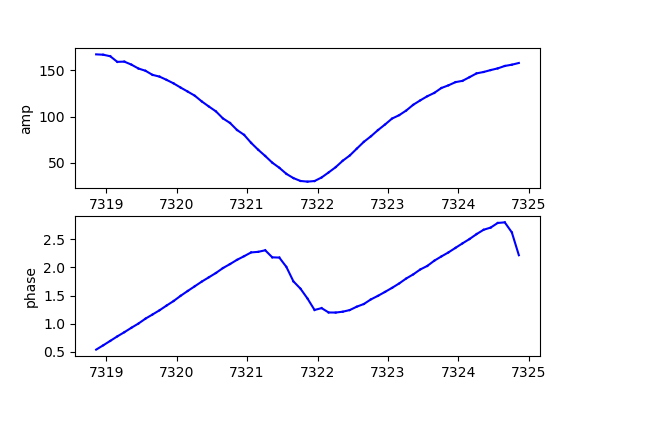

  0%|          | 0/61 [00:00<?, ?it/s]

2023-01-26 15:37:04 |  RESULT  | Experiment results as follow:
| name  |  describe   |  value   | unit |      quality      | 
-------------------------------------------------------------
|  fr   |     fc      | 7321.846 | MHz  | R²=0.999(perfect) | 
| power | probe power |   -25    |  db  | R²=0.999(perfect) | 


In [17]:
cs_exp = CavityFreqSpectrum.from_experiment_context(context)
cs_exp.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)
cs_exp.set_experiment_options(
    ac_prepare_time=8000,
    add_pi_pulse=False,
#     simulator_data_path='../scripts/simulator/data/CavityFreqSpectrum/',
    readout_power=-25,
)

cs_exp.set_analysis_options(
    is_plot=True,
    quality_bounds=[0.98, 0.95, 0.85]
)

cs_exp.run()

### 查看实验结果

In [16]:
pd.DataFrame(cs_exp.analysis.show_results())

name     value unit                                        extra  \
0           fc  7321.871  MHz   {'path': 'Qubit.probe_freq', 'name': 'q7'}   
1  probe power   -30.000   db  {'path': 'Qubit.probe_power', 'name': 'q7'}   

              quality  
0  R²=0.9995(perfect)  
1  R²=0.9995(perfect)

### 查看实验结果图

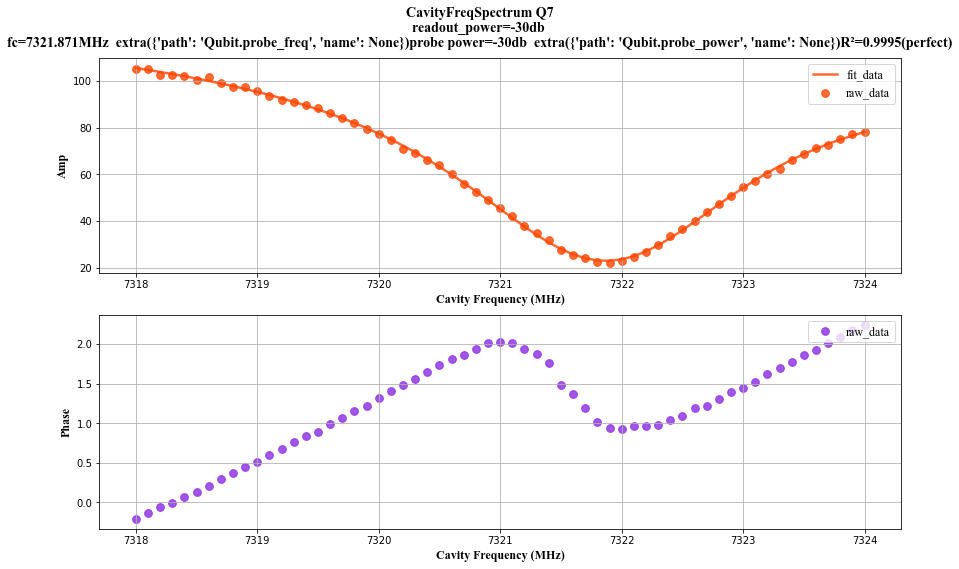

In [15]:
cs_exp.analysis.drawer.figure

### 判断结果质量并更新数据库

In [18]:
if cs_exp.analysis.quality.descriptor in [Quality.perfect, Quality.normal]:
    qubit.probe_freq = cs_exp.analysis.results.fr.value
    qubit.probe_power = cs_exp.experiment_options.readout_power
    pyqlog.info(f'Update {qubit} probe_freq {qubit.probe_freq}MHz, probe_power {qubit.probe_power}db')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-26 15:37:12 |   INFO   | Update Qubit(bit=7) probe_freq 7321.846MHz, probe_power -25db
2023-01-26 15:37:12 |  UPDATE  | Save q7 to data service success.


### 查询比特参数信息，检查是否更新成功

In [12]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power']
    )
)

parameter     value unit update_time
0   probe_freq  7126.256  MHz        None
1  probe_power   -36.000   db        None

In [26]:
qubit.xy_channel
# qubit.save_data()

25

## QubitSpecturm

### 大范围能谱粗扫实验

In [41]:
context.qubit.probe_power = -26

In [19]:
qs_exp = QubitSpectrum.from_experiment_context(context)
qs_exp.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)
qs_exp.set_experiment_options(
    ac_prepare_time=8000,
    freq_list=qarange(4250, 4430, 1),
    drive_power=-30,
    z_amp=None,
    use_square=True,
    band_width=10,
    fine_flag=False,
#     xpulse_params = {
#             "time": 5000,
#             "offset": 15,
#             "amp": 0.2,
#             "detune": 0,
#             "freq": 566.667
#         },
#     simulator_data_path='../scripts/simulator/data/QubitSpectrum/5000Mhz/rough/',
)

qs_exp.set_analysis_options(
    snr_bounds=1.5,
    quality_bounds=[0.8, 0.6, 0.5],
    is_plot=True,
)

qs_exp.run()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 17542 and the array at index 1 has size 17541

### 查看实验结果

In [33]:
pd.DataFrame(qs_exp.analysis.show_results())

name     value unit extra             quality
0  dips  [4796.0]  MHz    {}  SNR=1.624(perfect)

### 查看脉冲时序图

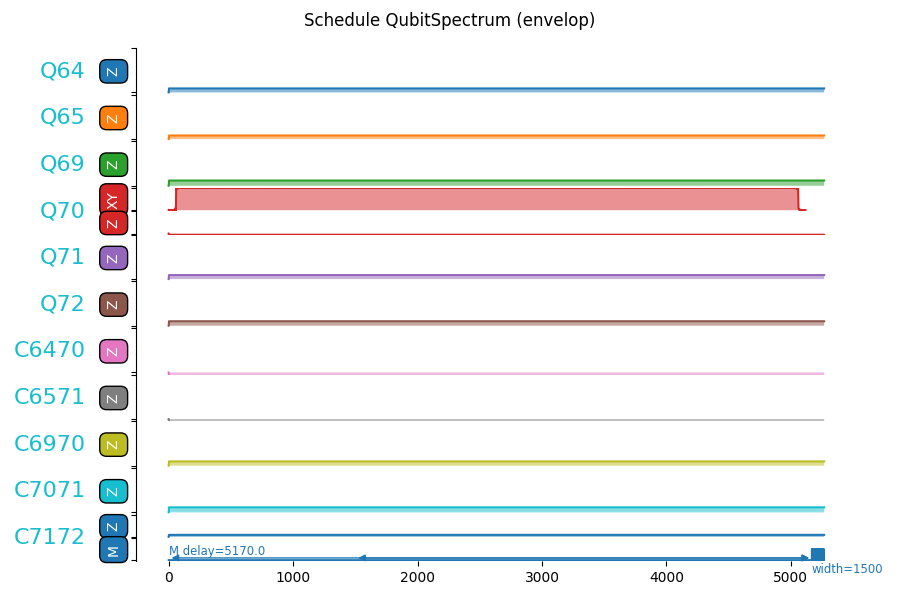

In [34]:
qs_exp.jupyter_schedule()

### 查看实验结果图

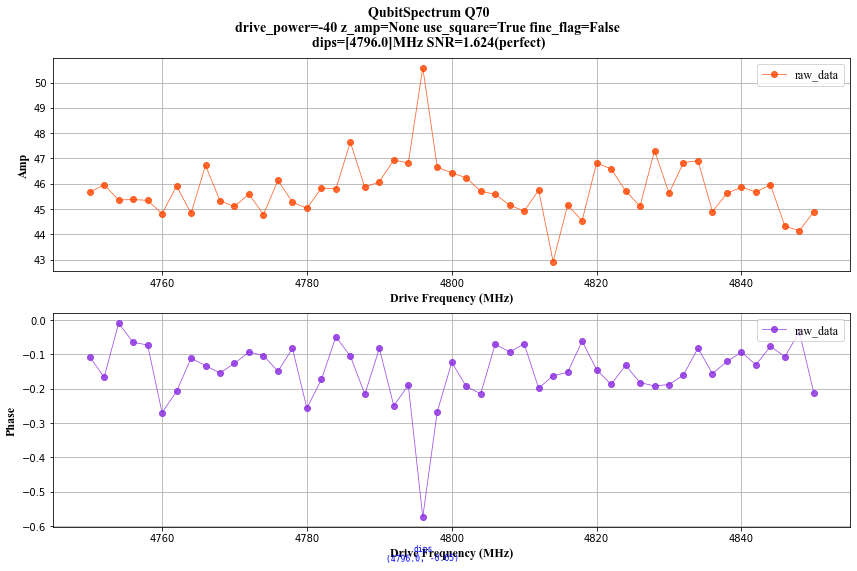

In [35]:
qs_exp.analysis.drawer.figure

### 比特能谱细扫实验

2023-01-26 15:39:15 |   EXP    | QubitSpectrum register success, id 63d22e239c839aaa76740bb2
2023-01-26 15:39:15 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\QubitSpectrum\q7\2023-01-26\15.39.15\


<IPython.core.display.Javascript object>


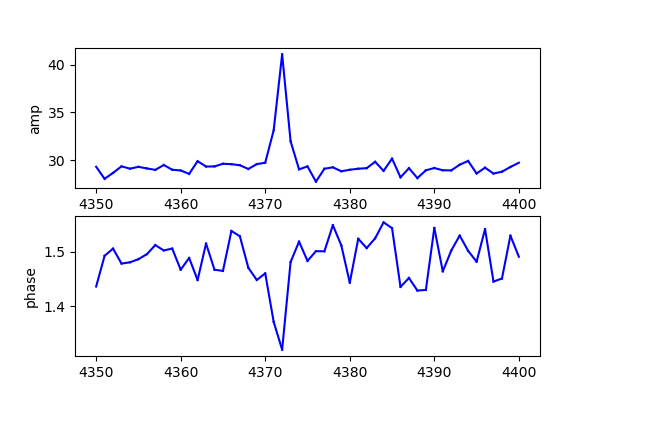

  0%|          | 0/51 [00:00<?, ?it/s]

2023-01-26 15:39:22 |  RESULT  | Experiment results as follow:
| name  | describe |  value   | unit |      quality       | 
-----------------------------------------------------------
| freq  |   f01    | 4371.847 | MHz  | R²=0.9291(perfect) | 
| power | f01power |   -40    |  db  | R²=0.9291(perfect) | 


In [24]:
qs_exp2 = QubitSpectrum.from_experiment_context(context)
qs_exp2.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)
qs_exp2.set_experiment_options(
    ac_prepare_time=8000,
    freq_list=qarange(4350, 4400, 1),
    drive_power=-40,
    z_amp=None,
    use_square=True,
    band_width=10,
    fine_flag=True,
        xpulse_params = {
            "time": 5000,
            "offset": 15,
            "amp": 0.05,
            "detune": 0,
            "freq": 1200
        },
#     simulator_data_path='../scripts/simulator/data/QubitSpectrum/5000Mhz/fine/'
)

qs_exp2.set_analysis_options(
    snr_bounds=1.5,
    quality_bounds=[0.8, 0.6, 0.5],
    is_plot=True,
)

qs_exp2.run()

### 查看实验结果

In [38]:
pd.DataFrame(qs_exp2.analysis.show_results())

name     value unit extra             quality
0  f01  4796.256  MHz    {}  R²=0.8255(perfect)

### 查看实验结果图

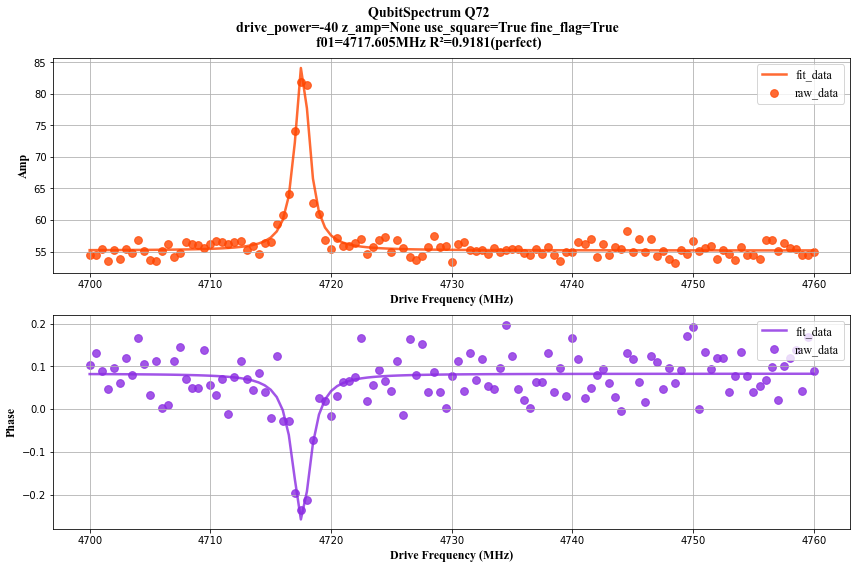

In [11]:
qs_exp2.analysis.drawer.figure

In [25]:
qs_exp2.analysis.results.freq.value

4371.847

## RabiScanWidth

扫描 `Drag` 的脉冲宽度，通过其振荡规律判断比特频率是否正确

2023-01-26 15:41:50 |   EXP    | RabiScanWidth register success, id 63d22ebe9c839aaa76740c42
2023-01-26 15:41:50 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\RabiScanWidth\q7\2023-01-26\15.41.45\


<IPython.core.display.Javascript object>


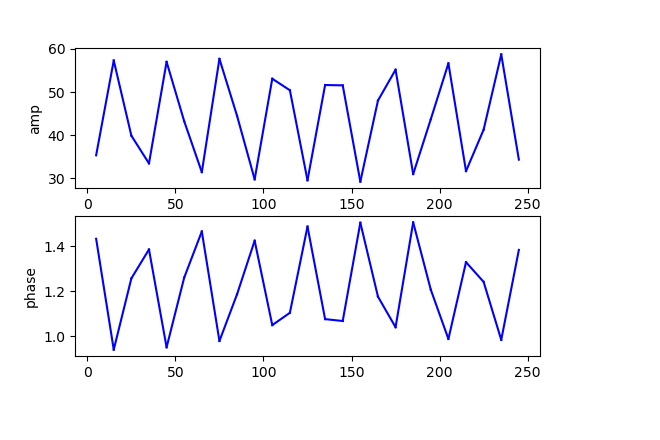

  0%|          | 0/25 [00:00<?, ?it/s]

2023-01-26 15:41:54 |  RESULT  | Experiment results as follow:
|    name     |  describe   | value | unit |      quality       | 
-----------------------------------------------------------------
| oscillating | oscillating | True  | None | R²=0.9954(perfect) | 


In [26]:
rsw = RabiScanWidth.from_experiment_context(context)
rsw.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)
rsw.set_experiment_options(
    ac_prepare_time=8000,
    drive_freq=4371.847,
    drive_power=-20,
    widths = qarange(5, 250, 10)
    
#     simulator_data_path='../scripts/simulator/data/RabiScanWidth'
)

rsw.run()

### 检查脉冲时序

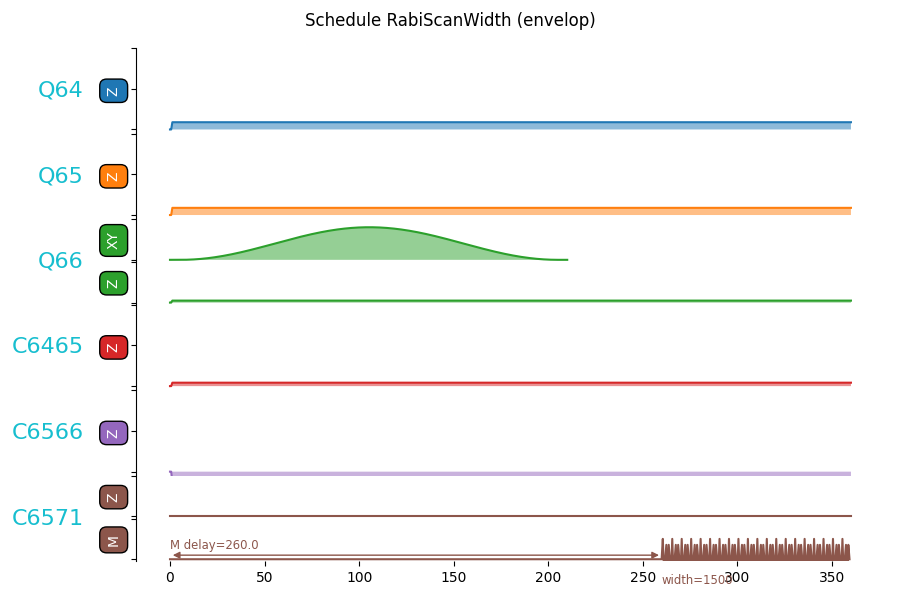

In [101]:
rsw.jupyter_schedule()

### 查看实验结果

In [40]:
pd.DataFrame(rsw.analysis.show_results())

name  value  unit extra             quality
0  oscillating   True  None    {}  R²=0.9815(perfect)

### 查看实验结果图

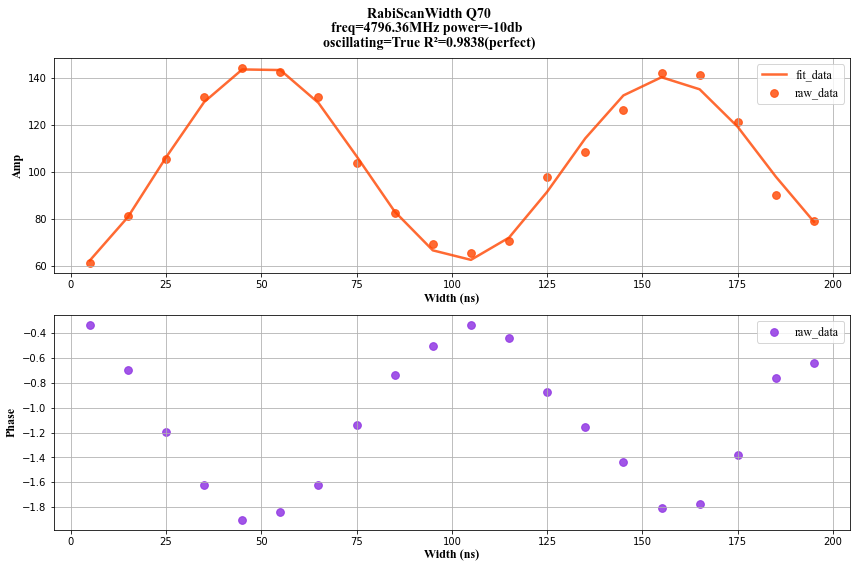

In [17]:
rsw.analysis.drawer.figure

### 根据能谱和 RabiWidth 判断是否更新比特频率

In [27]:
qs_quality = qs_exp2.analysis.quality.descriptor
oscillating = rsw.analysis.results.oscillating.value

if qs_quality in [Quality.perfect, Quality.normal] and oscillating:
    qubit.drive_freq = qs_exp2.analysis.results.freq.value
    qubit.drive_power = qs_exp2.experiment_options.drive_power
    pyqlog.info(f'Update {qubit} drive_freq {qubit.drive_freq}MHz, drive_power {qubit.drive_power}db')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-26 15:42:08 |   INFO   | Update Qubit(bit=7) drive_freq 4371.847MHz, drive_power -40db
2023-01-26 15:42:08 |  UPDATE  | Save q7 to data service success.


### 检索比特参数

In [43]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power']
    )
)

parameter     value unit update_time
0   probe_freq  7126.654  MHz        None
1  probe_power   -36.000   db        None
2   drive_freq  4796.256  MHz        None
3  drive_power   -40.000   db        None

In [56]:
qubit.XYwave.time = 50
# qubit.drive_freq = 4794.108
qubit.save_data()

2022-12-21 15:24:52 |  UPDATE  | Save q68 to data service success.


In [79]:
qubit.drive_freq =4502.861

## XpiDetection

XpiDetune 实验是对 RabiScanAmp 实验的封装， 扫描 `Drag` 幅值，粗测 `X` 门幅值

2023-01-26 15:44:11 |   EXP    | The expect_value is 0.7.
2023-01-26 15:44:11 |   EXP    | The max test time is 5.
2023-01-26 15:44:11 |   EXP    | RabiScanAmp count 0, drive_power -23
2023-01-26 15:44:21 |   EXP    | RabiScanAmp register success, id 63d22f559c839aaa76740e5e
2023-01-26 15:44:21 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\XpiDetection\q7\2023-01-26\15.44.11\RabiScanAmp\15-44-11-count=0-drive_power=-23\


<IPython.core.display.Javascript object>


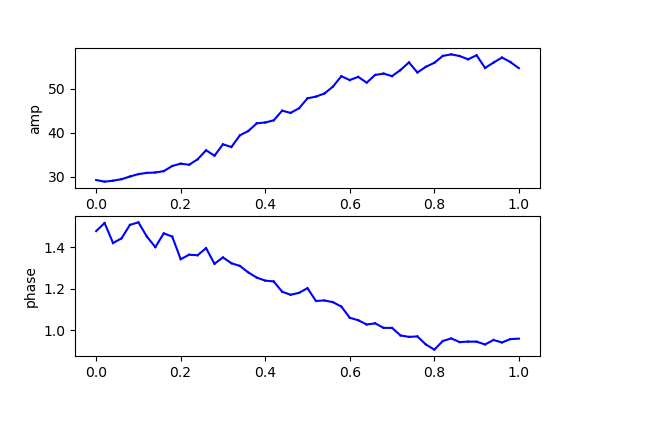

  0%|          | 0/51 [00:00<?, ?it/s]

2023-01-26 15:44:28 |  RESULT  | Experiment results as follow:
|    name     | describe | value | unit |      quality       | 
--------------------------------------------------------------
| drive_power |    dp    |  -23  |  db  | R²=0.9925(perfect) | 
|     Xpi     |  X-amp   | 0.86  |  V   | R²=0.9925(perfect) | 
2023-01-26 15:44:28 |   EXP    | RabiScanAmp count 1, drive_power -21.2
2023-01-26 15:44:39 |   EXP    | RabiScanAmp register success, id 63d22f679c839aaa76740f6c
2023-01-26 15:44:39 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\XpiDetection\q7\2023-01-26\15.44.11\RabiScanAmp\15-44-28-count=1-drive_power=-21.2\


<IPython.core.display.Javascript object>


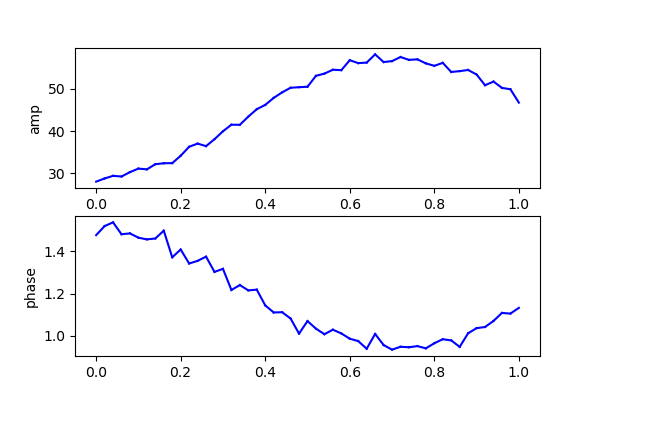

  0%|          | 0/51 [00:00<?, ?it/s]

2023-01-26 15:44:45 |  RESULT  | Experiment results as follow:
|    name     | describe | value | unit |      quality       | 
--------------------------------------------------------------
| drive_power |    dp    | -21.2 |  db  | R²=0.9957(perfect) | 
|     Xpi     |  X-amp   | 0.72  |  V   | R²=0.9957(perfect) | 
2023-01-26 15:44:45 |  RESULT  | Success, Xpi 0.72, drive_power -21.2


In [30]:
xd = XpiDetection.from_experiment_context(context)
xd.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)
xd.set_experiment_options(
    amps=qarange(0, 1, 0.02),
    drive_power=-23,
    name="Xpi",
#     simulator_data_path='../scripts/simulator/data/XpiDetection/'
)

xd.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
)

xd.run()

### 查看实验结果

In [46]:
pd.DataFrame(xd.analysis.show_results())

name  value unit extra             quality
0     dp -10.00   db    {}  R²=0.9875(perfect)
1  X-amp   0.82    V    {}  R²=0.9875(perfect)

### 查看实验结果图

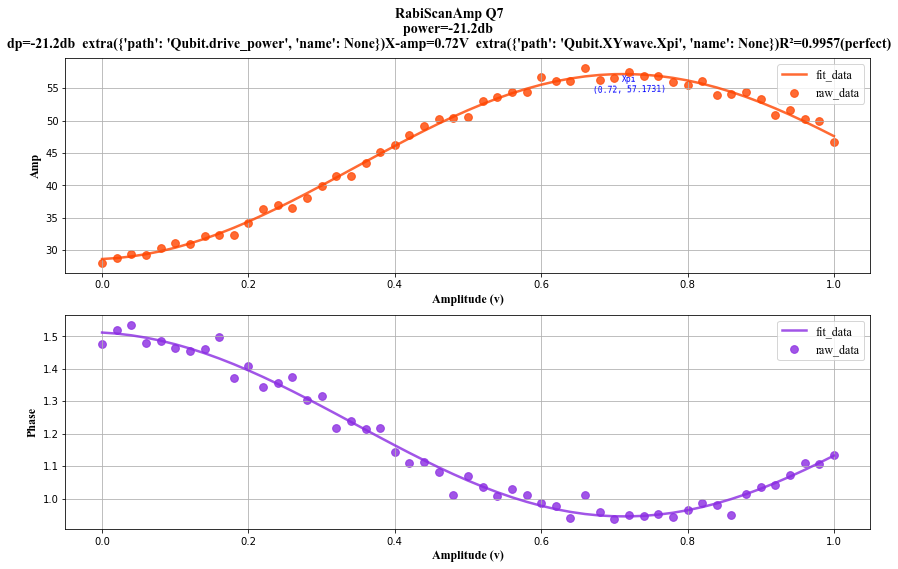

In [31]:
xd.analysis.drawer.figure

### 检查实验质量并更新比特参数

In [32]:
xd_quality = xd.analysis.quality.descriptor
Xpi = xd.analysis.results.Xpi.value
drive_power = xd.analysis.results.drive_power.value

if xd_quality in [Quality.perfect, Quality.abnormal]:
    qubit.XYwave.Xpi = Xpi
    qubit.XYwave.Xpi2 = round(Xpi / 2, 3)
    qubit.drive_power = drive_power
    pyqlog.info(f'Update {qubit} Xpi {qubit.XYwave.Xpi}v, Xpi2 {qubit.XYwave.Xpi2}v, drive_power {qubit.drive_power}db')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-26 15:44:50 |   INFO   | Update Qubit(bit=7) Xpi 0.72v, Xpi2 0.36v, drive_power -21.2db
2023-01-26 15:44:50 |  UPDATE  | Save q7 to data service success.


### 检索比特参数，检查是否更新成功

In [49]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'XYwave']
    )
)

parameter     value unit update_time
0             probe_freq  7126.654  MHz        None
1            probe_power   -36.000   db        None
2             drive_freq  4796.256  MHz        None
3            drive_power   -10.000   db        None
4             XYwave.Xpi     0.820    v        None
5            XYwave.Xpi2     0.410    v        None
6             XYwave.Ypi       NaN    v        None
7            XYwave.Ypi2       NaN    v        None
8             XYwave.Zpi       NaN    v        None
9   XYwave.baseband_freq   566.667  MHz        None
10          XYwave.delta  -240.000    -        None
11      XYwave.detune_pi     0.000  GHz        None
12     XYwave.detune_pi2     0.000  GHz        None
13          XYwave.alpha     1.000    -        None
14         XYwave.offset     5.000   ns        None
15           XYwave.time    50.000   ns        None

## ReadoutFreqCalibrate

读取频率优化，此实验执行两次腔能谱实验，第一次不加驱动脉冲测量，第二次加驱动脉冲测量，通过分析两个子实验选择合适的读取频率。

### 读取工作点设置

In [17]:
qubit.readout_point.amp = 0
qubit.save_data()

2022-12-09 15:35:10 |  UPDATE  | Save q70 to data service success.


In [49]:
qubit.probe_power = -30

2023-01-27 00:24:59 |   EXP    | CavityFreqSpectrum register success, id 63d2a95b84ac4f5951eafa8a
2023-01-27 00:24:59 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutFreqCalibrate\q7\2023-01-27\00.24.59\CavityFreqSpectrum\00-24-59-xy_pulse amp=0\


<IPython.core.display.Javascript object>


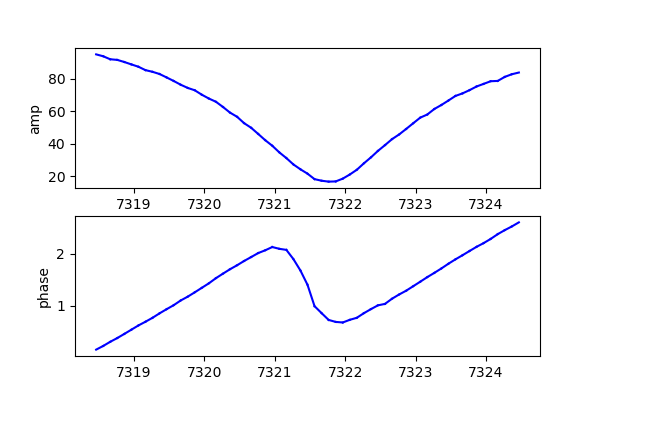

  0%|          | 0/61 [00:00<?, ?it/s]

2023-01-27 00:25:10 |  RESULT  | Experiment results as follow:
| name  |  describe   |  value   | unit |      quality       | 
--------------------------------------------------------------
|  fr   |     fc      | 7321.767 | MHz  | R²=0.9991(perfect) | 
| power | probe power |   -30    |  db  | R²=0.9991(perfect) | 
2023-01-27 00:25:10 |   EXP    | CavityFreqSpectrum register success, id 63d2a96684ac4f5951eafa8c
2023-01-27 00:25:10 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutFreqCalibrate\q7\2023-01-27\00.24.59\CavityFreqSpectrum\00-25-10-xy_pulse amp=0.7056\


<IPython.core.display.Javascript object>


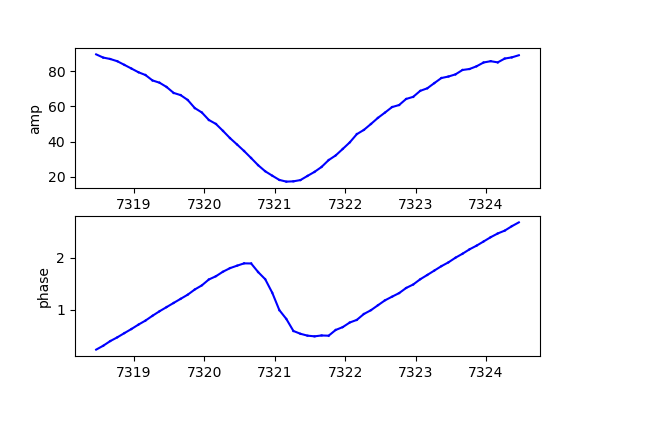

  0%|          | 0/61 [00:00<?, ?it/s]

2023-01-27 00:25:21 |  RESULT  | Experiment results as follow:
| name  |  describe   |  value   | unit |      quality       | 
--------------------------------------------------------------
|  fr   |     fc      | 7321.226 | MHz  | R²=0.9989(perfect) | 
| power | probe power |   -30    |  db  | R²=0.9989(perfect) | 
2023-01-27 00:25:22 |  RESULT  | Experiment results as follow:
|      name       |   describe    |       value        | unit | quality | 
-------------------------------------------------------------------------
|       fr        |  CavityFreq   |      7321.496      | MHz  |  None   | 
|     mean_fr     |     Mean      |      7321.496      | MHz  |  None   | 
|   distance_fr   |   Distance    |      7321.065      | MHz  |  None   | 
| distance_power  | Distancepower |        None        | MHz  |  None   | 
| intersection_fr | Intersection  |      7321.465      | MHz  |  None   | 
|    distance     |  max amp gap  | 31.212075511275955 |  v   |  None   | 
|      shift      | 

In [50]:
rfc = ReadoutFreqCalibrate.from_experiment_context(context)
rfc.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

rfc.set_experiment_options(
#     simulator_data_path='../scripts/simulator/data/ReadoutFreqCalibrate/'
)

rfc.set_analysis_options(
    distance_flag=False, diff_threshold=0.1
)

rfc.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
)

rfc.child_experiment.set_analysis_options(
    quality_bounds=[0.98, 0.95, 0.85], is_plot=True
)

rfc.run()

### 查看实验结果

In [56]:
pd.DataFrame(rfc.analysis.show_results())

name       value  unit  \
0    CavityFreq    7002.611   MHz   
1          Mean    7002.611   MHz   
2      Distance    7003.404   MHz   
3  Intersection    7002.504   MHz   
4   max amp gap  415.318217     v   
5         shift        True  None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  extra  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    {}   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    {}   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### 查看实验结果图

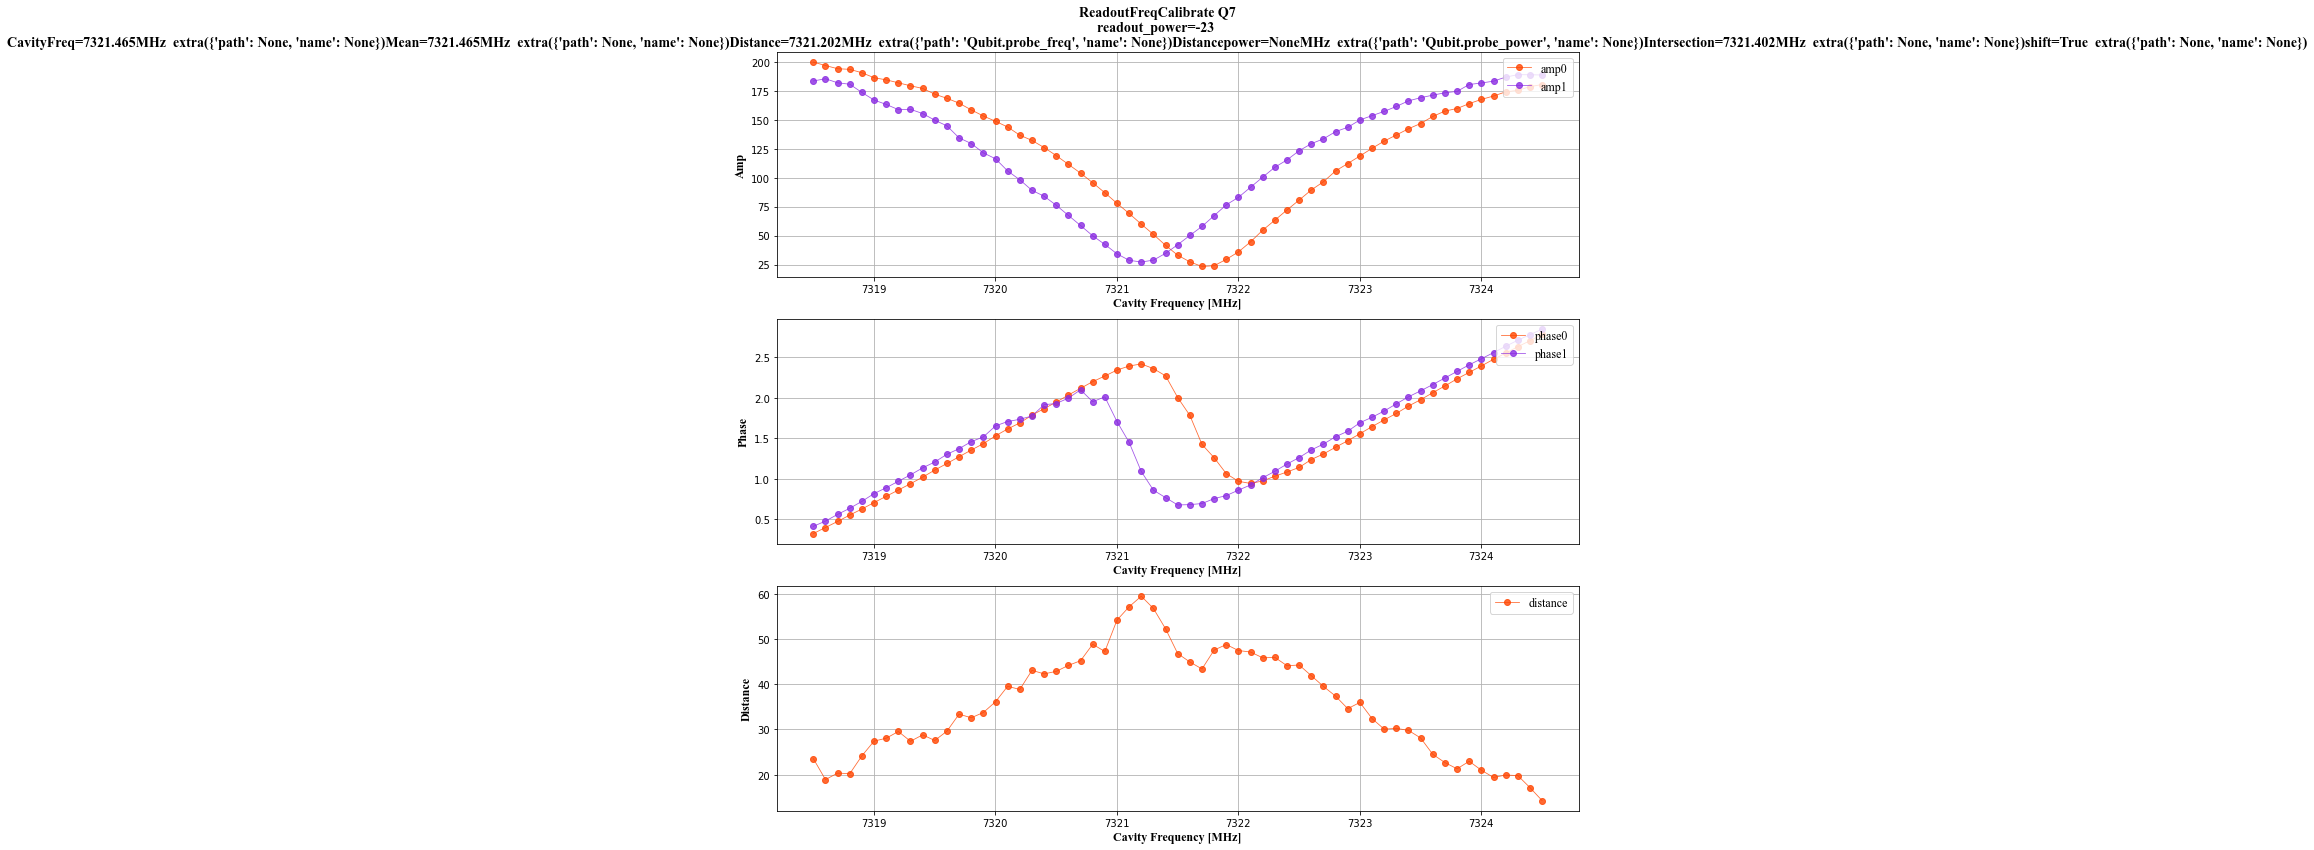

In [24]:
rfc.analysis.drawer.figure

### 更新比特参数

In [51]:
rfc.analysis.results.fr.value

7321.496

In [52]:
qubit.probe_freq = rfc.analysis.results.fr.value
qubit.save_data()

2023-01-27 00:26:10 |  UPDATE  | Save q7 to data service success.


{'code': 200, 'data': {}, 'msg': 'success'}

In [37]:
qubit.probe_freq

7321.564

### 检索比特参数信息

In [57]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'XYwave']
    )
)

parameter     value unit update_time
0             probe_freq  7126.303  MHz        None
1            probe_power   -36.000   db        None
2             drive_freq  4796.256  MHz        None
3            drive_power   -10.000   db        None
4             XYwave.Xpi     0.820    v        None
5            XYwave.Xpi2     0.410    v        None
6             XYwave.Ypi       NaN    v        None
7            XYwave.Ypi2       NaN    v        None
8             XYwave.Zpi       NaN    v        None
9   XYwave.baseband_freq   566.667  MHz        None
10          XYwave.delta  -240.000    -        None
11      XYwave.detune_pi     0.000  GHz        None
12     XYwave.detune_pi2     0.000  GHz        None
13          XYwave.alpha     1.000    -        None
14         XYwave.offset     5.000   ns        None
15           XYwave.time    50.000   ns        None

## ReadoutPowerCalibrate

读取功率优化，此实验固定其他参数，扫描读取频率执行 `SingleShot` 实验，找到 `IQ` 数据分的最开下的读取功率

In [13]:
rpc = ReadoutPowerCalibrate.from_experiment_context(context)
rpc.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

power_list = qarange(-30, -15, 1)

rpc.set_experiment_options(
    sweep_list=power_list,
#     simulator_data_path='../scripts/simulator/data/ReadoutPowerCalibrate/'
)

rpc.set_analysis_options(
    fidelity_threshold=[0.8, 0.5],
    outlier=0.011,
)

rpc.child_experiment.set_experiment_options(
    repeat=5000,
    ac_prepare_time=8000,
)

rpc.child_experiment.set_analysis_options(
    quality_bounds=[2, 0.85, 0.7, 0.011], is_plot=True, method="GMM"
)

rpc.run()

2023-01-27 02:35:54 |   EXP    | Run SingleShot probe_power: -30
2023-01-27 02:35:54 |   EXP    | SingleShot register success, id 63d2c80a24b1eca2f18a67e7
2023-01-27 02:35:54 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-35-54-probe_power=-30\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:35:56 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8474 F1=0.7804 F2=None AVE=0.8139 OL=0.0096 | None | {'q7': bad} | 
2023-01-27 02:35:56 |   EXP    | Run SingleShot probe_power: -29
2023-01-27 02:35:56 |   EXP    | SingleShot register success, id 63d2c80c24b1eca2f18a6807
2023-01-27 02:35:56 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-35-56-probe_power=-29\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:35:58 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8646 F1=0.796 F2=None AVE=0.8303 OL=0.0065 | None | {'q7': normal} | 
2023-01-27 02:35:58 |   EXP    | Run SingleShot probe_power: -28
2023-01-27 02:35:58 |   EXP    | SingleShot register success, id 63d2c80e24b1eca2f18a6827
2023-01-27 02:35:58 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-35-58-probe_power=-28\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:00 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8884 F1=0.7938 F2=None AVE=0.8411 OL=0.007 | None | {'q7': normal} | 
2023-01-27 02:36:00 |   EXP    | Run SingleShot probe_power: -27
2023-01-27 02:36:00 |   EXP    | SingleShot register success, id 63d2c81024b1eca2f18a6847
2023-01-27 02:36:00 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-00-probe_power=-27\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:02 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9162 F1=0.8288 F2=None AVE=0.8725 OL=0.0084 | None | {'q7': normal} | 
2023-01-27 02:36:02 |   EXP    | Run SingleShot probe_power: -26
2023-01-27 02:36:02 |   EXP    | SingleShot register success, id 63d2c81224b1eca2f18a6867
2023-01-27 02:36:02 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-02-probe_power=-26\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:04 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9352 F1=0.8548 F2=None AVE=0.895 OL=0.0091 | None | {'q7': normal} | 
2023-01-27 02:36:04 |   EXP    | Run SingleShot probe_power: -25
2023-01-27 02:36:04 |   EXP    | SingleShot register success, id 63d2c81424b1eca2f18a6887
2023-01-27 02:36:04 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-04-probe_power=-25\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:06 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9512 F1=0.8774 F2=None AVE=0.9143 OL=0.0089 | None | {'q7': normal} | 
2023-01-27 02:36:06 |   EXP    | Run SingleShot probe_power: -24
2023-01-27 02:36:06 |   EXP    | SingleShot register success, id 63d2c81624b1eca2f18a68a7
2023-01-27 02:36:06 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-06-probe_power=-24\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:08 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9596 F1=0.879 F2=None AVE=0.9193 OL=0.0114 | None | {'q7': bad} | 
2023-01-27 02:36:08 |   EXP    | Run SingleShot probe_power: -23
2023-01-27 02:36:08 |   EXP    | SingleShot register success, id 63d2c81824b1eca2f18a68c7
2023-01-27 02:36:08 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-08-probe_power=-23\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:10 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.9654 F1=0.9078 F2=None AVE=0.9366 OL=0.0131 | None | {'q7': bad} | 
2023-01-27 02:36:10 |   EXP    | Run SingleShot probe_power: -22
2023-01-27 02:36:10 |   EXP    | SingleShot register success, id 63d2c81a24b1eca2f18a68e7
2023-01-27 02:36:10 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-10-probe_power=-22\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:12 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.971 F1=0.9126 F2=None AVE=0.9418 OL=0.0118 | None | {'q7': bad} | 
2023-01-27 02:36:12 |   EXP    | Run SingleShot probe_power: -21
2023-01-27 02:36:12 |   EXP    | SingleShot register success, id 63d2c81c24b1eca2f18a6907
2023-01-27 02:36:12 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-12-probe_power=-21\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:14 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.949 F1=0.9246 F2=None AVE=0.9368 OL=0.0222 | None | {'q7': bad} | 
2023-01-27 02:36:14 |   EXP    | Run SingleShot probe_power: -20
2023-01-27 02:36:14 |   EXP    | SingleShot register success, id 63d2c81e24b1eca2f18a6927
2023-01-27 02:36:14 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-14-probe_power=-20\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:16 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.9328 F1=0.9172 F2=None AVE=0.925 OL=0.0231 | None | {'q7': bad} | 
2023-01-27 02:36:16 |   EXP    | Run SingleShot probe_power: -19
2023-01-27 02:36:16 |   EXP    | SingleShot register success, id 63d2c82024b1eca2f18a6947
2023-01-27 02:36:16 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-16-probe_power=-19\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:18 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.8736 F1=0.9344 F2=None AVE=0.904 OL=0.0092 | None | {'q7': bad} | 
2023-01-27 02:36:18 |   EXP    | Run SingleShot probe_power: -18
2023-01-27 02:36:18 |   EXP    | SingleShot register success, id 63d2c82224b1eca2f18a6967
2023-01-27 02:36:18 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-18-probe_power=-18\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:20 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.8524 F1=0.9322 F2=None AVE=0.8923 OL=0.0076 | None | {'q7': bad} | 
2023-01-27 02:36:20 |   EXP    | Run SingleShot probe_power: -17
2023-01-27 02:36:20 |   EXP    | SingleShot register success, id 63d2c82424b1eca2f18a6987
2023-01-27 02:36:20 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-20-probe_power=-17\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:22 |  RESULT  | Experiment results as follow:
| name | describe |                       value                        | unit |   quality   | 
---------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.7896 F1=0.58 F2=None AVE=0.6848 OL=0.0034 | None | {'q7': bad} | 
2023-01-27 02:36:22 |   EXP    | Run SingleShot probe_power: -16
2023-01-27 02:36:22 |   EXP    | SingleShot register success, id 63d2c82624b1eca2f18a69a7
2023-01-27 02:36:22 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-22-probe_power=-16\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:24 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.7242 F1=0.7288 F2=None AVE=0.7265 OL=0.0029 | None | {'q7': bad} | 
2023-01-27 02:36:24 |   EXP    | Run SingleShot probe_power: -15
2023-01-27 02:36:24 |   EXP    | SingleShot register success, id 63d2c82824b1eca2f18a69c7
2023-01-27 02:36:24 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ReadoutPowerCalibrate\q7\2023-01-27\02.35.54\SingleShot\02-36-24-probe_power=-15\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:36:26 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.6584 F1=0.9646 F2=None AVE=0.8115 OL=0.0056 | None | {'q7': bad} | 
2023-01-27 02:36:26 |  RESULT  | Experiment results as follow:
|      name      |    describe    | value | unit | quality | 
------------------------------------------------------------
| optimize_field | optimize_field |  -22  | None |  None   | 
| fidelity_flag  | fidelity_flag  | True  | None |  None   | 
|  outlier_flag  |  outlier_flag  | False | None |  None   | 
|     status     |     status     |   0   | None |  None   | 
2023-01-27 02:36:26 | WARNING  | Readout Power Calibrate q7 Failed! Fail to meet the conditions, fidelity_flag: True, outlier_flag: False .


### 查询实验结果

In [51]:
pd.DataFrame(rpc.analysis.show_results())

name value  unit extra quality
0  optimize_field   -34  None    {}    None
1   fidelity_flag  True  None    {}    None
2    outlier_flag  True  None    {}    None
3          status     0  None    {}    None

### 查询实验结果图

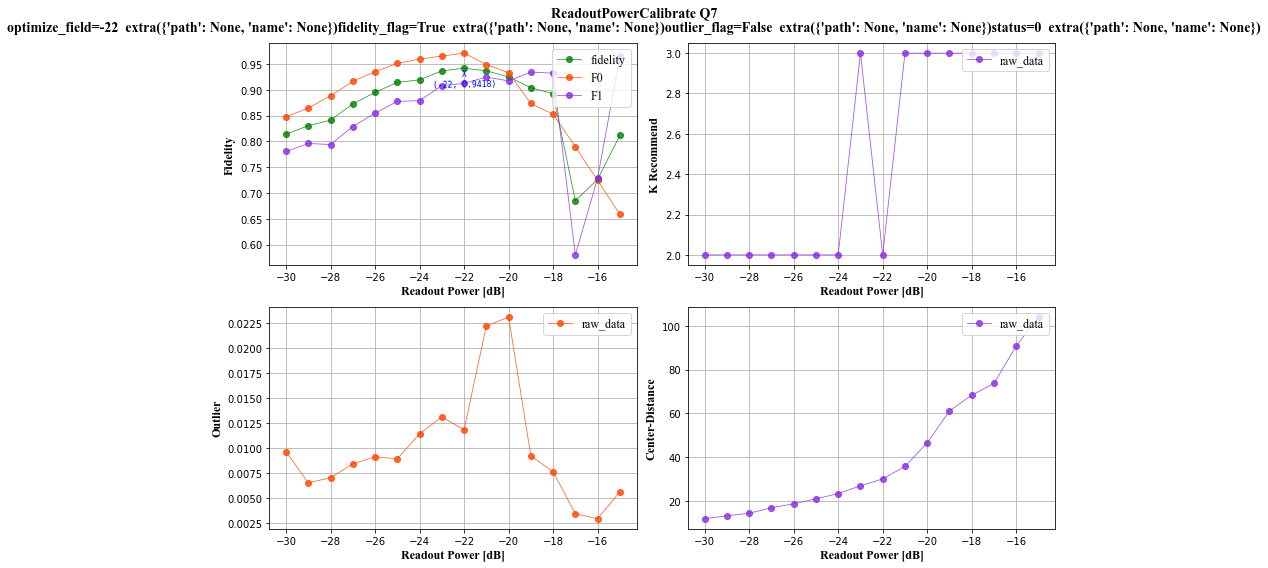

In [14]:
rpc.analysis.drawer.figure

### 查询子实验结果图

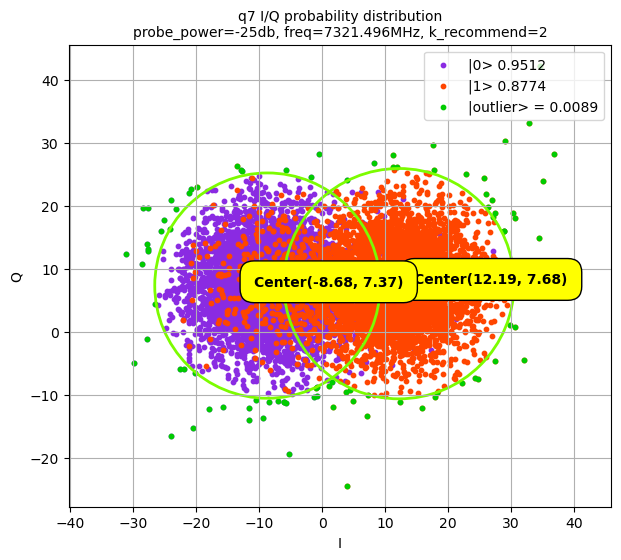

In [16]:
rpc.component_experiment(index=5).analysis.drawer.figure

### 更新比特参数

In [17]:
qubit.probe_power = -25
qubit.save_data()

2023-01-27 02:37:18 |  UPDATE  | Save q7 to data service success.


{'code': 200, 'data': {}, 'msg': 'success'}

In [83]:
type(rpc.analysis.results.optimize_field.value)

numpy.int32

### 检索比特参数

In [7]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'XYwave']
    )
)

parameter     value unit update_time
0             probe_freq  7125.989  MHz        None
1            probe_power   -36.000   db        None
2             drive_freq  4623.719  MHz        None
3            drive_power   -10.000   db        None
4             XYwave.Xpi     0.960    v        None
5            XYwave.Xpi2     0.480    v        None
6             XYwave.Ypi       NaN    v        None
7            XYwave.Ypi2       NaN    v        None
8             XYwave.Zpi       NaN    v        None
9   XYwave.baseband_freq   566.667  MHz        None
10          XYwave.delta  -240.000    -        None
11      XYwave.detune_pi     0.000  GHz        None
12     XYwave.detune_pi2     0.000  GHz        None
13          XYwave.alpha     1.000    -        None
14         XYwave.offset     5.000   ns        None
15           XYwave.time    50.000   ns        None

## SampleWidthOptimize

采样宽度优化，此实验固定其他参数，扫描采集宽度执行 `SingleShot` 实验，找到 `IQ` 数据分的最开下的采集宽度

In [18]:
swo = SampleWidthOptimize.from_experiment_context(context)
swo.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

width_list = qarange(800, 3500, 100)

swo.set_experiment_options(
    sweep_list=width_list,
#     simulator_data_path='../scripts/simulator/data/SampleWidthOptimize/'
)

swo.set_analysis_options(
    fidelity_threshold=[0.9, 0.8],
    outlier=0.011,
    distance_flag=False,
)

swo.child_experiment.set_experiment_options(repeat=5000,ac_prepare_time=8000,)

swo.child_experiment.set_analysis_options(
    quality_bounds=[2, 0.85, 0.7, 0.011], is_plot=True, method="GMM"
)

swo.run()

2023-01-27 02:37:22 |   EXP    | Run SingleShot sample_width: 800
2023-01-27 02:37:23 |   EXP    | SingleShot register success, id 63d2c86324b1eca2f18a69e7
2023-01-27 02:37:23 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-22-sample_width=800\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:24 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8944 F1=0.8542 F2=None AVE=0.8743 OL=0.0079 | None | {'q7': normal} | 
2023-01-27 02:37:24 |   EXP    | Run SingleShot sample_width: 900
2023-01-27 02:37:25 |   EXP    | SingleShot register success, id 63d2c86524b1eca2f18a6a07
2023-01-27 02:37:25 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-24-sample_width=900\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:26 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9082 F1=0.8798 F2=None AVE=0.894 OL=0.0104 | None | {'q7': normal} | 
2023-01-27 02:37:26 |   EXP    | Run SingleShot sample_width: 1000
2023-01-27 02:37:27 |   EXP    | SingleShot register success, id 63d2c86724b1eca2f18a6a27
2023-01-27 02:37:27 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-26-sample_width=1000\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:28 |  RESULT  | Experiment results as follow:
| name | describe |                       value                       | unit |   quality   | 
--------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.92 F1=0.881 F2=None AVE=0.9005 OL=0.0153 | None | {'q7': bad} | 
2023-01-27 02:37:28 |   EXP    | Run SingleShot sample_width: 1100
2023-01-27 02:37:29 |   EXP    | SingleShot register success, id 63d2c86924b1eca2f18a6a47
2023-01-27 02:37:29 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-28-sample_width=1100\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:30 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.915 F1=0.8806 F2=None AVE=0.8978 OL=0.0092 | None | {'q7': normal} | 
2023-01-27 02:37:30 |   EXP    | Run SingleShot sample_width: 1200
2023-01-27 02:37:30 |   EXP    | SingleShot register success, id 63d2c86a24b1eca2f18a6a67
2023-01-27 02:37:30 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-30-sample_width=1200\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:32 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9476 F1=0.8742 F2=None AVE=0.9109 OL=0.0099 | None | {'q7': normal} | 
2023-01-27 02:37:32 |   EXP    | Run SingleShot sample_width: 1300
2023-01-27 02:37:32 |   EXP    | SingleShot register success, id 63d2c86c24b1eca2f18a6a87
2023-01-27 02:37:32 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-32-sample_width=1300\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:34 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9406 F1=0.8818 F2=None AVE=0.9112 OL=0.0085 | None | {'q7': normal} | 
2023-01-27 02:37:34 |   EXP    | Run SingleShot sample_width: 1400
2023-01-27 02:37:34 |   EXP    | SingleShot register success, id 63d2c86e24b1eca2f18a6aa7
2023-01-27 02:37:34 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-34-sample_width=1400\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:36 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9482 F1=0.8984 F2=None AVE=0.9233 OL=0.0097 | None | {'q7': normal} | 
2023-01-27 02:37:36 |   EXP    | Run SingleShot sample_width: 1500
2023-01-27 02:37:36 |   EXP    | SingleShot register success, id 63d2c87024b1eca2f18a6ac7
2023-01-27 02:37:36 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-36-sample_width=1500\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:38 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9494 F1=0.907 F2=None AVE=0.9282 OL=0.0143 | None | {'q7': bad} | 
2023-01-27 02:37:38 |   EXP    | Run SingleShot sample_width: 1600
2023-01-27 02:37:38 |   EXP    | SingleShot register success, id 63d2c87224b1eca2f18a6ae7
2023-01-27 02:37:38 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-38-sample_width=1600\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:40 |  RESULT  | Experiment results as follow:
| name | describe |                       value                        | unit |   quality   | 
---------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.944 F1=0.8812 F2=None AVE=0.9126 OL=0.013 | None | {'q7': bad} | 
2023-01-27 02:37:40 |   EXP    | Run SingleShot sample_width: 1700
2023-01-27 02:37:40 |   EXP    | SingleShot register success, id 63d2c87424b1eca2f18a6b07
2023-01-27 02:37:40 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-40-sample_width=1700\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:42 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9438 F1=0.881 F2=None AVE=0.9124 OL=0.0107 | None | {'q7': normal} | 
2023-01-27 02:37:42 |   EXP    | Run SingleShot sample_width: 1800
2023-01-27 02:37:42 |   EXP    | SingleShot register success, id 63d2c87624b1eca2f18a6b27
2023-01-27 02:37:42 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-42-sample_width=1800\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:44 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9436 F1=0.8698 F2=None AVE=0.9067 OL=0.0107 | None | {'q7': normal} | 
2023-01-27 02:37:44 |   EXP    | Run SingleShot sample_width: 1900
2023-01-27 02:37:44 |   EXP    | SingleShot register success, id 63d2c87824b1eca2f18a6b47
2023-01-27 02:37:44 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-44-sample_width=1900\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:46 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9426 F1=0.8656 F2=None AVE=0.9041 OL=0.0085 | None | {'q7': normal} | 
2023-01-27 02:37:46 |   EXP    | Run SingleShot sample_width: 2000
2023-01-27 02:37:46 |   EXP    | SingleShot register success, id 63d2c87a24b1eca2f18a6b67
2023-01-27 02:37:46 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-46-sample_width=2000\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:48 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9372 F1=0.8784 F2=None AVE=0.9078 OL=0.0104 | None | {'q7': normal} | 
2023-01-27 02:37:48 |   EXP    | Run SingleShot sample_width: 2100
2023-01-27 02:37:48 |   EXP    | SingleShot register success, id 63d2c87c24b1eca2f18a6b87
2023-01-27 02:37:48 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-48-sample_width=2100\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:50 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9316 F1=0.8594 F2=None AVE=0.8955 OL=0.0133 | None | {'q7': bad} | 
2023-01-27 02:37:50 |   EXP    | Run SingleShot sample_width: 2200
2023-01-27 02:37:50 |   EXP    | SingleShot register success, id 63d2c87e24b1eca2f18a6ba7
2023-01-27 02:37:50 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-50-sample_width=2200\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:52 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9266 F1=0.8694 F2=None AVE=0.898 OL=0.0095 | None | {'q7': normal} | 
2023-01-27 02:37:52 |   EXP    | Run SingleShot sample_width: 2300
2023-01-27 02:37:52 |   EXP    | SingleShot register success, id 63d2c88024b1eca2f18a6bc7
2023-01-27 02:37:52 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-52-sample_width=2300\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:54 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |   quality   | 
----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=3 F0=0.9234 F1=0.8586 F2=None AVE=0.891 OL=0.0155 | None | {'q7': bad} | 
2023-01-27 02:37:54 |   EXP    | Run SingleShot sample_width: 2400
2023-01-27 02:37:54 |   EXP    | SingleShot register success, id 63d2c88224b1eca2f18a6be7
2023-01-27 02:37:54 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-54-sample_width=2400\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:56 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9294 F1=0.8456 F2=None AVE=0.8875 OL=0.0094 | None | {'q7': normal} | 
2023-01-27 02:37:56 |   EXP    | Run SingleShot sample_width: 2500
2023-01-27 02:37:56 |   EXP    | SingleShot register success, id 63d2c88424b1eca2f18a6c07
2023-01-27 02:37:56 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-56-sample_width=2500\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:37:58 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9182 F1=0.8468 F2=None AVE=0.8825 OL=0.0108 | None | {'q7': normal} | 
2023-01-27 02:37:58 |   EXP    | Run SingleShot sample_width: 2600
2023-01-27 02:37:58 |   EXP    | SingleShot register success, id 63d2c88624b1eca2f18a6c27
2023-01-27 02:37:58 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-37-58-sample_width=2600\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:00 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.918 F1=0.8484 F2=None AVE=0.8832 OL=0.0079 | None | {'q7': normal} | 
2023-01-27 02:38:00 |   EXP    | Run SingleShot sample_width: 2700
2023-01-27 02:38:00 |   EXP    | SingleShot register success, id 63d2c88824b1eca2f18a6c47
2023-01-27 02:38:00 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-00-sample_width=2700\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:02 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9132 F1=0.8388 F2=None AVE=0.876 OL=0.0086 | None | {'q7': normal} | 
2023-01-27 02:38:02 |   EXP    | Run SingleShot sample_width: 2800
2023-01-27 02:38:02 |   EXP    | SingleShot register success, id 63d2c88a24b1eca2f18a6c67
2023-01-27 02:38:02 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-02-sample_width=2800\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:04 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9024 F1=0.859 F2=None AVE=0.8807 OL=0.0094 | None | {'q7': normal} | 
2023-01-27 02:38:04 |   EXP    | Run SingleShot sample_width: 2900
2023-01-27 02:38:04 |   EXP    | SingleShot register success, id 63d2c88c24b1eca2f18a6c87
2023-01-27 02:38:04 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-04-sample_width=2900\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:06 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9066 F1=0.8326 F2=None AVE=0.8696 OL=0.0094 | None | {'q7': normal} | 
2023-01-27 02:38:06 |   EXP    | Run SingleShot sample_width: 3000
2023-01-27 02:38:06 |   EXP    | SingleShot register success, id 63d2c88e24b1eca2f18a6ca7
2023-01-27 02:38:06 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-06-sample_width=3000\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:08 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9172 F1=0.823 F2=None AVE=0.8701 OL=0.0082 | None | {'q7': normal} | 
2023-01-27 02:38:08 |   EXP    | Run SingleShot sample_width: 3100
2023-01-27 02:38:08 |   EXP    | SingleShot register success, id 63d2c89024b1eca2f18a6cc7
2023-01-27 02:38:08 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-08-sample_width=3100\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:10 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8972 F1=0.8348 F2=None AVE=0.866 OL=0.0095 | None | {'q7': normal} | 
2023-01-27 02:38:10 |   EXP    | Run SingleShot sample_width: 3200
2023-01-27 02:38:10 |   EXP    | SingleShot register success, id 63d2c89224b1eca2f18a6ce7
2023-01-27 02:38:10 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-10-sample_width=3200\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:12 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8868 F1=0.8276 F2=None AVE=0.8572 OL=0.0098 | None | {'q7': normal} | 
2023-01-27 02:38:12 |   EXP    | Run SingleShot sample_width: 3300
2023-01-27 02:38:12 |   EXP    | SingleShot register success, id 63d2c89424b1eca2f18a6d07
2023-01-27 02:38:12 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-12-sample_width=3300\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:14 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |   quality   | 
-----------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9082 F1=0.8094 F2=None AVE=0.8588 OL=0.0117 | None | {'q7': bad} | 
2023-01-27 02:38:14 |   EXP    | Run SingleShot sample_width: 3400
2023-01-27 02:38:14 |   EXP    | SingleShot register success, id 63d2c89624b1eca2f18a6d27
2023-01-27 02:38:14 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-14-sample_width=3400\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:16 |  RESULT  | Experiment results as follow:
| name | describe |                        value                         | unit |    quality     | 
--------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8966 F1=0.8272 F2=None AVE=0.8619 OL=0.0106 | None | {'q7': normal} | 
2023-01-27 02:38:16 |   EXP    | Run SingleShot sample_width: 3500
2023-01-27 02:38:16 |   EXP    | SingleShot register success, id 63d2c89824b1eca2f18a6d47
2023-01-27 02:38:16 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SampleWidthOptimize\q7\2023-01-27\02.37.22\SingleShot\02-38-16-sample_width=3500\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 02:38:18 |  RESULT  | Experiment results as follow:
| name | describe |                       value                        | unit |    quality     | 
------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.8884 F1=0.83 F2=None AVE=0.8592 OL=0.0092 | None | {'q7': normal} | 
2023-01-27 02:38:18 |  RESULT  | Experiment results as follow:
|      name      |    describe    | value | unit | quality | 
------------------------------------------------------------
| optimize_field | optimize_field | 1500  | None |  None   | 
| fidelity_flag  | fidelity_flag  | True  | None |  None   | 
|  outlier_flag  |  outlier_flag  | False | None |  None   | 
|     status     |     status     |   0   | None |  None   | 
2023-01-27 02:38:18 |  RESULT  | Experiment results as follow:
|      name      |    describe    | value | unit | quality | 
------------------------------------------------------------
| optimize_field | optim

### 查询实验结果

In [ ]:
pd.DataFrame(swo.analysis.show_results())

### 查询子实验结果图

In [ ]:
swo.component_experiment(5).analysis.drawer.figure

### 查询实验结果图

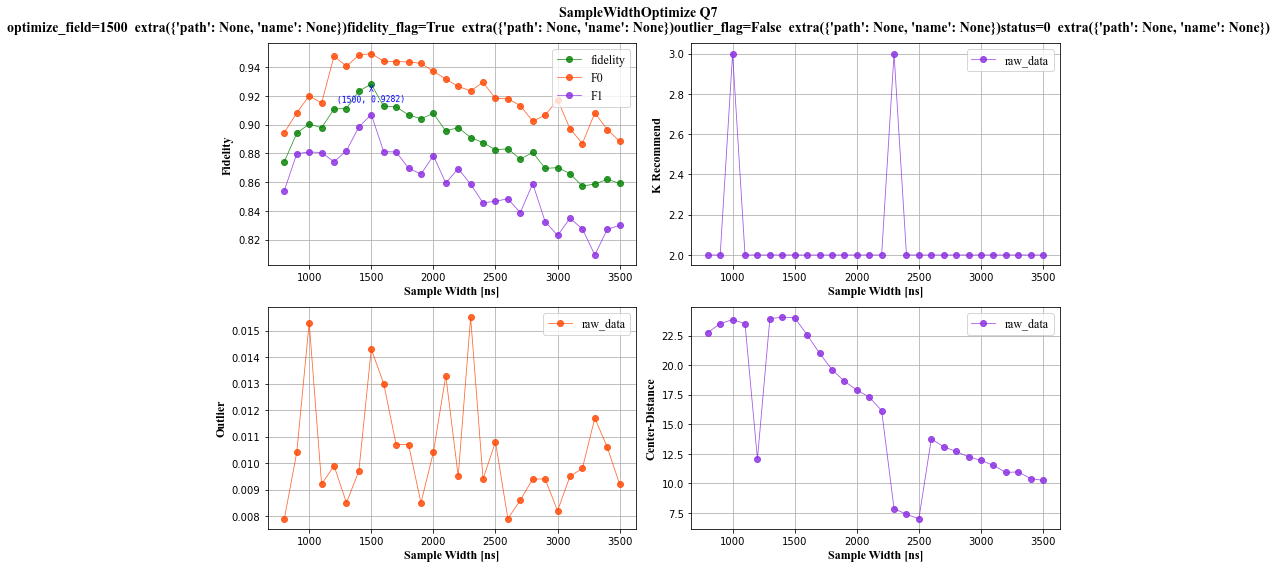

In [19]:
swo.analysis.drawer.figure

### 更新比特参数

In [20]:
qubit.sample_width = 1500
qubit.save_data()

2023-01-27 02:39:20 |  UPDATE  | Save q7 to data service success.


{'code': 200, 'data': {}, 'msg': 'success'}

### 检索比特信息

In [ ]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'XYwave', 'sample_width']
    )
)

## SingleShot

获取 `IQ` 分类器

In [6]:
context.discriminators = None

In [5]:
ss = SingleShot.from_experiment_context(context)
ss.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)
ss.set_experiment_options(
    ac_prepare_time=8000,
    repeat=5000,
    is_check=False,
    save_bin=True,
#     simulator_data_path='../scripts/simulator/data/SingleShot/'
)

ss.set_analysis_options(
    method="GMM", quality_bounds=[2, 0.80, 0.65, 0.011], is_plot=True
)

ss.run()

2023-01-27 21:16:46 |   EXP    | SingleShot register success, id 63d3cebe77f555fe6f9d91b0
2023-01-27 21:16:46 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\SingleShot\q7\2023-01-27\21.16.46\


  0%|          | 0/2 [00:00<?, ?it/s]

2023-01-27 21:16:48 |  RESULT  | Experiment results as follow:
| name | describe |                        value                        | unit |    quality     | 
-------------------------------------------------------------------------------------------------
|  q7  |    q7    | K=2 F0=0.9466 F1=0.8914 F2=None AVE=0.919 OL=0.0097 | None | {'q7': normal} | 
2023-01-27 21:16:48 |  UPDATE  | Save q7.bin to data service success.


### 查询脉冲时序图

In [ ]:
ss.jupyter_schedule()

### 查询实验结果

In [108]:
pd.DataFrame(ss.analysis.show_results())

name                                      value  unit extra          quality
0  q70  K=2 F0=0.979 F1=0.733 AVE=0.856 OL=0.0105  None    {}  {'q70': normal}

### 查询实验结果图

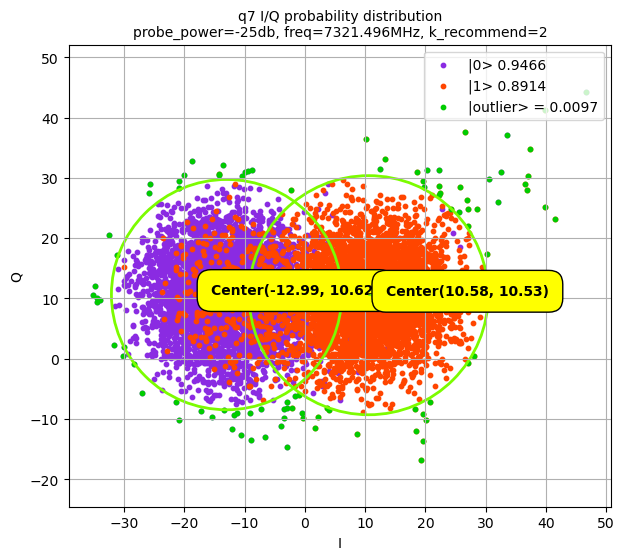

In [6]:
ss.analysis.drawer.figure

### 为当前实验环境绑定比特判据

In [5]:
context.configure_dcm(q_name)

q7 IQdiscriminator<center=[[-12.98905302  10.62446337]
 [ 10.58111177  10.52899552]]>

### 检索当前实验环境中的系统参数

In [133]:
pd.DataFrame(context.context_table())

parameter  \
0          config   
1          qubits   
2        couplers   
3  discriminators   
4     compensates   
5      working_dc   
6  crosstalk_dict   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                object  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               F:\MonsterTest_QT8013\conf\config.conf   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [Qubit(bit=70)]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   []   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 None   
4  {Qubit(bit=64): PulseCorrectionQ64, Qubit(bit=65): PulseCorrectionQ65, Qubit(bit=69): PulseCorrectionQ69, Qubit(bit=71): PulseCorrectionQ71, Qubit(bit=72): PulseCorrectionQ72, Coupler(bit=6470, driveQ64, probeQ70): PulseCorrectionC6470, Coupler(bit=6571, driveQ65, probeQ71): PulseCorrectionC6571, Coupler(bit=6970, driveQ69, probeQ70): PulseCorrectionC6970, Coupler(bit=7071, driveQ70, probeQ71): PulseCorrectionC7071, Coupler(bit=7172, driveQ71, probeQ72): PulseCorrectionC7172, Qubit(bit=70): PulseCorrectionQ70}   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 True   
6                                                                                                                                                                                        

## DriveFreqCalibrate


驱动频率校准实验，该实验通过执行两次 `Ramsey` 实验，精细校准比特的驱动频率

In [16]:
qubit.drive_freq = 4008

2023-01-27 02:31:30 |   EXP    | Ramsey register success, id 63d2c70224b1eca2f18a6644
2023-01-27 02:31:30 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\QubitFreqCalibration\q7\2023-01-27\02.31.17\Ramsey\02-31-17-fringe=80MHz\


<IPython.core.display.Javascript object>


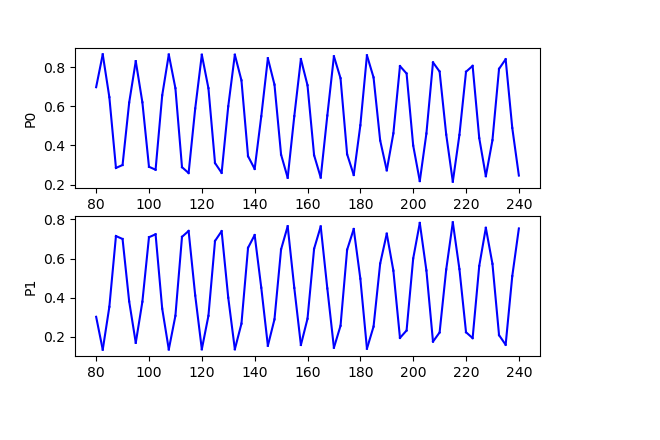

  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 02:31:39 |  RESULT  | Experiment results as follow:
| name | describe |  value   | unit |      quality       | 
----------------------------------------------------------
| freq |   fosc   | 79.18397 | MHz  | R²=0.9938(perfect) | 
2023-01-27 02:31:53 |   EXP    | Ramsey register success, id 63d2c71924b1eca2f18a67a7
2023-01-27 02:31:53 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\QubitFreqCalibration\q7\2023-01-27\02.31.17\Ramsey\02-31-39-fringe=-80MHz\


<IPython.core.display.Javascript object>


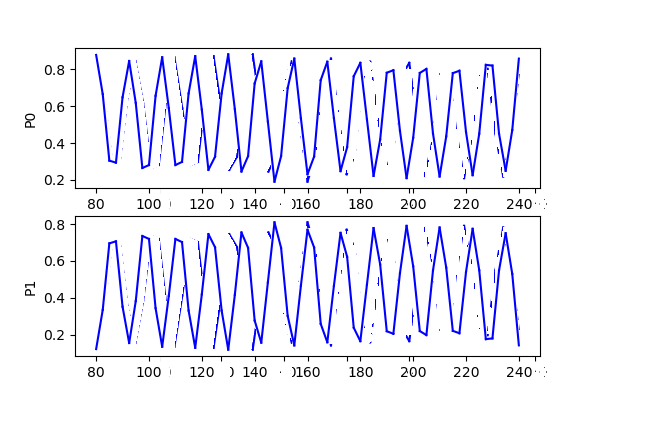

  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 02:32:01 |  RESULT  | Experiment results as follow:
| name | describe |  value   | unit |      quality       | 
----------------------------------------------------------
| freq |   fosc   | 80.76675 | MHz  | R²=0.9941(perfect) | 
2023-01-27 02:32:01 |  RESULT  | Experiment results as follow:
|      name       |    describe     |                      value                       | unit |     quality     | 
-----------------------------------------------------------------------------------------------------------------
|   f01_records   |   f01_records   | [4210.36625, 4371.89975, 4371.94903, 4530.31697] | MHz  | Quality.perfect | 
|       f01       |       f01       |                     4371.924                     | MHz  | Quality.perfect | 
| minimum_f01_gap | minimum_f01_gap |                      0.049                       | MHz  | Quality.perfect | 


In [7]:
qfc = QubitFreqCalibration.from_experiment_context(context)
qfc.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

qfc.set_experiment_options(
    fringes=[80, -80],
    delays=qarange(80, 240, 2.5),
#     simulator_data_path='../scripts/simulator/data/QubitFreqCalibration/',
    show_result=True,
    
    
)

qfc.set_analysis_options(freq_gap_threshold=0.2,
                         is_plot=True)

qfc.child_experiment.set_analysis_options(
    quality_bounds=[0.98, 0.9, 0.8],
    is_plot=True,

)
qfc.child_experiment.set_experiment_options(is_dynamic=1, ac_prepare_time=8000,show_result=True,)
qfc.run()

### 检索子实验的脉冲时序图

In [ ]:
qfc.component_experiment(index=0).jupyter_schedule()

### 查询实验结果图

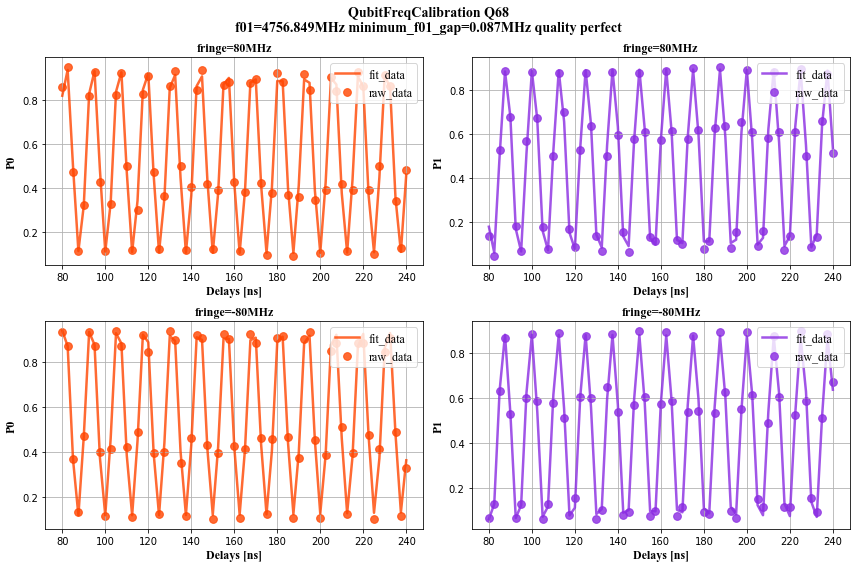

In [14]:
qfc.analysis.drawer.figure

### 更新比特参数

In [9]:
qfc_quality = qfc.analysis.quality.value
f01 = qfc.analysis.results.f01.value
if qfc_quality in [Quality.perfect, Quality.bad]:
    qubit.drive_freq = f01
    pyqlog.info(f'Update {qubit} drive_freq {qubit.drive_freq}MHz!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-27 02:35:26 |   INFO   | Update Qubit(bit=7) drive_freq 4371.924MHz!
2023-01-27 02:35:26 |  UPDATE  | Save q7 to data service success.


In [27]:
qubit.drive_freq = 4360

### 检索比特信息

In [128]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'XYwave', 'sample_width']
    )
)

parameter      value unit update_time
0             probe_freq  7141.9990  MHz        None
1            probe_power   -34.0000   db        None
2             drive_freq  4018.1760  MHz        None
3            drive_power   -10.0000   db        None
4             XYwave.Xpi     0.8686    v        None
5            XYwave.Xpi2     0.4299    v        None
6             XYwave.Ypi        NaN    v        None
7            XYwave.Ypi2        NaN    v        None
8             XYwave.Zpi        NaN    v        None
9   XYwave.baseband_freq   566.6670  MHz        None
10          XYwave.delta  -240.0000    -        None
11      XYwave.detune_pi    -6.2000  GHz        None
12     XYwave.detune_pi2    -6.2000  GHz        None
13          XYwave.alpha     1.0000    -        None
14         XYwave.offset     5.0000   ns        None
15           XYwave.time    20.0000   ns        None
16          sample_width  1000.0000   ns        None

## DetuneCalibration

DetuneCalibration 实验，精细校准失谐量 `detune`

In [44]:
qubit.XYwave.delta = -197.2
qubit.XYwave.alpha = 1
qubit.save_data()

2022-12-21 18:26:18 |  UPDATE  | Save q68 to data service success.


2023-01-26 17:04:14 |   EXP    | theta_type: Xpi, N: 6
2023-01-26 17:04:28 |   EXP    | APE register success, id 63d2421c9c839aaa76743a5e
2023-01-26 17:04:28 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\DetuneCalibration\q7\2023-01-26\17.04.14\APEComposite\17-04-14-RoughScan\APE\17-04-14-N=6\


<IPython.core.display.Javascript object>


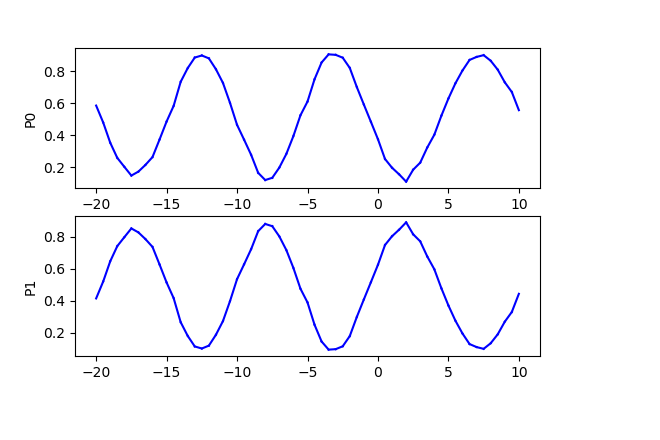

  0%|          | 0/61 [00:00<?, ?it/s]

2023-01-26 17:04:36 |  RESULT  | Experiment results as follow:
|     name     |   describe   |              value               | unit |      quality       | 
----------------------------------------------------------------------------------------------
|   points_0   |   points_0   | detune peaks: [-12.5, -3.5, 7.5] | None | R²=0.9673(perfect) | 
| fit_points_0 | fit_points_0 | detune peaks: [-12.5, -3.0, 7.0] | None | R²=0.9673(perfect) | 
2023-01-26 17:04:36 |   EXP    | theta_type: Xpi, N: 7
2023-01-26 17:04:49 |   EXP    | APE register success, id 63d242319c839aaa76743bb4
2023-01-26 17:04:49 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\DetuneCalibration\q7\2023-01-26\17.04.14\APEComposite\17-04-14-RoughScan\APE\17-04-36-N=7\


<IPython.core.display.Javascript object>


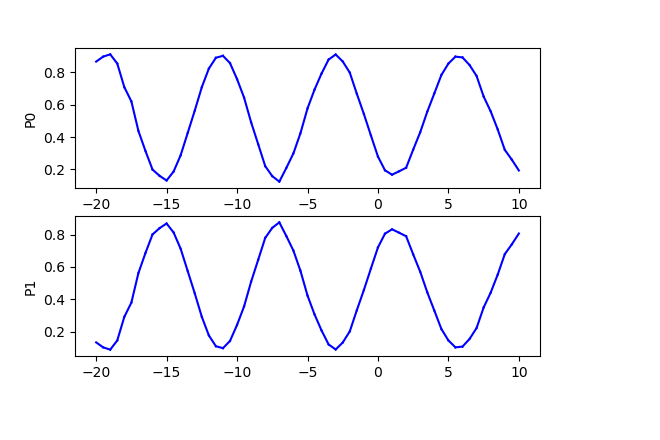

  0%|          | 0/61 [00:00<?, ?it/s]

2023-01-26 17:04:57 |  RESULT  | Experiment results as follow:
|     name     |   describe   |              value               | unit |      quality       | 
----------------------------------------------------------------------------------------------
|   points_0   |   points_0   | detune peaks: [-11.0, -3.0, 5.5] | None | R²=0.9715(perfect) | 
| fit_points_0 | fit_points_0 | detune peaks: [-11.0, -3.0, 5.5] | None | R²=0.9715(perfect) | 
2023-01-26 17:04:57 |   EXP    | theta_type: Xpi, N: 8
2023-01-26 17:05:10 |   EXP    | APE register success, id 63d242469c839aaa76743d0a
2023-01-26 17:05:10 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\DetuneCalibration\q7\2023-01-26\17.04.14\APEComposite\17-04-14-RoughScan\APE\17-04-57-N=8\


<IPython.core.display.Javascript object>


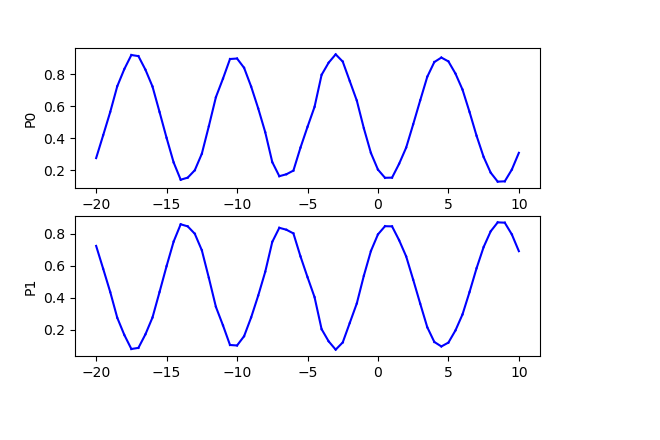

  0%|          | 0/61 [00:00<?, ?it/s]

2023-01-26 17:05:18 |  RESULT  | Experiment results as follow:
|     name     |   describe   |                  value                  | unit |      quality       | 
-----------------------------------------------------------------------------------------------------
|   points_0   |   points_0   | detune peaks: [-17.5, -10.0, -3.0, 4.5] | None | R²=0.9628(perfect) | 
| fit_points_0 | fit_points_0 | detune peaks: [-17.5, -10.0, -2.5, 4.5] | None | R²=0.9628(perfect) | 
2023-01-26 17:05:18 |  RESULT  | Experiment results as follow:
|  name  | describe |        value        | unit |     quality      | 
---------------------------------------------------------------------
| detune |  detune  | -3.1666666666666665 | MHz  | coincidence good | 
2023-01-26 17:05:18 |   EXP    | theta_type: Xpi, N: 7
2023-01-26 17:05:24 |   EXP    | APE register success, id 63d242549c839aaa76743db7
2023-01-26 17:05:24 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\

<IPython.core.display.Javascript object>


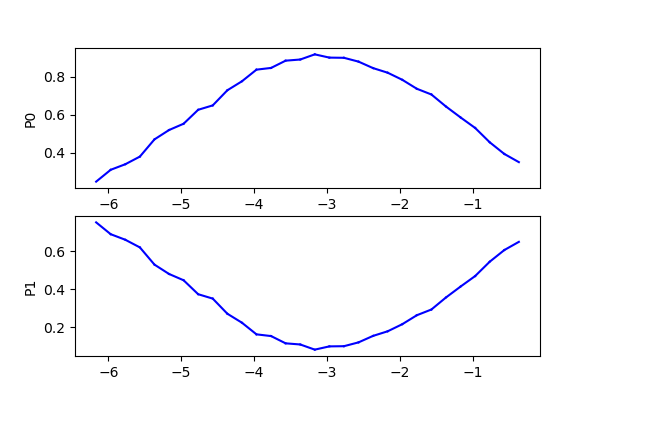

  0%|          | 0/30 [00:00<?, ?it/s]

2023-01-26 17:05:28 |  RESULT  | Experiment results as follow:
|     name     |   describe   |           value           | unit |      quality       | 
---------------------------------------------------------------------------------------
|   points_0   |   points_0   | detune peaks: [-3.166667] | None | R²=0.9985(perfect) | 
| fit_points_0 | fit_points_0 | detune peaks: [-2.966667] | None | R²=0.9985(perfect) | 
2023-01-26 17:05:28 |   EXP    | theta_type: Xpi, N: 9
2023-01-26 17:05:35 |   EXP    | APE register success, id 63d2425f9c839aaa76743e72
2023-01-26 17:05:35 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\DetuneCalibration\q7\2023-01-26\17.04.14\APEComposite\17-05-18-FineScan\APE\17-05-28-N=9\


<IPython.core.display.Javascript object>


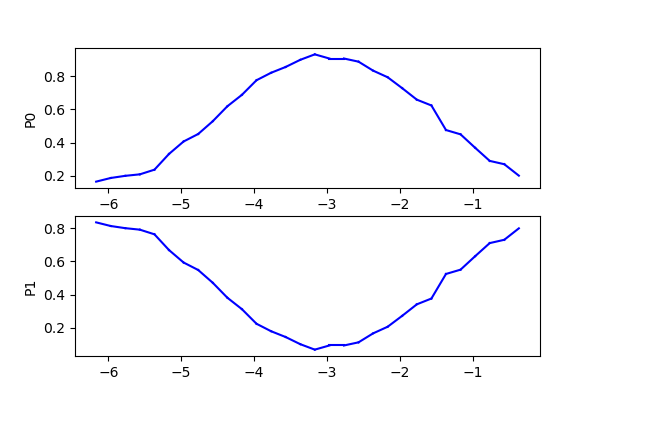

  0%|          | 0/30 [00:00<?, ?it/s]

2023-01-26 17:05:39 |  RESULT  | Experiment results as follow:
|     name     |   describe   |           value           | unit |      quality      | 
--------------------------------------------------------------------------------------
|   points_0   |   points_0   | detune peaks: [-3.166667] | None | R²=0.999(perfect) | 
| fit_points_0 | fit_points_0 | detune peaks: [-2.966667] | None | R²=0.999(perfect) | 
2023-01-26 17:05:39 |  RESULT  | Experiment results as follow:
|  name  | describe | value  | unit |     quality      | 
--------------------------------------------------------
| detune |  detune  | -2.967 | MHz  | coincidence good | 
2023-01-26 17:05:39 |  RESULT  | Experiment results as follow:
|  name  | describe | value  | unit |    quality    | 
-----------------------------------------------------
| detune |  detune  | -2.967 | MHz  | evaluate good | 


In [114]:
dec = DetuneCalibration.from_experiment_context(context)
dec.child_experiment.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

dec.set_experiment_options(
    detune_list=qarange(-20, 10.0, 0.5),
    rough_n_list=[6, 7, 8],
    fine_n_list=[7, 9],
    theta_type="Xpi",
    fine_precision=0.2,
#     simulator_data_path='../scripts/simulator/data/DetuneCalibration/'
)

# dec.set_analysis_options(diff_threshold=0.5)

dec.child_experiment.child_experiment.set_experiment_options(ac_prepare_time=8000)
dec.run()

### 查询实验结果

In [37]:
pd.DataFrame(dec.analysis.show_results())

name  value unit extra        quality
0  detune -0.002  GHz    {}  evaluate good

### 查询实验结果图

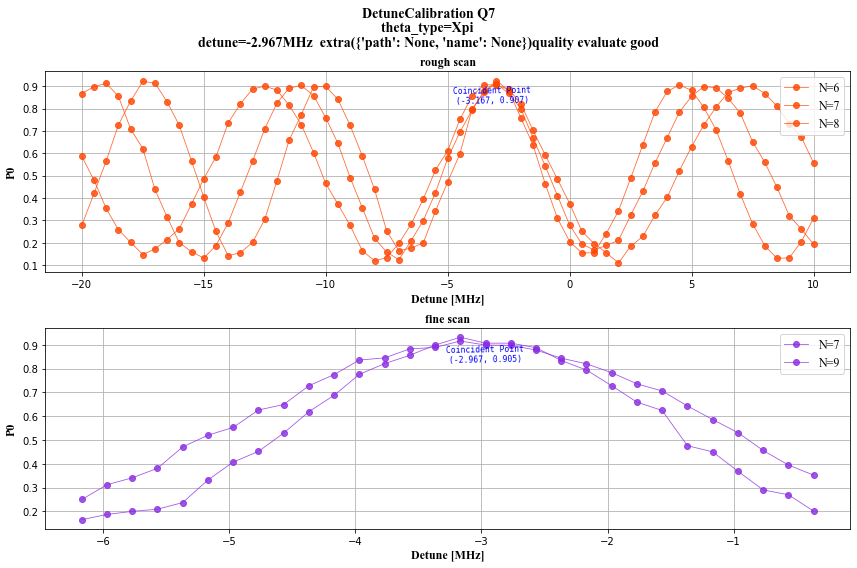

In [115]:
dec.analysis.drawer.figure

In [55]:
detune = 0
# qubit.XYwave.detune_pi = 0
# qubit.XYwave.detune_pi2 = -21.5
qubit.XYwave.detune_pi = detune
qubit.XYwave.detune_pi2 = -10
pyqlog.info(f'Update {qubit} detune_pi {qubit.XYwave.detune_pi}MHz!')
qubit.save_data()

2022-12-21 18:59:48 |   INFO   | Update Qubit(bit=68) detune_pi 0MHz!
2022-12-21 18:59:48 |  UPDATE  | Save q68 to data service success.


In [20]:
context.qubit.XYwave.alpha

0.5

### 更新比特参数信息

In [117]:
detune_pi = dec.analysis.results.detune.value
if 'evaluate good' in dec.analysis.quality:
    qubit.XYwave.detune_pi = detune_pi
    qubit.XYwave.detune_pi2 = detune_pi
    pyqlog.info(f'Update {qubit} detune_pi {qubit.XYwave.detune_pi}MHz!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-26 17:07:01 |   INFO   | Update Qubit(bit=7) detune_pi -2.967MHz!
2023-01-26 17:07:01 |  UPDATE  | Save q7 to data service success.


### 检索比特信息

In [39]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'XYwave', 'sample_width']
    )
)

parameter      value unit update_time
0             probe_freq  7141.9890  MHz        None
1            probe_power   -34.0000   db        None
2             drive_freq  4018.1760  MHz        None
3            drive_power   -10.0000   db        None
4             XYwave.Xpi     0.8600    v        None
5            XYwave.Xpi2     0.4278    v        None
6             XYwave.Ypi        NaN    v        None
7            XYwave.Ypi2        NaN    v        None
8             XYwave.Zpi        NaN    v        None
9   XYwave.baseband_freq   566.6670  MHz        None
10          XYwave.delta  -240.0000    -        None
11      XYwave.detune_pi    -6.8000  GHz        None
12     XYwave.detune_pi2    -6.8000  GHz        None
13          XYwave.alpha     1.0000    -        None
14         XYwave.offset     5.0000   ns        None
15           XYwave.time    20.0000   ns        None
16          sample_width  1000.0000   ns        None

## AmpOptimize

幅值优化实验，改实验通过微调 X 门驱动幅值，精细校准 X 门幅值

### pi pulse 优化

In [49]:
qubit.drive_power

-10

2023-01-26 17:08:00 |   EXP    | theta_type: Xpi, N: 10
2023-01-26 17:08:08 |   EXP    | AmpOptimize register success, id 63d242f89c839aaa76743f57
2023-01-26 17:08:08 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\AmpOptimize\q7\2023-01-26\17.08.00\


<IPython.core.display.Javascript object>


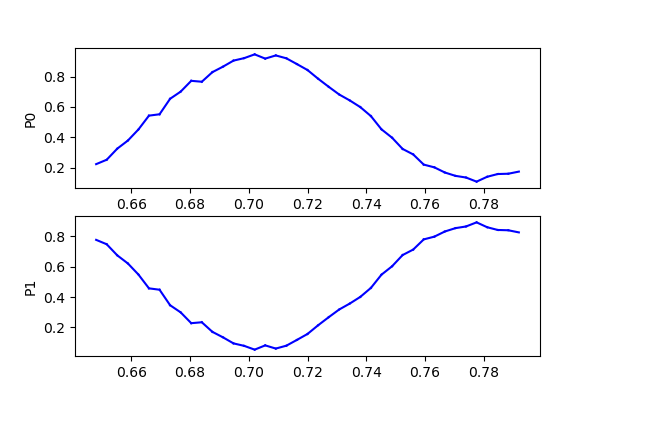

  0%|          | 0/41 [00:00<?, ?it/s]

2023-01-26 17:08:14 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| Xpi  |  X-amp   | 0.7056 |  V   | R²=0.9973(perfect) | 


In [118]:
ao = AmpOptimize.from_experiment_context(context)
ao.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

ao.set_experiment_options(
    ac_prepare_time=8000,
    theta_type="Xpi", N=10,
    points=41,
#     simulator_data_path='../scripts/simulator/data/AmpOptimize/'
)

ao.run()

### 查询脉冲时序图

In [ ]:
ao.jupyter_schedule()

### 查询实验结果

In [159]:
pd.DataFrame(ao.analysis.show_results())

name  value unit extra            quality
0  X-amp   0.82    V    {}  R²=0.9697(normal)

### 查询实验结果图

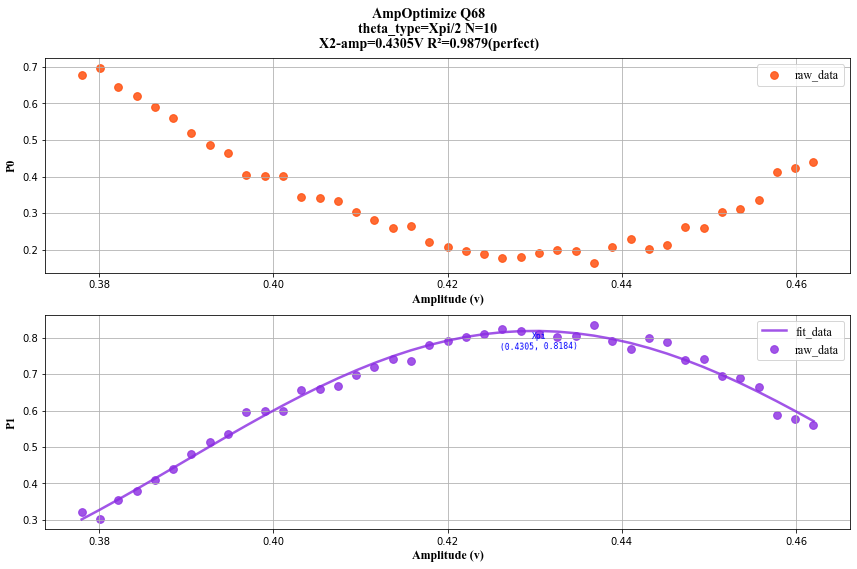

In [45]:
ao.analysis.drawer.figure

### 更新比特参数

In [51]:
res = ao.analysis.results.get("Xpi/2")
res.value

0.4305

In [119]:
ao_quality = ao.analysis.quality.descriptor
Xpi = ao.analysis.results.Xpi.value

if ao_quality in [Quality.perfect, Quality.normal, Quality.bad, Quality.abnormal]:
    qubit.XYwave.Xpi = Xpi
    pyqlog.info(f'Update {qubit} Xpi {qubit.XYwave.Xpi}V!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-26 17:08:30 |   INFO   | Update Qubit(bit=7) Xpi 0.7056V!
2023-01-26 17:08:30 |  UPDATE  | Save q7 to data service success.


### pi/2 pulse 优化

2023-01-26 17:10:31 |   EXP    | theta_type: Xpi/2, N: 12
2023-01-26 17:10:40 |   EXP    | AmpOptimize register success, id 63d243909c839aaa76744121
2023-01-26 17:10:40 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\AmpOptimize\q7\2023-01-26\17.10.31\


<IPython.core.display.Javascript object>


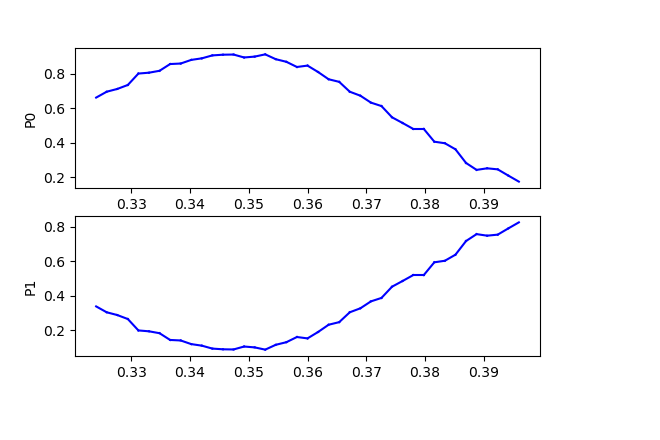

  0%|          | 0/41 [00:00<?, ?it/s]

2023-01-26 17:10:45 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| Xpi2 |  X2-amp  | 0.3474 |  V   | R²=0.9964(perfect) | 


In [122]:
ao = AmpOptimize.from_experiment_context(context)
ao.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

ao.set_experiment_options(
    ac_prepare_time=8000,
    theta_type="Xpi/2", N=12,
    points=41,
#     simulator_data_path='../scripts/simulator/data/AmpOptimize/'
)

ao.run()

### 查询实验结果

In [159]:
pd.DataFrame(ao.analysis.show_results())

name  value unit extra            quality
0  X-amp   0.82    V    {}  R²=0.9697(normal)

### 查询实验结果图

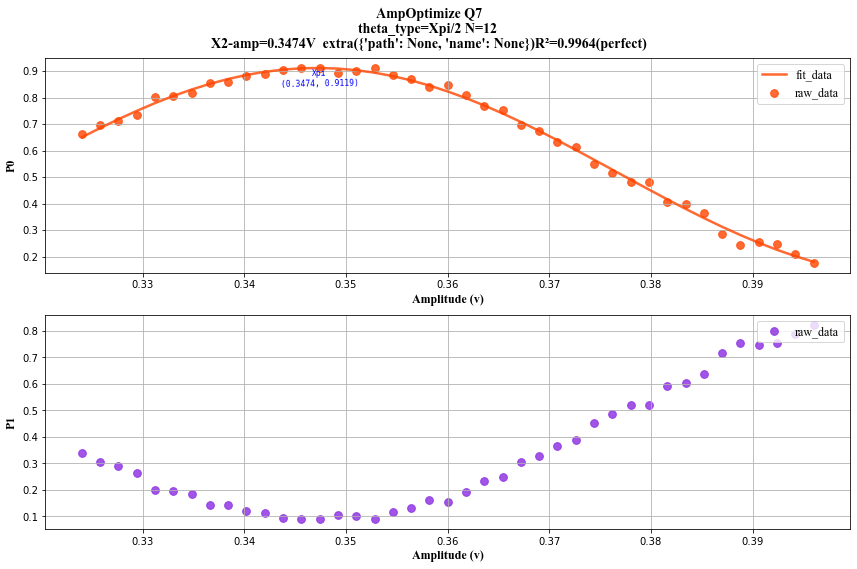

In [123]:
ao.analysis.drawer.figure

### 更新比特参数

In [8]:
ao.analysis.results.Xpi2.value

0.4284

In [124]:
ao_quality = ao.analysis.quality.descriptor
Xpi2 = ao.analysis.results.Xpi2.value

if ao_quality in [Quality.perfect, Quality.normal, Quality.bad, Quality.abnormal]:
    qubit.XYwave.Xpi2 = Xpi2
    pyqlog.info(f'Update {qubit} Xpi {qubit.XYwave.Xpi2}V!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2023-01-26 17:10:59 |   INFO   | Update Qubit(bit=7) Xpi 0.3474V!
2023-01-26 17:10:59 |  UPDATE  | Save q7 to data service success.


### 检索比特参数

In [11]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'sample_width', 'XYwave']
    )
)

parameter      value unit update_time
0             probe_freq  7056.9310  MHz        None
1            probe_power   -32.0000   db        None
2             drive_freq  4756.8600  MHz        None
3            drive_power   -10.0000   db        None
4           sample_width  1000.0000   ns        None
5             XYwave.Xpi     0.8736    v        None
6            XYwave.Xpi2     0.4284    v        None
7             XYwave.Ypi        NaN    v        None
8            XYwave.Ypi2        NaN    v        None
9             XYwave.Zpi        NaN    v        None
10  XYwave.baseband_freq   566.6670  MHz        None
11          XYwave.delta  -240.0000    -        None
12      XYwave.detune_pi   -20.9000  GHz        None
13     XYwave.detune_pi2   -21.5000  GHz        None
14          XYwave.alpha     1.0000    -        None
15         XYwave.offset     5.0000   ns        None
16           XYwave.time    20.0000   ns        None

## T1

测量比特纵向退相干时间 `T1`

2023-01-26 17:14:51 |   EXP    | T1 register success, id 63d2448b9c839aaa7674490e
2023-01-26 17:14:51 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\T1\q7\2023-01-26\17.14.22\


<IPython.core.display.Javascript object>


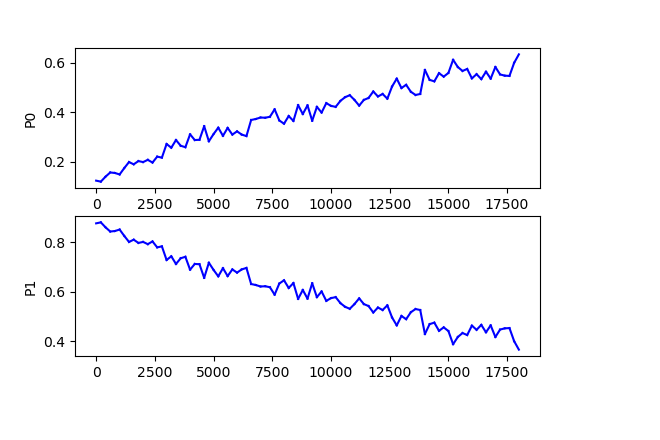

  0%|          | 0/91 [00:00<?, ?it/s]

2023-01-26 17:15:03 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 19.3189 |  us  | R²=0.9688(perfect) | 
| rate |   rate   |  1.073  | None | R²=0.9688(perfect) | 


In [136]:
t1_exp = T1.from_experiment_context(context)
t1_exp.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

t1_exp.set_experiment_options(
    ac_prepare_time=5000,
    delay_list=qarange(0, 18000, 200),
#     z_amp=0.04,
    schedule_index=[0,1,2,3,-3,-2,-1],
#     simulator_data_path='../scripts/simulator/data/T1/'
)

t1_exp.run()

In [114]:
t1_exp.readout_pulses

[AcquireSine(time=1500, amp=[0.5], baseband_freq=[600], attach=False)]

### 查看实验结果

In [8]:
pd.DataFrame(t1_exp.analysis.show_results())

name    value  unit extra             quality
0    T1  17.2086    us    {}  R²=0.9262(perfect)
1  rate   0.8600  None    {}  R²=0.9262(perfect)

### 查看实验脉冲时序图

In [ ]:
t1_exp.jupyter_schedule()

### 查看实验结果图

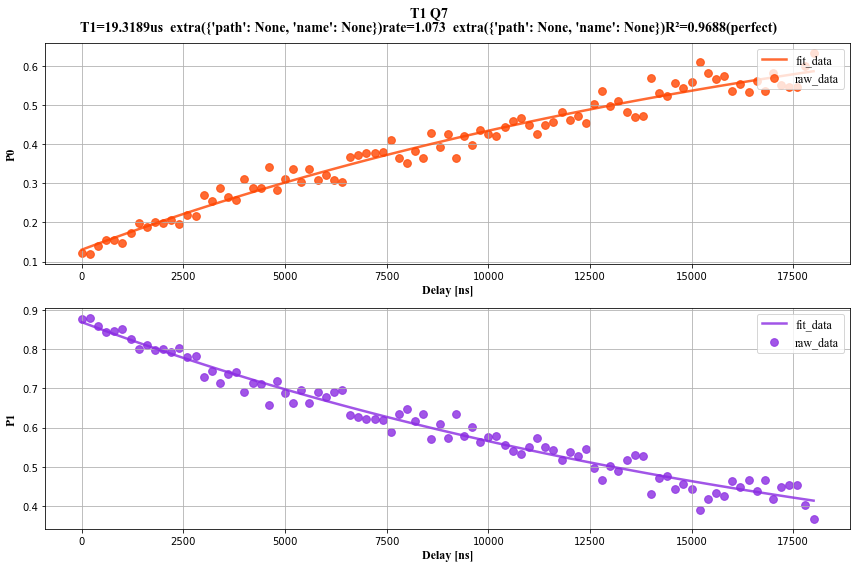

In [137]:
t1_exp.analysis.drawer.figure

### 更新比特参数

In [ ]:
t1_quality = t1_exp.analysis.quality.descriptor
t1 = t1_exp.analysis.results.tau.value * 1e3

if t1_quality == Quality.perfect:
    qubit.T1 = t1
    pyqlog.info(f'Update {qubit} T1 {qubit.T1}ns!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

In [ ]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=['probe_freq', 'probe_power', 'drive_freq', 'drive_power', 'sample_width', 'XYwave', 'T1']
    )
)

## T2

测量比特横向退相干时间 `T2`

In [138]:
ac = freq2amp_formula(qubit.drive_freq-10,*qubit.ac_spectrum.standard)

In [139]:
abs(qubit.dc_max - qubit.dc_min)/abs(-0.026-0.117) * ac

0.13725615602708224

2023-01-27 04:05:51 |   EXP    | rate_down: 0.3, rate_up: 0.5, max_loops: 1
2023-01-27 04:05:51 |   EXP    | T2Ramsey count: 0, z_amp: 0.05 v, fringe: 80 MHz
2023-01-27 04:06:12 |   EXP    | Ramsey register success, id 63d2dd34d7d533cd6f553210
2023-01-27 04:06:12 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\T2Ramsey\q7\2023-01-27\04.05.51\Ramsey\04-05-51-count=0-z_amp=0.05-fringe=80\


<IPython.core.display.Javascript object>


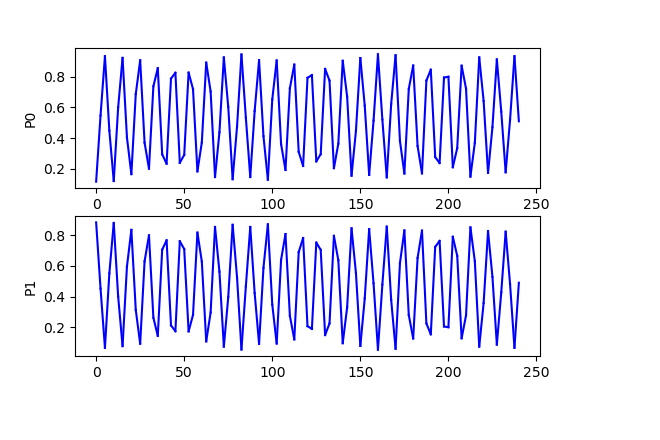

  0%|          | 0/97 [00:00<?, ?it/s]

2023-01-27 04:06:24 |  RESULT  | Experiment results as follow:
|  name   | describe |       value        | unit |      quality       | 
-----------------------------------------------------------------------
|   tau   |  T2star  |   15.40290606029   |  us  | R²=0.9952(perfect) | 
|  freq   |   fosc   | 103.25760000000001 | MHz  | R²=0.9952(perfect) | 
| t2_rate | t2_rate  | 64.17877525120834  | None | R²=0.9952(perfect) | 


In [11]:
t2_exp = T2Ramsey.from_experiment_context(context)
t2_exp.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

t2_exp.set_experiment_options(
    zamp=0.05,
    delays=qarange(0, 240, 2.5),
    fringe=80 ,
    max_loops=1
#     simulator_data_path='../scripts/simulator/data/T2/'
)
t2_exp.child_experiment.set_experiment_options(ac_prepare_time=8000,)

t2_exp.run()

### 查询实验结果

In [ ]:
pd.DataFrame(t2_exp.analysis.show_results())

### 查询实验脉冲时序图

In [ ]:
t2_exp.jupyter_schedule()

### 查询实验结果图

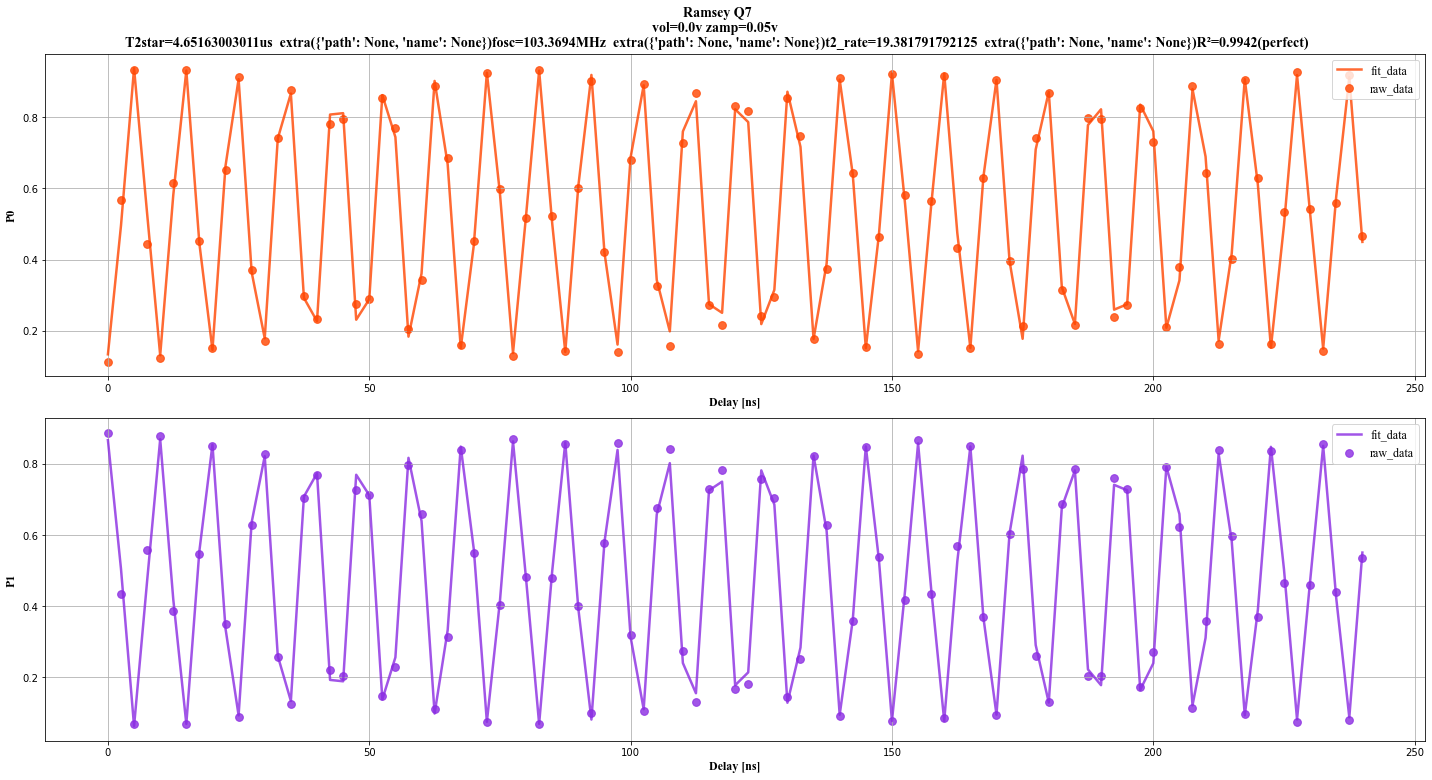

In [10]:
t2_exp.analysis.drawer.figure

### 更新比特参数

In [173]:
t2 = t2_exp.analysis.results.tau.value * 1e3
qubit.T2 = t2
pyqlog.info(f'Update {qubit} T2 {qubit.T2}ns!')
qubit.save_data()

2022-11-21 21:34:22 |   INFO   | Update Qubit(bit=70) T2 8051.14619389ns!
2022-11-21 21:34:22 |  UPDATE  | Save q70 to data service success.


In [176]:
t2_quality = t2_exp.analysis.quality.descriptor
t2 = t2_exp.analysis.results.tau.value * 1e3

if t2_quality == Quality.normal:
    qubit.T2 = t2
    pyqlog.info(f'Update {qubit} T2 {qubit.T2}ns!')
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-11-21 21:35:30 |   INFO   | Update Qubit(bit=70) T2 8051.14619389ns!
2022-11-21 21:35:30 |  UPDATE  | Save q70 to data service success.


### 检索比特参数

In [ ]:
pd.DataFrame(
    context.base_qubit_table(
        context.qubit,
        parameters=[
            'probe_freq', 'probe_power', 'drive_freq', 'drive_power', 
            'sample_width', 'XYwave', 'T1', 'T2']
    )
)

## RB

`Randomized Benchmarking` 来标定单量子比特门保真度

2023-01-27 02:43:24 |   EXP    | RBSingle register success, id 63d2c9cb24b1eca2f18a80d7
2023-01-27 02:43:24 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\RBSingle\q7\2023-01-27\02.39.47\


<IPython.core.display.Javascript object>


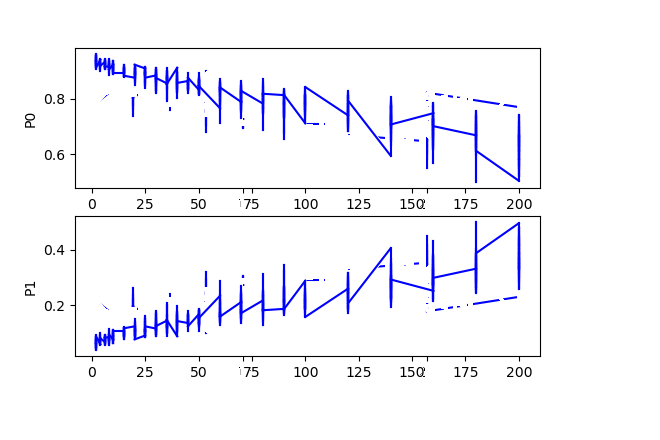

  0%|          | 0/690 [00:00<?, ?it/s]

2023-01-27 02:44:55 |  RESULT  | Experiment results as follow:
|   name   | describe | value  | unit |      quality       | 
------------------------------------------------------------
|    rc    |    rc    | 0.0011 | None | R²=0.9934(perfect) | 
|    rg    |    rg    | 0.0006 | None | R²=0.9934(perfect) | 
| fidelity | fidelity | 0.9994 | None | R²=0.9934(perfect) | 


In [24]:
rb_exp = RBSingle.from_experiment_context(context)
rb_exp.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

rb_exp.set_experiment_options(
    ac_prepare_time=8000,
    depths=np.hstack(
        [
            np.arange(2, 10, 2),
            np.arange(10, 50, 5),
            np.arange(50, 100, 10),
            np.arange(100, 220, 20)
        ]
    ).tolist(),
    times=30,
    gate_split=False,
#     simulator_data_path='../scripts/simulator/data/RB/',
    schedule_index=[0]
)

rb_exp.run()

### 查询脉冲时序图

In [ ]:
rb_exp.jupyter_schedule()

### 查询实验结果

In [ ]:
pd.DataFrame(rb_exp.analysis.show_results())

### 查询实验结果图

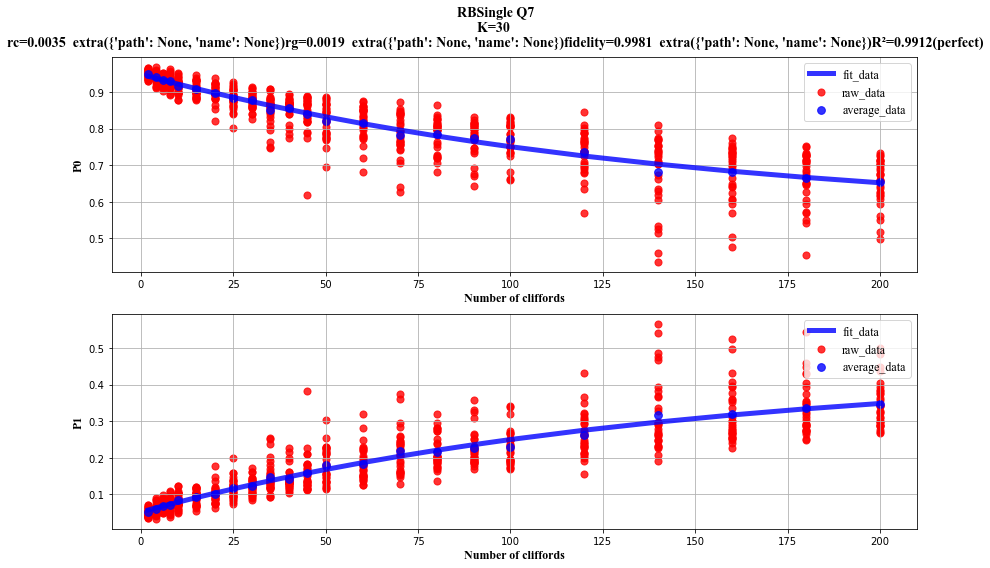

In [148]:
rb_exp.analysis.drawer.figure

## QPT

`Quantum Process Tomography` 来标定单量子比特门保真度

In [ ]:
qpt_exp = ProcessTomography.from_experiment_context(context)

# simulator_data_path = '../scripts/simulator/data/ProcessTomography/SingleQubit/IGate/'

qpt_exp.set_experiment_options(
    goal_gate='I',
    qubit_nums=1,
#     simulator_data_path=simulator_data_path,
    show_result=False
)
qpt_exp.set_analysis_options(use_mle=True)

qpt_exp.run()

### 查询实验结果

In [184]:
pd.DataFrame(qpt_exp.analysis.show_results())

name  \
0    exp_chi_matrix   
1  ideal_chi_matrix   
2          fidelity   
3  process_fidelity   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        value  \
0                                                                                                                             [[(0.9706715540290267+0j), (-0.004903478726626465+0.0013889376238252172j), (0.0038213824260574275+0.02152924865007118j), (0.01150322537775094+0.01029832072806378j)], [(-0.004903478726626465-0.0013889376238252172j), (0.009051535695919558+0j), (0.003639700967113148-0.011479599597458354j), (0.0022044612493094438+0.0038328322790318493j)], [(0.0038213824260574275-0.02152924865007118j), (0.003639700967113148+0.011479599597458354j), (0.01739622151458492+0j), (-0.004133717366386706+0.004872321193665304j)], [(0.01150322537775094-0.01029832072806378j), (0.0022044612493094438-0.0038328322790318493j), (-0.004133717366386706-0.004872321193665304j), (0.003049606626317272+0j)]]   
1  [[(1.0000000000000004+8.896076791452605e-17j), (-3.691512718008711e-16-1.6987262336050975e-16j), (-1.7034584494356492e-16+1.9313783985913177e-16j), (2.683038976177461e-16+2.5110201167889545e-16j)], [(3.5168909705432314e-16+9.364043526578366e-17j), (-1.2601442290656783e-16+2.774675023637665e-17j), (2.868624899295446e-16-6.81859201523387e-16j), (-3.6995586895202886e-16-4.135709452965771e-17j)], [(-1.2805663994388442e-16+3.6277826960460415e-16j), (2.66414084600553e-16-5.39386125564285e-16j), (-1.2601442290656744e-16-4.819515556536797e-17j), (1.8033998068001015e-16-4.698889988642635e-16j)], [(-5.088522196198632e-16-3.1816568570081174e-16j), (1.5820466489607833e-16+1.416984842921471e-16j), (1.9851998401192817e-16-2.7870694560655994e-16j), (1.5728159515523054e-16-2.1897093892609826e-17j)]]   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      98.523   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

### 查询实验结果图

In [ ]:
qpt_exp.analysis.drawer.figure

### 查询子实验结果图

In [ ]:
qpt_exp.component_experiment(index=3).analysis.drawer.figure

In [ ]:
## 查询数据库中最新的比特信息 

pd.DataFrame(context.base_qubit_table(context.get_qubit(qubit.name)))

## ACSpectrum

In [12]:
[1,2,3]+[1,2]

[1, 2, 3, 1, 2]

In [11]:
ACS_exp = ACSpectrum.from_experiment_context(context)
ACS_exp.child_experiment.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

ACS_exp.set_experiment_options(
    z_amps=qarange(0, -0.27, -0.003),
    delays = qarange(80, 240, 2.5),
    init_fringe = 80,
    osc_freq_limit = 40,
    freq_bound = 3600,
#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)
ACS_exp.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
    is_dynamic=False,
    repeat=1000)

ACS_exp.run()

2023-01-27 23:41:33 |   EXP    | z_amp = 0.0v, fringe = -80MHz
2023-01-27 23:41:48 |   EXP    | Ramsey register success, id 63d3f0bcc43dcdc1a9e8d56c
2023-01-27 23:41:48 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-41-33-z_amp=0.0\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:41:56 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.97237 | MHz  | R²=0.9979(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9979(perfect) | 
2023-01-27 23:41:56 |  RESULT  | osc_freq: 79.97237, new f10: 4371.89637
2023-01-27 23:41:56 |   INFO   | z_amp=0.0 qubit freq = 4371.89637MHz
2023-01-27 23:41:56 |   EXP    | z_amp = -0.003v, fringe = -80MHz
2023-01-27 23:42:11 |   EXP    | Ramsey register success, id 63d3f0d3c43dcdc1a9e8d6cf
2023-01-27 23:42:11 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-41-56-z_amp=-0.003\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:42:20 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.96252 | MHz  | R²=0.9977(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9977(perfect) | 
2023-01-27 23:42:20 |  RESULT  | osc_freq: 79.96252, new f10: 4371.88652
2023-01-27 23:42:20 |   INFO   | z_amp=-0.003 qubit freq = 4371.88652MHz
2023-01-27 23:42:20 |   EXP    | z_amp = -0.006v, fringe = -80MHz
2023-01-27 23:42:34 |   EXP    | Ramsey register success, id 63d3f0eac43dcdc1a9e8d832
2023-01-27 23:42:34 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-42-20-z_amp=-0.006\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:42:43 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.77825 | MHz  | R²=0.9978(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9978(perfect) | 
2023-01-27 23:42:43 |  RESULT  | osc_freq: 79.77825, new f10: 4371.70225
2023-01-27 23:42:43 |   INFO   | z_amp=-0.006 qubit freq = 4371.70225MHz
2023-01-27 23:42:43 |   EXP    | z_amp = -0.009v, fringe = -80.58043999999882MHz
2023-01-27 23:42:58 |   EXP    | Ramsey register success, id 63d3f102c43dcdc1a9e8d995
2023-01-27 23:42:58 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-42-43-z_amp=-0.009\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:43:06 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |      quality       | 
---------------------------------------------------------------
|   freq    |   fosc    | 79.9131 | MHz  | R²=0.9958(perfect) | 
| stft_flag | stft_flag |  True   | None | R²=0.9958(perfect) | 
2023-01-27 23:43:06 |  RESULT  | osc_freq: 79.9131, new f10: 4371.256660000001
2023-01-27 23:43:06 |   INFO   | z_amp=-0.009 qubit freq = 4371.256660000001MHz
2023-01-27 23:43:06 |   EXP    | z_amp = -0.012v, fringe = -81.37424999999803MHz
2023-01-27 23:43:21 |   EXP    | Ramsey register success, id 63d3f119c43dcdc1a9e8daf8
2023-01-27 23:43:21 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-43-06-z_amp=-0.012\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:43:29 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |      quality       | 
---------------------------------------------------------------
|   freq    |   fosc    | 80.6192 | MHz  | R²=0.9981(perfect) | 
| stft_flag | stft_flag |  True   | None | R²=0.9981(perfect) | 
2023-01-27 23:43:29 |  RESULT  | osc_freq: 80.6192, new f10: 4371.168950000002
2023-01-27 23:43:29 |   INFO   | z_amp=-0.012 qubit freq = 4371.168950000002MHz
2023-01-27 23:43:29 |   EXP    | z_amp = -0.015v, fringe = -80.48487999999634MHz
2023-01-27 23:43:44 |   EXP    | Ramsey register success, id 63d3f130c43dcdc1a9e8dc5b
2023-01-27 23:43:44 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-43-29-z_amp=-0.015\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:43:52 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 78.60103 | MHz  | R²=0.9972(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9972(perfect) | 
2023-01-27 23:43:52 |  RESULT  | osc_freq: 78.60103, new f10: 4370.040150000003
2023-01-27 23:43:52 |   INFO   | z_amp=-0.015 qubit freq = 4370.040150000003MHz
2023-01-27 23:43:52 |   EXP    | z_amp = -0.018v, fringe = -84.05373999999483MHz
2023-01-27 23:44:07 |   EXP    | Ramsey register success, id 63d3f147c43dcdc1a9e8ddbe
2023-01-27 23:44:07 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-43-52-z_amp=-0.018\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:44:15 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 81.74821 | MHz  | R²=0.9977(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9977(perfect) | 
2023-01-27 23:44:15 |  RESULT  | osc_freq: 81.74821, new f10: 4369.618470000005
2023-01-27 23:44:15 |   INFO   | z_amp=-0.018 qubit freq = 4369.618470000005MHz
2023-01-27 23:44:15 |   EXP    | z_amp = -0.021v, fringe = -82.02008999999362MHz
2023-01-27 23:44:30 |   EXP    | Ramsey register success, id 63d3f15ec43dcdc1a9e8df21
2023-01-27 23:44:30 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-44-15-z_amp=-0.021\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:44:39 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 78.37286 | MHz  | R²=0.9945(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9945(perfect) | 
2023-01-27 23:44:39 |  RESULT  | osc_freq: 78.37286, new f10: 4368.276770000007
2023-01-27 23:44:39 |   INFO   | z_amp=-0.021 qubit freq = 4368.276770000007MHz
2023-01-27 23:44:39 |   EXP    | z_amp = -0.024v, fringe = -85.90894999999091MHz
2023-01-27 23:44:53 |   EXP    | Ramsey register success, id 63d3f175c43dcdc1a9e8e084
2023-01-27 23:44:53 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-44-39-z_amp=-0.024\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:45:02 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality      | 
---------------------------------------------------------------
|   freq    |   fosc    | 81.16719 | MHz  | R²=0.998(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.998(perfect) | 
2023-01-27 23:45:02 |  RESULT  | osc_freq: 81.16719, new f10: 4367.182240000009
2023-01-27 23:45:02 |   INFO   | z_amp=-0.024 qubit freq = 4367.182240000009MHz
2023-01-27 23:45:02 |   EXP    | z_amp = -0.027v, fringe = -85.58911999998782MHz
2023-01-27 23:45:16 |   EXP    | Ramsey register success, id 63d3f18cc43dcdc1a9e8e1e7
2023-01-27 23:45:16 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-45-02-z_amp=-0.027\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:45:25 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality      | 
---------------------------------------------------------------
|   freq    |   fosc    | 79.44533 | MHz  | R²=0.9595(normal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9595(normal) | 
2023-01-27 23:45:25 |  RESULT  | osc_freq: 79.44533, new f10: 4365.780210000012
2023-01-27 23:45:25 |   INFO   | z_amp=-0.027 qubit freq = 4365.780210000012MHz
2023-01-27 23:45:25 |   EXP    | z_amp = -0.03v, fringe = -87.85331999998562MHz
2023-01-27 23:45:40 |   EXP    | Ramsey register success, id 63d3f1a3c43dcdc1a9e8e34a
2023-01-27 23:45:40 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-45-25-z_amp=-0.03\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:45:48 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 80.37983 | MHz  | R²=0.9952(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9952(perfect) | 
2023-01-27 23:45:48 |  RESULT  | osc_freq: 80.37983, new f10: 4364.450510000014
2023-01-27 23:45:48 |   INFO   | z_amp=-0.03 qubit freq = 4364.450510000014MHz
2023-01-27 23:45:48 |   EXP    | z_amp = -0.033v, fringe = -88.7308599999833MHz
2023-01-27 23:46:03 |   EXP    | Ramsey register success, id 63d3f1bbc43dcdc1a9e8e4ad
2023-01-27 23:46:03 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-45-48-z_amp=-0.033\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:46:11 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 80.04772 | MHz  | R²=0.9958(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9958(perfect) | 
2023-01-27 23:46:11 |  RESULT  | osc_freq: 80.04772, new f10: 4363.240860000016
2023-01-27 23:46:11 |   INFO   | z_amp=-0.033 qubit freq = 4363.240860000016MHz
2023-01-27 23:46:11 |   EXP    | z_amp = -0.036v, fringe = -89.77273999998215MHz
2023-01-27 23:46:26 |   EXP    | Ramsey register success, id 63d3f1d2c43dcdc1a9e8e610
2023-01-27 23:46:26 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-46-11-z_amp=-0.036\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:46:35 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.07095 | MHz  | R²=0.9966(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9966(perfect) | 
2023-01-27 23:46:35 |  RESULT  | osc_freq: 79.07095, new f10: 4361.222210000018
2023-01-27 23:46:35 |   INFO   | z_amp=-0.036 qubit freq = 4361.222210000018MHz
2023-01-27 23:46:35 |   EXP    | z_amp = -0.039v, fringe = -93.52943999997933MHz
2023-01-27 23:46:49 |   EXP    | Ramsey register success, id 63d3f1e9c43dcdc1a9e8e773
2023-01-27 23:46:49 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-46-35-z_amp=-0.039\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:46:58 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 80.78336 | MHz  | R²=0.9902(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9902(perfect) | 
2023-01-27 23:46:58 |  RESULT  | osc_freq: 80.78336, new f10: 4359.177920000021
2023-01-27 23:46:58 |   INFO   | z_amp=-0.039 qubit freq = 4359.177920000021MHz
2023-01-27 23:46:58 |   EXP    | z_amp = -0.042v, fringe = -94.816009999975MHz
2023-01-27 23:47:13 |   EXP    | Ramsey register success, id 63d3f200c43dcdc1a9e8e8d6
2023-01-27 23:47:13 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-46-58-z_amp=-0.042\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:47:21 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.99011 | MHz  | R²=0.9948(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9948(perfect) | 
2023-01-27 23:47:21 |  RESULT  | osc_freq: 79.99011, new f10: 4357.098100000025
2023-01-27 23:47:21 |   INFO   | z_amp=-0.042 qubit freq = 4357.098100000025MHz
2023-01-27 23:47:21 |   EXP    | z_amp = -0.045v, fringe = -96.94124999997075MHz
2023-01-27 23:47:36 |   EXP    | Ramsey register success, id 63d3f218c43dcdc1a9e8ea39
2023-01-27 23:47:36 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-47-21-z_amp=-0.045\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:47:44 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality      | 
---------------------------------------------------------------
|   freq    |   fosc    | 79.59336 | MHz  | R²=0.982(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.982(perfect) | 
2023-01-27 23:47:44 |  RESULT  | osc_freq: 79.59336, new f10: 4354.576110000029
2023-01-27 23:47:44 |   INFO   | z_amp=-0.045 qubit freq = 4354.576110000029MHz
2023-01-27 23:47:44 |   EXP    | z_amp = -0.048v, fringe = -100.3120499999659MHz
2023-01-27 23:47:59 |   EXP    | Ramsey register success, id 63d3f22fc43dcdc1a9e8eb9c
2023-01-27 23:47:59 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-47-44-z_amp=-0.048\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:48:07 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 80.85115 | MHz  | R²=0.9969(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9969(perfect) | 
2023-01-27 23:48:07 |  RESULT  | osc_freq: 80.85115, new f10: 4352.4631000000345
2023-01-27 23:48:07 |   INFO   | z_amp=-0.048 qubit freq = 4352.4631000000345MHz
2023-01-27 23:48:07 |   EXP    | z_amp = -0.051v, fringe = -101.16492999995899MHz
2023-01-27 23:48:22 |   EXP    | Ramsey register success, id 63d3f246c43dcdc1a9e8ecff
2023-01-27 23:48:22 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-48-07-z_amp=-0.051\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:48:31 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 79.81586 | MHz  | R²=0.9916(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9916(perfect) | 
2023-01-27 23:48:31 |  RESULT  | osc_freq: 79.81586, new f10: 4350.574930000041
2023-01-27 23:48:31 |   INFO   | z_amp=-0.051 qubit freq = 4350.574930000041MHz
2023-01-27 23:48:31 |   EXP    | z_amp = -0.054v, fringe = -103.01239999995232MHz
2023-01-27 23:48:45 |   EXP    | Ramsey register success, id 63d3f25dc43dcdc1a9e8ee62
2023-01-27 23:48:45 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-48-31-z_amp=-0.054\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:48:54 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 78.07784 | MHz  | R²=0.9876(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9876(perfect) | 
2023-01-27 23:48:54 |  RESULT  | osc_freq: 78.07784, new f10: 4346.989440000048
2023-01-27 23:48:54 |   INFO   | z_amp=-0.054 qubit freq = 4346.989440000048MHz
2023-01-27 23:48:54 |   EXP    | z_amp = -0.057v, fringe = -110.21736999994482MHz
2023-01-27 23:49:09 |   EXP    | Ramsey register success, id 63d3f275c43dcdc1a9e8efc5
2023-01-27 23:49:09 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-48-54-z_amp=-0.057\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:49:17 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |      quality       | 
---------------------------------------------------------------
|   freq    |   fosc    | 81.4789 | MHz  | R²=0.9835(perfect) | 
| stft_flag | stft_flag |  True   | None | R²=0.9835(perfect) | 
2023-01-27 23:49:17 |  RESULT  | osc_freq: 81.4789, new f10: 4343.185530000055
2023-01-27 23:49:17 |   INFO   | z_amp=-0.057 qubit freq = 4343.185530000055MHz
2023-01-27 23:49:17 |   EXP    | z_amp = -0.06v, fringe = -112.76079999993635MHz
2023-01-27 23:49:32 |   EXP    | Ramsey register success, id 63d3f28cc43dcdc1a9e8f128
2023-01-27 23:49:32 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-49-17-z_amp=-0.06\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:49:41 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality      | 
---------------------------------------------------------------
|   freq    |   fosc    | 80.77751 | MHz  | R²=0.9784(normal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9784(normal) | 
2023-01-27 23:49:41 |  RESULT  | osc_freq: 80.77751, new f10: 4339.9407100000635
2023-01-27 23:49:41 |   INFO   | z_amp=-0.06 qubit freq = 4339.9407100000635MHz
2023-01-27 23:49:41 |   EXP    | z_amp = -0.063v, fringe = -114.66901999992751MHz
2023-01-27 23:49:56 |   EXP    | Ramsey register success, id 63d3f2a4c43dcdc1a9e8f28b
2023-01-27 23:49:56 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-49-41-z_amp=-0.063\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:50:04 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |     quality      | 
--------------------------------------------------------------
|   freq    |   fosc    | 80.77414 | MHz  | R²=0.976(normal) | 
| stft_flag | stft_flag |   True   | None | R²=0.976(normal) | 
2023-01-27 23:50:04 |  RESULT  | osc_freq: 80.77414, new f10: 4338.029120000073
2023-01-27 23:50:04 |   INFO   | z_amp=-0.063 qubit freq = 4338.029120000073MHz
2023-01-27 23:50:04 |   EXP    | z_amp = -0.066v, fringe = -114.47323999991659MHz
2023-01-27 23:50:19 |   EXP    | Ramsey register success, id 63d3f2bbc43dcdc1a9e8f3ee
2023-01-27 23:50:19 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-50-04-z_amp=-0.066\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:50:27 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 77.85741 | MHz  | R²=0.9952(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9952(perfect) | 
2023-01-27 23:50:27 |  RESULT  | osc_freq: 77.85741, new f10: 4335.308170000083
2023-01-27 23:50:27 |   INFO   | z_amp=-0.066 qubit freq = 4335.308170000083MHz
2023-01-27 23:50:27 |   EXP    | z_amp = -0.069v, fringe = -120.14613999990524MHz
2023-01-27 23:50:42 |   EXP    | Ramsey register success, id 63d3f2d2c43dcdc1a9e8f551
2023-01-27 23:50:42 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-50-27-z_amp=-0.069\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:50:51 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |       quality       | 
-----------------------------------------------------------------
|   freq    |   fosc    | 80.06666 | MHz  | R²=0.9205(abnormal) | 
| stft_flag | stft_flag |   True   | None | R²=0.9205(abnormal) | 
2023-01-27 23:50:51 |  RESULT  | osc_freq: 80.06666, new f10: 4331.844520000095
2023-01-27 23:50:51 |   INFO   | z_amp=-0.069 qubit freq = 4331.844520000095MHz
2023-01-27 23:50:51 |   EXP    | z_amp = -0.072v, fringe = -124.28582999989067MHz
2023-01-27 23:51:05 |   EXP    | Ramsey register success, id 63d3f2e9c43dcdc1a9e8f6b4
2023-01-27 23:51:05 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-50-51-z_amp=-0.072\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:51:14 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value  | unit |      quality      | 
--------------------------------------------------------------
|   freq    |   fosc    | 80.2337 | MHz  | R²=0.984(perfect) | 
| stft_flag | stft_flag |  True   | None | R²=0.984(perfect) | 
2023-01-27 23:51:14 |  RESULT  | osc_freq: 80.2337, new f10: 4327.871870000109
2023-01-27 23:51:14 |   INFO   | z_amp=-0.072 qubit freq = 4327.871870000109MHz
2023-01-27 23:51:14 |   EXP    | z_amp = -0.075v, fringe = -128.53377999987515MHz
2023-01-27 23:51:29 |   EXP    | Ramsey register success, id 63d3f301c43dcdc1a9e8f817
2023-01-27 23:51:29 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-51-14-z_amp=-0.075\


  0%|          | 0/65 [00:00<?, ?it/s]

2023-01-27 23:51:37 |  RESULT  | Experiment results as follow:
|   name    | describe  |  value   | unit |      quality       | 
----------------------------------------------------------------
|   freq    |   fosc    | 80.06294 | MHz  | R²=0.9874(perfect) | 
| stft_flag | stft_flag |   True   | None | R²=0.9874(perfect) | 
2023-01-27 23:51:37 |  RESULT  | osc_freq: 80.06294, new f10: 4323.453160000125
2023-01-27 23:51:37 |   INFO   | z_amp=-0.075 qubit freq = 4323.453160000125MHz
2023-01-27 23:51:37 |   EXP    | z_amp = -0.078v, fringe = -133.3356099998582MHz
2023-01-27 23:51:52 |   EXP    | Ramsey register success, id 63d3f318c43dcdc1a9e8f97a
2023-01-27 23:51:52 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\ACSpectrum\q7\2023-01-27\23.41.33\Ramsey\23-51-37-z_amp=-0.078\


  0%|          | 0/65 [00:00<?, ?it/s]


KeyboardInterrupt



### 查询实验结果

In [184]:
pd.DataFrame(ACS_exp.analysis.show_results())

name         value  unit  \
0  fq_max  5.614058e+03  None   
1  detune  3.350454e+06  None   
2       M  8.837059e-01  None   
3  offset  5.668514e-01  None   
4       d -9.992597e-01  None   

                                                         extra  \
0  {'path': 'Qubit.ac_spectrum.standard.fq_max', 'name': None}   
1  {'path': 'Qubit.ac_spectrum.standard.detune', 'name': None}   
2       {'path': 'Qubit.ac_spectrum.standard.M', 'name': None}   
3  {'path': 'Qubit.ac_spectrum.standard.offset', 'name': None}   
4       {'path': 'Qubit.ac_spectrum.standard.d', 'name': None}   

              quality  
0  R²=0.9996(perfect)  
1  R²=0.9996(perfect)  
2  R²=0.9996(perfect)  
3  R²=0.9996(perfect)  
4  R²=0.9996(perfect)

In [46]:
ACS_exp.analysis.show_results()['value']

[4795.9724735, -2017.53942185, 4.56593141, -0.00062481, 0.18062012]

### 查询实验结果图

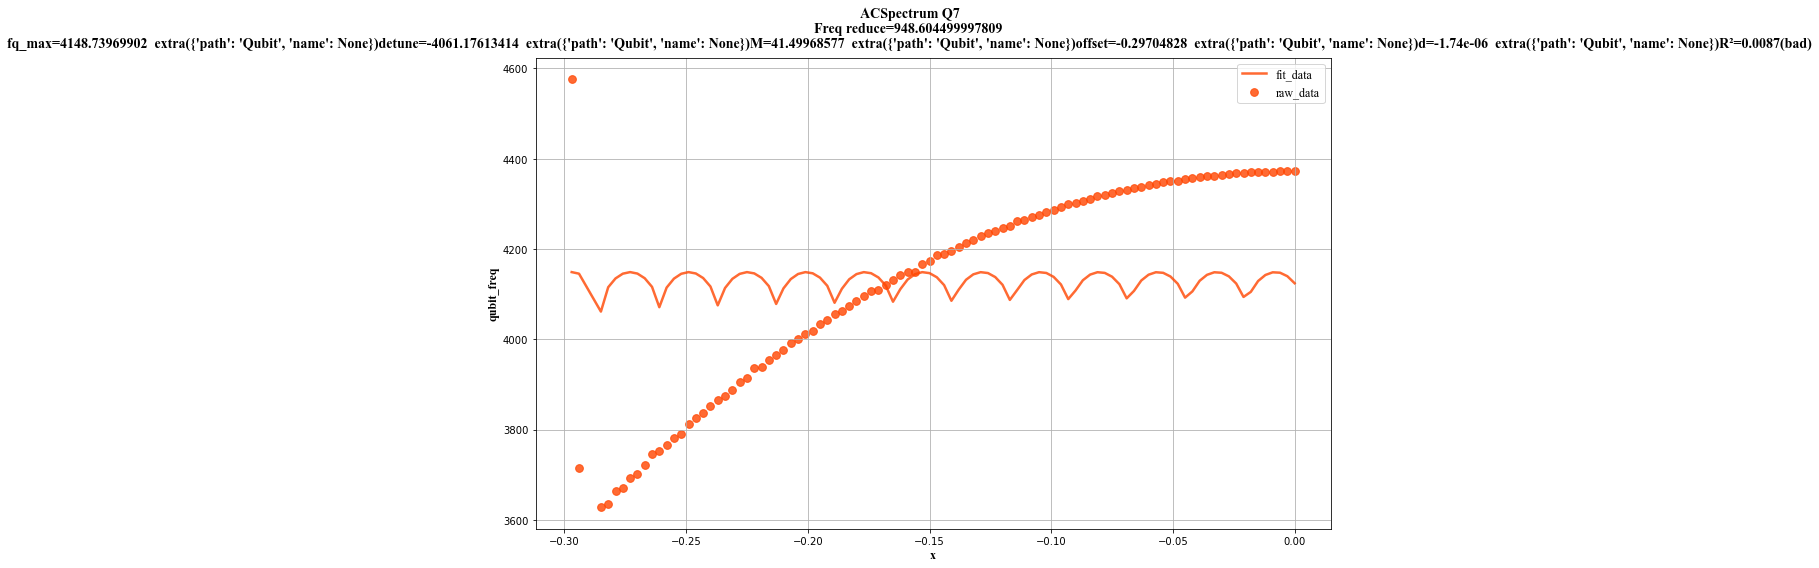

In [10]:
ACS_exp.analysis.drawer.figure

### 更新AC谱参数

In [12]:
from pyQCat.invoker import DataCenter
ACS_paras = ACS_exp.analysis.show_results()['value']
ACS_exp_quality = ACS_exp.analysis.quality.descriptor

if ACS_exp_quality == Quality.perfect:
    db = DataCenter()
    filename = 'character.json'
    data = db.query_config(filename)['data'][0]['json']
    data[q_name]['frequency_zamp_fitting'] = ACS_paras  # z_delay
    db.update_single_config(filename, data)
    
    qubit.ac_spectrum.standard = ACS_paras
    qubit.save_data()
else:
    pyqlog.info(f'Experiment results bad, please check!')

2022-12-16 21:54:32 |  UPDATE  | Save q72 to data service success.


In [37]:
freq2amp_formula(qubit.drive_freq-,*qubit.ac_spectrum.standard)

0.00034572617594289575

## T1Spectrum

In [14]:
T1S_exp = T1Spectrum.from_experiment_context(context)
T1S_exp.set_experiment_options(
    z_amp_list = qarange(-0.08, 0.08, 0.002),
    ac_spectrum_paras = qubit.ac_spectrum.standard,
    delay_list = qarange(0, 20000, 400),

#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)
T1S_exp.child_experiment.set_experiment_options(
    ac_prepare_time=8000,
    is_dynamic=False,)

T1S_exp.run()

2022-12-15 19:28:39 |   EXP    | T1 experiment z_amp: -0.08
2022-12-15 19:28:52 |   EXP    | T1 register success, id 639b04f451e91116bc701b84
2022-12-15 19:28:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-28-39-z_amp=-0.08\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:29:32 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 7.7495 |  us  | R²=0.9823(perfect) | 
| rate |   rate   | 0.387  | None | R²=0.9823(perfect) | 
2022-12-15 19:29:32 |   EXP    | T1 experiment z_amp: -0.078
2022-12-15 19:29:46 |   EXP    | T1 register success, id 639b052951e91116bc701c44
2022-12-15 19:29:46 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-29-32-z_amp=-0.078\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:30:25 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 12.7063 |  us  | R²=0.9789(perfect) | 
| rate |   rate   |  0.635  | None | R²=0.9789(perfect) | 
2022-12-15 19:30:25 |   EXP    | T1 experiment z_amp: -0.076
2022-12-15 19:30:39 |   EXP    | T1 register success, id 639b055f51e91116bc701d04
2022-12-15 19:30:39 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-30-25-z_amp=-0.076\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:31:19 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.4648 |  us  | R²=0.9668(perfect) | 
| rate |   rate   | 0.473  | None | R²=0.9668(perfect) | 
2022-12-15 19:31:19 |   EXP    | T1 experiment z_amp: -0.074
2022-12-15 19:31:32 |   EXP    | T1 register success, id 639b059451e91116bc701dc4
2022-12-15 19:31:32 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-31-19-z_amp=-0.074\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:32:12 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.7309 |  us  | R²=0.9852(perfect) | 
| rate |   rate   | 0.487  | None | R²=0.9852(perfect) | 
2022-12-15 19:32:12 |   EXP    | T1 experiment z_amp: -0.072
2022-12-15 19:32:25 |   EXP    | T1 register success, id 639b05c951e91116bc701e84
2022-12-15 19:32:25 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-32-12-z_amp=-0.072\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:33:05 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |       quality       | 
---------------------------------------------------------
| tau  |    T1    | 7.2619 |  us  | R²=0.8398(abnormal) | 
| rate |   rate   | 0.363  | None | R²=0.8398(abnormal) | 
2022-12-15 19:33:05 |   EXP    | T1 experiment z_amp: -0.07
2022-12-15 19:33:18 |   EXP    | T1 register success, id 639b05fe51e91116bc701f44
2022-12-15 19:33:18 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-33-05-z_amp=-0.07\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:33:58 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.7899 |  us  | R²=0.9618(perfect) | 
| rate |   rate   | 0.489  | None | R²=0.9618(perfect) | 
2022-12-15 19:33:58 |   EXP    | T1 experiment z_amp: -0.068
2022-12-15 19:34:11 |   EXP    | T1 register success, id 639b063351e91116bc702004
2022-12-15 19:34:11 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-33-58-z_amp=-0.068\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:34:51 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 3.6079 |  us  | R²=0.9053(perfect) | 
| rate |   rate   |  0.18  | None | R²=0.9053(perfect) | 
2022-12-15 19:34:51 |   EXP    | T1 experiment z_amp: -0.066
2022-12-15 19:35:05 |   EXP    | T1 register success, id 639b066851e91116bc7020c4
2022-12-15 19:35:05 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-34-51-z_amp=-0.066\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:35:44 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 1.5337 |  us  | R²=0.8616(normal) | 
| rate |   rate   | 0.077  | None | R²=0.8616(normal) | 
2022-12-15 19:35:44 |   EXP    | T1 experiment z_amp: -0.064
2022-12-15 19:35:58 |   EXP    | T1 register success, id 639b069e51e91116bc702184
2022-12-15 19:35:58 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-35-44-z_amp=-0.064\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:36:37 |  RESULT  | Experiment results as follow:
| name | describe |   value   | unit |    quality     | 
-------------------------------------------------------
| tau  |    T1    | -3838.663 |  us  | R²=0.0279(bad) | 
| rate |   rate   | -191.933  | None | R²=0.0279(bad) | 
2022-12-15 19:36:37 |   EXP    | T1 experiment z_amp: -0.062
2022-12-15 19:36:51 |   EXP    | T1 register success, id 639b06d351e91116bc702244
2022-12-15 19:36:51 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-36-37-z_amp=-0.062\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:37:31 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 4.7461 |  us  | R²=0.8993(normal) | 
| rate |   rate   | 0.237  | None | R²=0.8993(normal) | 
2022-12-15 19:37:31 |   EXP    | T1 experiment z_amp: -0.06
2022-12-15 19:37:45 |   EXP    | T1 register success, id 639b070951e91116bc702304
2022-12-15 19:37:45 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-37-31-z_amp=-0.06\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:38:25 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 7.9086 |  us  | R²=0.9445(perfect) | 
| rate |   rate   | 0.395  | None | R²=0.9445(perfect) | 
2022-12-15 19:38:25 |   EXP    | T1 experiment z_amp: -0.058
2022-12-15 19:38:38 |   EXP    | T1 register success, id 639b073e51e91116bc7023c4
2022-12-15 19:38:38 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-38-25-z_amp=-0.058\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:39:18 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 3.1176 |  us  | R²=0.918(perfect) | 
| rate |   rate   | 0.156  | None | R²=0.918(perfect) | 
2022-12-15 19:39:18 |   EXP    | T1 experiment z_amp: -0.056
2022-12-15 19:39:31 |   EXP    | T1 register success, id 639b077351e91116bc702484
2022-12-15 19:39:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-39-18-z_amp=-0.056\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:40:11 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 4.0965 |  us  | R²=0.9508(perfect) | 
| rate |   rate   | 0.205  | None | R²=0.9508(perfect) | 
2022-12-15 19:40:11 |   EXP    | T1 experiment z_amp: -0.054
2022-12-15 19:40:25 |   EXP    | T1 register success, id 639b07a951e91116bc702544
2022-12-15 19:40:25 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-40-11-z_amp=-0.054\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:41:04 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 0.1843 |  us  | R²=0.9945(perfect) | 
| rate |   rate   | 0.009  | None | R²=0.9945(perfect) | 
2022-12-15 19:41:04 |   EXP    | T1 experiment z_amp: -0.052
2022-12-15 19:41:18 |   EXP    | T1 register success, id 639b07de51e91116bc702604
2022-12-15 19:41:18 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-41-04-z_amp=-0.052\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:41:57 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 0.3946 |  us  | R²=0.9874(perfect) | 
| rate |   rate   |  0.02  | None | R²=0.9874(perfect) | 
2022-12-15 19:41:57 |   EXP    | T1 experiment z_amp: -0.05
2022-12-15 19:42:10 |   EXP    | T1 register success, id 639b081251e91116bc7026c4
2022-12-15 19:42:10 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-41-57-z_amp=-0.05\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:42:50 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 5.3995 |  us  | R²=0.9826(perfect) | 
| rate |   rate   |  0.27  | None | R²=0.9826(perfect) | 
2022-12-15 19:42:50 |   EXP    | T1 experiment z_amp: -0.048
2022-12-15 19:43:03 |   EXP    | T1 register success, id 639b084751e91116bc702784
2022-12-15 19:43:03 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-42-50-z_amp=-0.048\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:43:43 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality       | 
-------------------------------------------------------
| tau  |    T1    | 8.876 |  us  | R²=0.9876(perfect) | 
| rate |   rate   | 0.444 | None | R²=0.9876(perfect) | 
2022-12-15 19:43:43 |   EXP    | T1 experiment z_amp: -0.046
2022-12-15 19:43:56 |   EXP    | T1 register success, id 639b087c51e91116bc702844
2022-12-15 19:43:56 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-43-43-z_amp=-0.046\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:44:36 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 8.7754 |  us  | R²=0.9903(perfect) | 
| rate |   rate   | 0.439  | None | R²=0.9903(perfect) | 
2022-12-15 19:44:36 |   EXP    | T1 experiment z_amp: -0.044
2022-12-15 19:44:49 |   EXP    | T1 register success, id 639b08b151e91116bc702904
2022-12-15 19:44:49 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-44-36-z_amp=-0.044\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:45:30 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 8.0316 |  us  | R²=0.9762(perfect) | 
| rate |   rate   | 0.402  | None | R²=0.9762(perfect) | 
2022-12-15 19:45:30 |   EXP    | T1 experiment z_amp: -0.042
2022-12-15 19:45:44 |   EXP    | T1 register success, id 639b08e751e91116bc7029c4
2022-12-15 19:45:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-45-30-z_amp=-0.042\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:46:23 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 6.9821 |  us  | R²=0.9852(perfect) | 
| rate |   rate   | 0.349  | None | R²=0.9852(perfect) | 
2022-12-15 19:46:23 |   EXP    | T1 experiment z_amp: -0.04
2022-12-15 19:46:37 |   EXP    | T1 register success, id 639b091d51e91116bc702a84
2022-12-15 19:46:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-46-23-z_amp=-0.04\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:47:17 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 6.4098 |  us  | R²=0.968(perfect) | 
| rate |   rate   |  0.32  | None | R²=0.968(perfect) | 
2022-12-15 19:47:17 |   EXP    | T1 experiment z_amp: -0.038
2022-12-15 19:47:30 |   EXP    | T1 register success, id 639b095251e91116bc702b44
2022-12-15 19:47:30 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-47-17-z_amp=-0.038\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:48:10 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 8.1887 |  us  | R²=0.8903(normal) | 
| rate |   rate   | 0.409  | None | R²=0.8903(normal) | 
2022-12-15 19:48:10 |   EXP    | T1 experiment z_amp: -0.036
2022-12-15 19:48:23 |   EXP    | T1 register success, id 639b098751e91116bc702c04
2022-12-15 19:48:23 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-48-10-z_amp=-0.036\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:49:03 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality       | 
-------------------------------------------------------
| tau  |    T1    | 9.402 |  us  | R²=0.9613(perfect) | 
| rate |   rate   | 0.47  | None | R²=0.9613(perfect) | 
2022-12-15 19:49:03 |   EXP    | T1 experiment z_amp: -0.034
2022-12-15 19:49:16 |   EXP    | T1 register success, id 639b09bc51e91116bc702cc4
2022-12-15 19:49:16 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-49-03-z_amp=-0.034\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:49:56 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality      | 
------------------------------------------------------
| tau  |    T1    | 6.078 |  us  | R²=0.971(perfect) | 
| rate |   rate   | 0.304 | None | R²=0.971(perfect) | 
2022-12-15 19:49:56 |   EXP    | T1 experiment z_amp: -0.032
2022-12-15 19:50:09 |   EXP    | T1 register success, id 639b09f151e91116bc702d84
2022-12-15 19:50:09 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-49-56-z_amp=-0.032\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:50:49 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.0934 |  us  | R²=0.9888(perfect) | 
| rate |   rate   | 0.455  | None | R²=0.9888(perfect) | 
2022-12-15 19:50:49 |   EXP    | T1 experiment z_amp: -0.03
2022-12-15 19:51:03 |   EXP    | T1 register success, id 639b0a2751e91116bc702e44
2022-12-15 19:51:03 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-50-49-z_amp=-0.03\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:51:43 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |     quality      | 
------------------------------------------------------
| tau  |    T1    | 3.2438 |  us  | R²=0.852(normal) | 
| rate |   rate   | 0.162  | None | R²=0.852(normal) | 
2022-12-15 19:51:43 |   EXP    | T1 experiment z_amp: -0.028
2022-12-15 19:51:56 |   EXP    | T1 register success, id 639b0a5c51e91116bc702f04
2022-12-15 19:51:56 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-51-43-z_amp=-0.028\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:52:36 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |       quality       | 
---------------------------------------------------------
| tau  |    T1    | 3.1943 |  us  | R²=0.8402(abnormal) | 
| rate |   rate   |  0.16  | None | R²=0.8402(abnormal) | 
2022-12-15 19:52:36 |   EXP    | T1 experiment z_amp: -0.026
2022-12-15 19:52:50 |   EXP    | T1 register success, id 639b0a9251e91116bc702fc4
2022-12-15 19:52:50 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-52-36-z_amp=-0.026\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:53:30 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 8.8359 |  us  | R²=0.9529(perfect) | 
| rate |   rate   | 0.442  | None | R²=0.9529(perfect) | 
2022-12-15 19:53:30 |   EXP    | T1 experiment z_amp: -0.024
2022-12-15 19:53:44 |   EXP    | T1 register success, id 639b0ac751e91116bc703084
2022-12-15 19:53:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-53-30-z_amp=-0.024\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:54:23 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 3.5823 |  us  | R²=0.8537(normal) | 
| rate |   rate   | 0.179  | None | R²=0.8537(normal) | 
2022-12-15 19:54:23 |   EXP    | T1 experiment z_amp: -0.022
2022-12-15 19:54:37 |   EXP    | T1 register success, id 639b0afd51e91116bc703144
2022-12-15 19:54:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-54-23-z_amp=-0.022\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:55:17 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality       | 
-------------------------------------------------------
| tau  |    T1    | 5.865 |  us  | R²=0.9505(perfect) | 
| rate |   rate   | 0.293 | None | R²=0.9505(perfect) | 
2022-12-15 19:55:17 |   EXP    | T1 experiment z_amp: -0.02
2022-12-15 19:55:30 |   EXP    | T1 register success, id 639b0b3251e91116bc703204
2022-12-15 19:55:30 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-55-17-z_amp=-0.02\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:56:10 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality       | 
-------------------------------------------------------
| tau  |    T1    | 6.403 |  us  | R²=0.9594(perfect) | 
| rate |   rate   | 0.32  | None | R²=0.9594(perfect) | 
2022-12-15 19:56:10 |   EXP    | T1 experiment z_amp: -0.018
2022-12-15 19:56:24 |   EXP    | T1 register success, id 639b0b6751e91116bc7032c4
2022-12-15 19:56:24 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-56-10-z_amp=-0.018\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:57:03 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 4.5728 |  us  | R²=0.9119(perfect) | 
| rate |   rate   | 0.229  | None | R²=0.9119(perfect) | 
2022-12-15 19:57:03 |   EXP    | T1 experiment z_amp: -0.016
2022-12-15 19:57:17 |   EXP    | T1 register success, id 639b0b9c51e91116bc703384
2022-12-15 19:57:17 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-57-03-z_amp=-0.016\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:57:56 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 7.7043 |  us  | R²=0.9022(perfect) | 
| rate |   rate   | 0.385  | None | R²=0.9022(perfect) | 
2022-12-15 19:57:56 |   EXP    | T1 experiment z_amp: -0.014
2022-12-15 19:58:10 |   EXP    | T1 register success, id 639b0bd251e91116bc703444
2022-12-15 19:58:10 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-57-56-z_amp=-0.014\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:58:50 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 6.4854 |  us  | R²=0.9028(perfect) | 
| rate |   rate   | 0.324  | None | R²=0.9028(perfect) | 
2022-12-15 19:58:50 |   EXP    | T1 experiment z_amp: -0.012
2022-12-15 19:59:04 |   EXP    | T1 register success, id 639b0c0751e91116bc703504
2022-12-15 19:59:04 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-58-50-z_amp=-0.012\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 19:59:43 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |    quality     | 
----------------------------------------------------
| tau  |    T1    | 4.3375 |  us  | R²=0.7679(bad) | 
| rate |   rate   | 0.217  | None | R²=0.7679(bad) | 
2022-12-15 19:59:43 |   EXP    | T1 experiment z_amp: -0.01
2022-12-15 19:59:57 |   EXP    | T1 register success, id 639b0c3d51e91116bc7035c4
2022-12-15 19:59:57 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\19-59-43-z_amp=-0.01\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:00:37 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |       quality       | 
---------------------------------------------------------
| tau  |    T1    | 1.6109 |  us  | R²=0.7757(abnormal) | 
| rate |   rate   | 0.081  | None | R²=0.7757(abnormal) | 
2022-12-15 20:00:37 |   EXP    | T1 experiment z_amp: -0.008
2022-12-15 20:00:51 |   EXP    | T1 register success, id 639b0c7351e91116bc703684
2022-12-15 20:00:51 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-00-37-z_amp=-0.008\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:01:31 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 10.4861 |  us  | R²=0.9573(perfect) | 
| rate |   rate   |  0.524  | None | R²=0.9573(perfect) | 
2022-12-15 20:01:31 |   EXP    | T1 experiment z_amp: -0.006
2022-12-15 20:01:44 |   EXP    | T1 register success, id 639b0ca851e91116bc703744
2022-12-15 20:01:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-01-31-z_amp=-0.006\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:02:24 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 11.7144 |  us  | R²=0.9815(perfect) | 
| rate |   rate   |  0.586  | None | R²=0.9815(perfect) | 
2022-12-15 20:02:24 |   EXP    | T1 experiment z_amp: -0.004
2022-12-15 20:02:38 |   EXP    | T1 register success, id 639b0cde51e91116bc703804
2022-12-15 20:02:38 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-02-24-z_amp=-0.004\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:03:17 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.8108 |  us  | R²=0.9447(perfect) | 
| rate |   rate   | 0.491  | None | R²=0.9447(perfect) | 
2022-12-15 20:03:17 |   EXP    | T1 experiment z_amp: -0.002
2022-12-15 20:03:31 |   EXP    | T1 register success, id 639b0d1351e91116bc7038c4
2022-12-15 20:03:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-03-17-z_amp=-0.002\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:04:11 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 10.1642 |  us  | R²=0.9645(perfect) | 
| rate |   rate   |  0.508  | None | R²=0.9645(perfect) | 
2022-12-15 20:04:11 |   EXP    | T1 experiment z_amp: 0.0
2022-12-15 20:04:25 |   EXP    | T1 register success, id 639b0d4951e91116bc703984
2022-12-15 20:04:25 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-04-11-z_amp=0.0\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:05:05 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 10.6999 |  us  | R²=0.9797(perfect) | 
| rate |   rate   |  0.535  | None | R²=0.9797(perfect) | 
2022-12-15 20:05:05 |   EXP    | T1 experiment z_amp: 0.002
2022-12-15 20:05:19 |   EXP    | T1 register success, id 639b0d7e51e91116bc703a44
2022-12-15 20:05:19 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-05-05-z_amp=0.002\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:06:55 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 13.4205 |  us  | R²=0.9832(perfect) | 
| rate |   rate   |  0.671  | None | R²=0.9832(perfect) | 
2022-12-15 20:06:55 |   EXP    | T1 experiment z_amp: 0.004
2022-12-15 20:07:09 |   EXP    | T1 register success, id 639b0dec51e91116bc703b04
2022-12-15 20:07:09 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-06-55-z_amp=0.004\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:08:09 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 14.725 |  us  | R²=0.9794(perfect) | 
| rate |   rate   | 0.736  | None | R²=0.9794(perfect) | 
2022-12-15 20:08:09 |   EXP    | T1 experiment z_amp: 0.006
2022-12-15 20:08:23 |   EXP    | T1 register success, id 639b0e3751e91116bc703bc4
2022-12-15 20:08:23 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-08-09-z_amp=0.006\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:09:23 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 11.4783 |  us  | R²=0.9865(perfect) | 
| rate |   rate   |  0.574  | None | R²=0.9865(perfect) | 
2022-12-15 20:09:23 |   EXP    | T1 experiment z_amp: 0.008
2022-12-15 20:09:38 |   EXP    | T1 register success, id 639b0e8251e91116bc703c84
2022-12-15 20:09:38 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-09-23-z_amp=0.008\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:10:38 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality      | 
--------------------------------------------------------
| tau  |    T1    | 16.5732 |  us  | R²=0.978(perfect) | 
| rate |   rate   |  0.829  | None | R²=0.978(perfect) | 
2022-12-15 20:10:38 |   EXP    | T1 experiment z_amp: 0.01
2022-12-15 20:10:52 |   EXP    | T1 register success, id 639b0ecc51e91116bc703d44
2022-12-15 20:10:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-10-38-z_amp=0.01\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:11:52 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 14.4498 |  us  | R²=0.9887(perfect) | 
| rate |   rate   |  0.722  | None | R²=0.9887(perfect) | 
2022-12-15 20:11:52 |   EXP    | T1 experiment z_amp: 0.012
2022-12-15 20:12:07 |   EXP    | T1 register success, id 639b0f1751e91116bc703e04
2022-12-15 20:12:07 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-11-52-z_amp=0.012\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:13:06 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 0.2124 |  us  | R²=0.9017(perfect) | 
| rate |   rate   | 0.011  | None | R²=0.9017(perfect) | 
2022-12-15 20:13:06 |   EXP    | T1 experiment z_amp: 0.014
2022-12-15 20:13:21 |   EXP    | T1 register success, id 639b0f6151e91116bc703ec4
2022-12-15 20:13:21 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-13-06-z_amp=0.014\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:14:21 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 7.3323 |  us  | R²=0.8687(normal) | 
| rate |   rate   | 0.367  | None | R²=0.8687(normal) | 
2022-12-15 20:14:21 |   EXP    | T1 experiment z_amp: 0.016
2022-12-15 20:14:38 |   EXP    | T1 register success, id 639b0fae51e91116bc703f84
2022-12-15 20:14:38 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-14-21-z_amp=0.016\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:15:18 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 7.3848 |  us  | R²=0.935(perfect) | 
| rate |   rate   | 0.369  | None | R²=0.935(perfect) | 
2022-12-15 20:15:18 |   EXP    | T1 experiment z_amp: 0.018
2022-12-15 20:15:32 |   EXP    | T1 register success, id 639b0fe451e91116bc704044
2022-12-15 20:15:32 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-15-18-z_amp=0.018\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:16:12 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 7.4343 |  us  | R²=0.9013(perfect) | 
| rate |   rate   | 0.372  | None | R²=0.9013(perfect) | 
2022-12-15 20:16:12 |   EXP    | T1 experiment z_amp: 0.02
2022-12-15 20:16:27 |   EXP    | T1 register success, id 639b101a51e91116bc704104
2022-12-15 20:16:27 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-16-12-z_amp=0.02\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:17:40 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.5815 |  us  | R²=0.9322(perfect) | 
| rate |   rate   | 0.479  | None | R²=0.9322(perfect) | 
2022-12-15 20:17:40 |   EXP    | T1 experiment z_amp: 0.022
2022-12-15 20:17:55 |   EXP    | T1 register success, id 639b107351e91116bc7041c4
2022-12-15 20:17:55 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-17-40-z_amp=0.022\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:18:54 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.0869 |  us  | R²=0.9335(perfect) | 
| rate |   rate   | 0.454  | None | R²=0.9335(perfect) | 
2022-12-15 20:18:54 |   EXP    | T1 experiment z_amp: 0.024
2022-12-15 20:19:09 |   EXP    | T1 register success, id 639b10bd51e91116bc704284
2022-12-15 20:19:09 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-18-54-z_amp=0.024\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:20:09 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 6.5702 |  us  | R²=0.9627(perfect) | 
| rate |   rate   | 0.329  | None | R²=0.9627(perfect) | 
2022-12-15 20:20:09 |   EXP    | T1 experiment z_amp: 0.026
2022-12-15 20:20:26 |   EXP    | T1 register success, id 639b110a51e91116bc704344
2022-12-15 20:20:26 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-20-09-z_amp=0.026\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:21:23 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |       quality       | 
---------------------------------------------------------
| tau  |    T1    | 3.3586 |  us  | R²=0.8358(abnormal) | 
| rate |   rate   | 0.168  | None | R²=0.8358(abnormal) | 
2022-12-15 20:21:23 |   EXP    | T1 experiment z_amp: 0.028
2022-12-15 20:21:39 |   EXP    | T1 register success, id 639b115251e91116bc704404
2022-12-15 20:21:39 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-21-23-z_amp=0.028\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:22:37 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 5.1237 |  us  | R²=0.9196(perfect) | 
| rate |   rate   | 0.256  | None | R²=0.9196(perfect) | 
2022-12-15 20:22:37 |   EXP    | T1 experiment z_amp: 0.03
2022-12-15 20:22:52 |   EXP    | T1 register success, id 639b119c51e91116bc7044c4
2022-12-15 20:22:52 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-22-37-z_amp=0.03\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:23:52 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 4.6353 |  us  | R²=0.8963(normal) | 
| rate |   rate   | 0.232  | None | R²=0.8963(normal) | 
2022-12-15 20:23:52 |   EXP    | T1 experiment z_amp: 0.032
2022-12-15 20:24:06 |   EXP    | T1 register success, id 639b11e651e91116bc704584
2022-12-15 20:24:06 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-23-52-z_amp=0.032\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:25:06 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.2419 |  us  | R²=0.9538(perfect) | 
| rate |   rate   | 0.462  | None | R²=0.9538(perfect) | 
2022-12-15 20:25:06 |   EXP    | T1 experiment z_amp: 0.034
2022-12-15 20:25:21 |   EXP    | T1 register success, id 639b123151e91116bc704644
2022-12-15 20:25:21 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-25-06-z_amp=0.034\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:26:20 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality       | 
-------------------------------------------------------
| tau  |    T1    | 6.083 |  us  | R²=0.9669(perfect) | 
| rate |   rate   | 0.304 | None | R²=0.9669(perfect) | 
2022-12-15 20:26:20 |   EXP    | T1 experiment z_amp: 0.036
2022-12-15 20:26:37 |   EXP    | T1 register success, id 639b127d51e91116bc704704
2022-12-15 20:26:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-26-20-z_amp=0.036\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:27:35 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 4.7553 |  us  | R²=0.9846(perfect) | 
| rate |   rate   | 0.238  | None | R²=0.9846(perfect) | 
2022-12-15 20:27:35 |   EXP    | T1 experiment z_amp: 0.038
2022-12-15 20:27:49 |   EXP    | T1 register success, id 639b12c551e91116bc7047c4
2022-12-15 20:27:49 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-27-35-z_amp=0.038\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:28:49 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 8.2578 |  us  | R²=0.9725(perfect) | 
| rate |   rate   | 0.413  | None | R²=0.9725(perfect) | 
2022-12-15 20:28:49 |   EXP    | T1 experiment z_amp: 0.04
2022-12-15 20:29:04 |   EXP    | T1 register success, id 639b131051e91116bc704884
2022-12-15 20:29:04 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-28-49-z_amp=0.04\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:30:04 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 8.9724 |  us  | R²=0.9313(perfect) | 
| rate |   rate   | 0.449  | None | R²=0.9313(perfect) | 
2022-12-15 20:30:04 |   EXP    | T1 experiment z_amp: 0.042
2022-12-15 20:30:18 |   EXP    | T1 register success, id 639b135a51e91116bc704944
2022-12-15 20:30:18 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-30-04-z_amp=0.042\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:31:18 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 8.3947 |  us  | R²=0.9739(perfect) | 
| rate |   rate   |  0.42  | None | R²=0.9739(perfect) | 
2022-12-15 20:31:18 |   EXP    | T1 experiment z_amp: 0.044
2022-12-15 20:31:34 |   EXP    | T1 register success, id 639b13a651e91116bc704a04
2022-12-15 20:31:34 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-31-18-z_amp=0.044\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:32:33 |  RESULT  | Experiment results as follow:
| name | describe | value | unit |      quality      | 
------------------------------------------------------
| tau  |    T1    | 6.661 |  us  | R²=0.944(perfect) | 
| rate |   rate   | 0.333 | None | R²=0.944(perfect) | 
2022-12-15 20:32:33 |   EXP    | T1 experiment z_amp: 0.046
2022-12-15 20:32:47 |   EXP    | T1 register success, id 639b13ef51e91116bc704ac4
2022-12-15 20:32:47 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-32-33-z_amp=0.046\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:33:47 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 9.4474 |  us  | R²=0.9836(perfect) | 
| rate |   rate   | 0.472  | None | R²=0.9836(perfect) | 
2022-12-15 20:33:47 |   EXP    | T1 experiment z_amp: 0.048
2022-12-15 20:34:02 |   EXP    | T1 register success, id 639b143a51e91116bc704b84
2022-12-15 20:34:02 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-33-47-z_amp=0.048\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:35:02 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 5.5951 |  us  | R²=0.956(perfect) | 
| rate |   rate   |  0.28  | None | R²=0.956(perfect) | 
2022-12-15 20:35:02 |   EXP    | T1 experiment z_amp: 0.05
2022-12-15 20:35:16 |   EXP    | T1 register success, id 639b148451e91116bc704c44
2022-12-15 20:35:16 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-35-02-z_amp=0.05\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:36:17 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 7.1231 |  us  | R²=0.9813(perfect) | 
| rate |   rate   | 0.356  | None | R²=0.9813(perfect) | 
2022-12-15 20:36:17 |   EXP    | T1 experiment z_amp: 0.052
2022-12-15 20:36:30 |   EXP    | T1 register success, id 639b14ce51e91116bc704d04
2022-12-15 20:36:30 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-36-17-z_amp=0.052\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:37:31 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 3.6864 |  us  | R²=0.949(perfect) | 
| rate |   rate   | 0.184  | None | R²=0.949(perfect) | 
2022-12-15 20:37:31 |   EXP    | T1 experiment z_amp: 0.054
2022-12-15 20:37:45 |   EXP    | T1 register success, id 639b151951e91116bc704dc4
2022-12-15 20:37:45 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-37-31-z_amp=0.054\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:38:25 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 0.3865 |  us  | R²=0.999(perfect) | 
| rate |   rate   | 0.019  | None | R²=0.999(perfect) | 
2022-12-15 20:38:25 |   EXP    | T1 experiment z_amp: 0.056
2022-12-15 20:38:39 |   EXP    | T1 register success, id 639b154f51e91116bc704e84
2022-12-15 20:38:39 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-38-25-z_amp=0.056\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:39:19 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 0.3646 |  us  | R²=0.9537(perfect) | 
| rate |   rate   | 0.018  | None | R²=0.9537(perfect) | 
2022-12-15 20:39:19 |   EXP    | T1 experiment z_amp: 0.058
2022-12-15 20:39:33 |   EXP    | T1 register success, id 639b158551e91116bc704f44
2022-12-15 20:39:33 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-39-19-z_amp=0.058\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:40:12 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 3.7079 |  us  | R²=0.9267(perfect) | 
| rate |   rate   | 0.185  | None | R²=0.9267(perfect) | 
2022-12-15 20:40:13 |   EXP    | T1 experiment z_amp: 0.06
2022-12-15 20:40:27 |   EXP    | T1 register success, id 639b15bb51e91116bc705004
2022-12-15 20:40:27 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-40-13-z_amp=0.06\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:41:14 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 2.5546 |  us  | R²=0.9819(perfect) | 
| rate |   rate   | 0.128  | None | R²=0.9819(perfect) | 
2022-12-15 20:41:15 |   EXP    | T1 experiment z_amp: 0.062
2022-12-15 20:41:29 |   EXP    | T1 register success, id 639b15f951e91116bc7050c4
2022-12-15 20:41:29 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-41-15-z_amp=0.062\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:42:16 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 4.1426 |  us  | R²=0.9652(perfect) | 
| rate |   rate   | 0.207  | None | R²=0.9652(perfect) | 
2022-12-15 20:42:16 |   EXP    | T1 experiment z_amp: 0.064
2022-12-15 20:42:31 |   EXP    | T1 register success, id 639b163751e91116bc705184
2022-12-15 20:42:31 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-42-17-z_amp=0.064\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:43:18 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 12.7458 |  us  | R²=0.9534(perfect) | 
| rate |   rate   |  0.637  | None | R²=0.9534(perfect) | 
2022-12-15 20:43:18 |   EXP    | T1 experiment z_amp: 0.066
2022-12-15 20:43:32 |   EXP    | T1 register success, id 639b167451e91116bc705244
2022-12-15 20:43:32 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-43-18-z_amp=0.066\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:44:20 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 6.5536 |  us  | R²=0.9058(perfect) | 
| rate |   rate   | 0.328  | None | R²=0.9058(perfect) | 
2022-12-15 20:44:20 |   EXP    | T1 experiment z_amp: 0.068
2022-12-15 20:44:35 |   EXP    | T1 register success, id 639b16b351e91116bc705304
2022-12-15 20:44:35 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-44-20-z_amp=0.068\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:45:22 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality      | 
-------------------------------------------------------
| tau  |    T1    | 2.0582 |  us  | R²=0.8698(normal) | 
| rate |   rate   | 0.103  | None | R²=0.8698(normal) | 
2022-12-15 20:45:22 |   EXP    | T1 experiment z_amp: 0.07
2022-12-15 20:45:37 |   EXP    | T1 register success, id 639b16f151e91116bc7053c4
2022-12-15 20:45:37 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-45-22-z_amp=0.07\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:46:24 |  RESULT  | Experiment results as follow:
| name | describe | value  | unit |      quality       | 
--------------------------------------------------------
| tau  |    T1    | 7.7579 |  us  | R²=0.9671(perfect) | 
| rate |   rate   | 0.388  | None | R²=0.9671(perfect) | 
2022-12-15 20:46:24 |   EXP    | T1 experiment z_amp: 0.072
2022-12-15 20:46:40 |   EXP    | T1 register success, id 639b173051e91116bc705484
2022-12-15 20:46:40 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-46-24-z_amp=0.072\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:47:26 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 13.6889 |  us  | R²=0.9722(perfect) | 
| rate |   rate   |  0.684  | None | R²=0.9722(perfect) | 
2022-12-15 20:47:26 |   EXP    | T1 experiment z_amp: 0.074
2022-12-15 20:47:41 |   EXP    | T1 register success, id 639b176d51e91116bc705544
2022-12-15 20:47:41 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-47-26-z_amp=0.074\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:48:28 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 12.9827 |  us  | R²=0.9694(perfect) | 
| rate |   rate   |  0.649  | None | R²=0.9694(perfect) | 
2022-12-15 20:48:28 |   EXP    | T1 experiment z_amp: 0.076
2022-12-15 20:48:43 |   EXP    | T1 register success, id 639b17ab51e91116bc705604
2022-12-15 20:48:43 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-48-28-z_amp=0.076\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:49:30 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 14.1366 |  us  | R²=0.9814(perfect) | 
| rate |   rate   |  0.707  | None | R²=0.9814(perfect) | 
2022-12-15 20:49:30 |   EXP    | T1 experiment z_amp: 0.078
2022-12-15 20:49:44 |   EXP    | T1 register success, id 639b17e851e91116bc7056c4
2022-12-15 20:49:44 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-49-30-z_amp=0.078\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:50:32 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 21.8873 |  us  | R²=0.9785(perfect) | 
| rate |   rate   |  1.094  | None | R²=0.9785(perfect) | 
2022-12-15 20:50:32 |   EXP    | T1 experiment z_amp: 0.08
2022-12-15 20:50:46 |   EXP    | T1 register success, id 639b182651e91116bc705784
2022-12-15 20:50:46 |   EXP    | Result path (local): E:\Data\D1\20221107\220826-72bit-300pin-V8.2-Base-24#_monster\T1Spectrum\q68\2022-12-15\19.28.39\T1\20-50-32-z_amp=0.08\


  0%|          | 0/51 [00:00<?, ?it/s]

2022-12-15 20:51:34 |  RESULT  | Experiment results as follow:
| name | describe |  value  | unit |      quality       | 
---------------------------------------------------------
| tau  |    T1    | 12.7251 |  us  | R²=0.9716(perfect) | 
| rate |   rate   |  0.636  | None | R²=0.9716(perfect) | 
2022-12-15 20:51:35 |  RESULT  | Experiment results as follow:
|      name       |    describe     |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

2022-12-15 20:51:35 |  RESULT  | q68 T1Spectrum abnormal_points: [{'z_map': -0.072, 'freq': 4019.270014409556, 'T1': 7.2619}, {'z_map': -0.068, 'freq': 4101.431778112021, 'T1': 3.6079}, {'z_map': -0.066, 'freq': 4140.440623962612, 'T1': 1.5337}, {'z_map': -0.064, 'freq': 4178.099039119995, 'T1': -3838.663}, {'z_map': -0.062, 'freq': 4214.429305245832, 'T1': 4.7461}, {'z_map': -0.058, 'freq': 4283.189346260505, 'T1': 3.1176}, {'z_map': -0.056, 'freq': 4315.658220454059, 'T1': 4.0965}, {'z_map': -0.054, 'freq': 4346.877075700498, 'T1': 0.1843}, {'z_map': -0.052, 'freq': 4376.862489585874, 'T1': 0.3946}, {'z_map': -0.05, 'freq': 4405.629892169416, 'T1': 5.3995}, {'z_map': -0.042, 'freq': 4508.790568162476, 'T1': 6.9821}, {'z_map': -0.04, 'freq': 4531.662714733063, 'T1': 6.4098}, {'z_map': -0.034, 'freq': 4593.434080762198, 'T1': 6.078}, {'z_map': -0.03, 'freq': 4628.990770702381, 'T1': 3.2438}, {'z_map': -0.028, 'freq': 4645.10243297517, 'T1': 3.1943}, {'z_map': -0.024, 'freq': 4674.02090

### 查询实验结果

In [20]:
pd.DataFrame(T1S_exp.analysis.show_results())

name        value  unit extra          quality
0  fq_max  4795.972473  None    {}  R²=1.0(perfect)
1  detune -2017.539422  None    {}  R²=1.0(perfect)
2       M     4.565931  None    {}  R²=1.0(perfect)
3  offset    -0.000625  None    {}  R²=1.0(perfect)
4       d     0.180620  None    {}  R²=1.0(perfect)

### 查询实验结果图

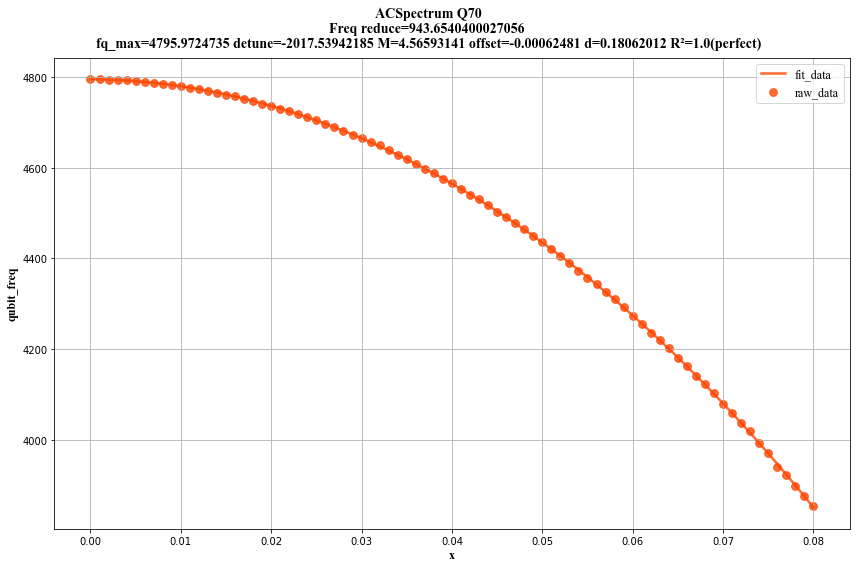

In [21]:
T1S_exp.analysis.drawer.figure

## T2Spectrum

In [ ]:
T2S_exp = T2Spectrum.from_experiment_context(context)
T2S_exp.set_experiment_options(
    pattern_flag=False,
    delays = qarange(0, 2000, 20),
    fringe = -4,
    ac_spectrum_paras = qubit.ac_spectrum.standard,

#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)
T2S_exp.child_experiment.set_experiment_options(
    is_dynamic=1,)

T2S_exp.run()

### 查询实验结果

In [20]:
pd.DataFrame(ACS_exp.analysis.show_results())

name        value  unit extra          quality
0  fq_max  4795.972473  None    {}  R²=1.0(perfect)
1  detune -2017.539422  None    {}  R²=1.0(perfect)
2       M     4.565931  None    {}  R²=1.0(perfect)
3  offset    -0.000625  None    {}  R²=1.0(perfect)
4       d     0.180620  None    {}  R²=1.0(perfect)

In [117]:
qubit.ac_spectrum.standard

[4795.9724735, -2017.53942185, 4.56593141, -0.00062481, 0.18062012]

### 查询实验结果图

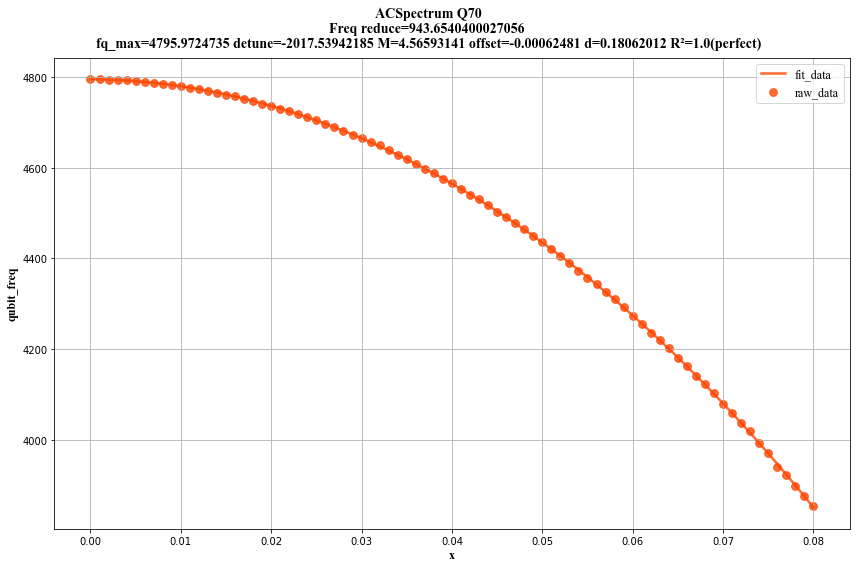

In [21]:
ACS_exp.analysis.drawer.figure

## XYZtiming

2023-01-26 20:05:22 |   EXP    | XYZTiming register success, id 63d26c819c839aaa7674b12f
2023-01-26 20:05:22 |   EXP    | Result path (local): F:\wangpeng\data\20230125\221018-72bit_300pin_V8.2-Base-1#\XYZTiming\q7\2023-01-26\20.04.38\


<IPython.core.display.Javascript object>


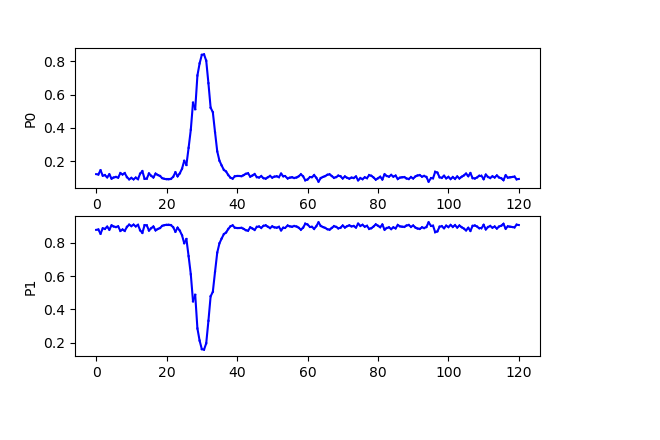

  0%|          | 0/193 [00:00<?, ?it/s]

2023-01-26 20:05:46 |  RESULT  | Experiment results as follow:
|  name  |    describe     | value | unit |      quality       | 
----------------------------------------------------------------
|   fr   |      Delay      | 30.0  |  ns  | R²=0.9758(perfect) | 
| offset | hardware_offset | None  |  ns  | R²=0.9758(perfect) | 
2023-01-26 20:05:46 |   INFO   | Qubit(bit=7) XYZTiming, delay offset: 60.0
2023-01-26 20:05:46 |   INFO   | The XY line comes before the Z line，so add XY line delay 60.0


60.0

In [168]:
xyz_exp = XYZTiming.from_experiment_context(context)
xyz_exp.set_multiple_baseband_freq(*BASEBAND, READOUT_CH)

xyz_exp.set_experiment_options(
    ac_prepare_time=8000,
    delay_list = qarange(0, 120, 0.625),
    z_amp = 0.1,
    const_delay = 90,
    z_flux_time = 5,

#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)

xyz_exp.run()






### 查询脉冲时序图

In [ ]:
xyz_exp.jupyter_schedule()

### 查询实验结果

In [171]:
pd.DataFrame(xyz_exp.analysis.show_results())

name  value unit                                         extra  \
0            Delay   30.0   ns                  {'path': None, 'name': 'q7'}   
1  hardware_offset   60.0   ns  {'path': 'Compensate.x_delay', 'name': 'q7'}   

              quality  
0  R²=0.9758(perfect)  
1  R²=0.9758(perfect)

### 查询实验结果图

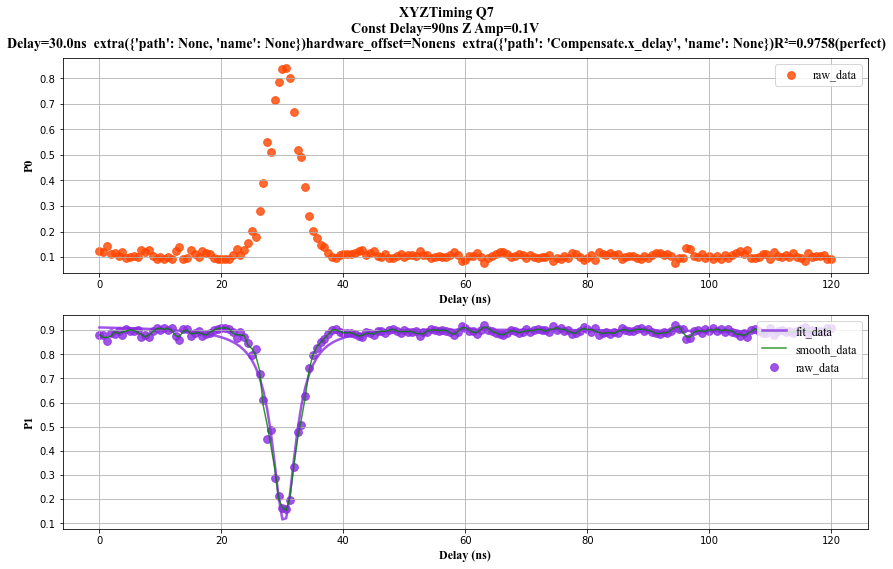

In [169]:
xyz_exp.analysis.drawer.figure

In [172]:
xyz_exp.analysis.results.fr.value

30.0

### 更新比特参数

In [173]:
from pyQCat.invoker import DataCenter

xyz_exp_quality = xyz_exp.analysis.quality.descriptor
Delay = 60
if xyz_exp_quality in [Quality.perfect, Quality.normal]:
    db = DataCenter()
    filename = 'character.json'
    data = db.query_config(filename)['data'][0]['json']
#     data[q_name]['hardware_offset'][1] = Delay  # z_delay
    data[q_name]['hardware_offset'][0] = Delay  # x_delay
    db.update_single_config(filename, data)
else:
    pyqlog.info(f'Experiment results bad, please check!')

## DistortionT1

In [ ]:
Distortion_exp = DistortionT1Composite.from_experiment_context(context)
Distortion_exp.set_experiment_options(
    iteration_times = 1,
    xy_delay_max = 500,
    init_step = 1.25,
    z_amp = -0.1,
    z_offset_list = qarange(-0.01, 0.015, 0.0002)

#     simulator_data_path='../scripts/simulator/data/ACSpectrum/'
)

Distortion_exp.run()




